#GPU Availability

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


#Import necessary packages

In [3]:
#Include necessary packages
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
from keras.callbacks import EarlyStopping

In [4]:
# Set random seed values for reproducibility
seed_value = 123
# Set the seed for Python's random number generator
random.seed(seed_value)

# Set the seed for NumPy
np.random.seed(seed_value)

# Set the seed for TensorFlow
tf.random.set_seed(seed_value)

In [6]:
# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 50

#Binary classification

In [25]:
# loading datset into training and validation variable
train_dir = '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/train'
valid_dir = '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/validation'
test_dir = '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/test'

In [26]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    seed=seed_value
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 1767 images belonging to 2 classes.
Found 588 images belonging to 2 classes.


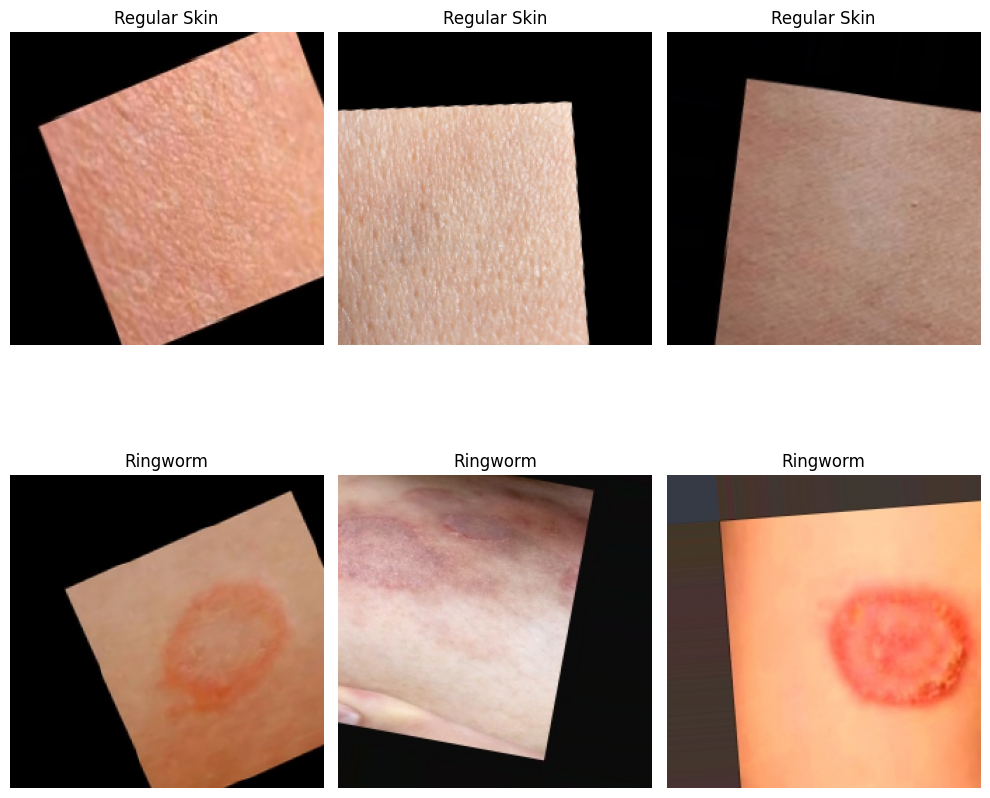

In [7]:
# Get class names
class_names = list(train_generator.class_indices.keys())

# Get a batch of images and labels from the generator
images, labels = next(train_generator)

augmented_images = np.array([train_datagen.random_transform(image) for image in images])

# Plot a few samples of each category
num_samples = 3
num_categories = len(class_names)

plt.figure(figsize=(10, 10))

for i in range(num_categories):
    category_indices = labels[:, i] == 1
    category_samples = images[category_indices][:num_samples]

    for j in range(num_samples):
        plt.subplot(num_categories, num_samples, i * num_samples + j + 1)
        plt.imshow(category_samples[j])
        plt.title(class_names[i])
        plt.axis("off")

plt.tight_layout()
plt.show()

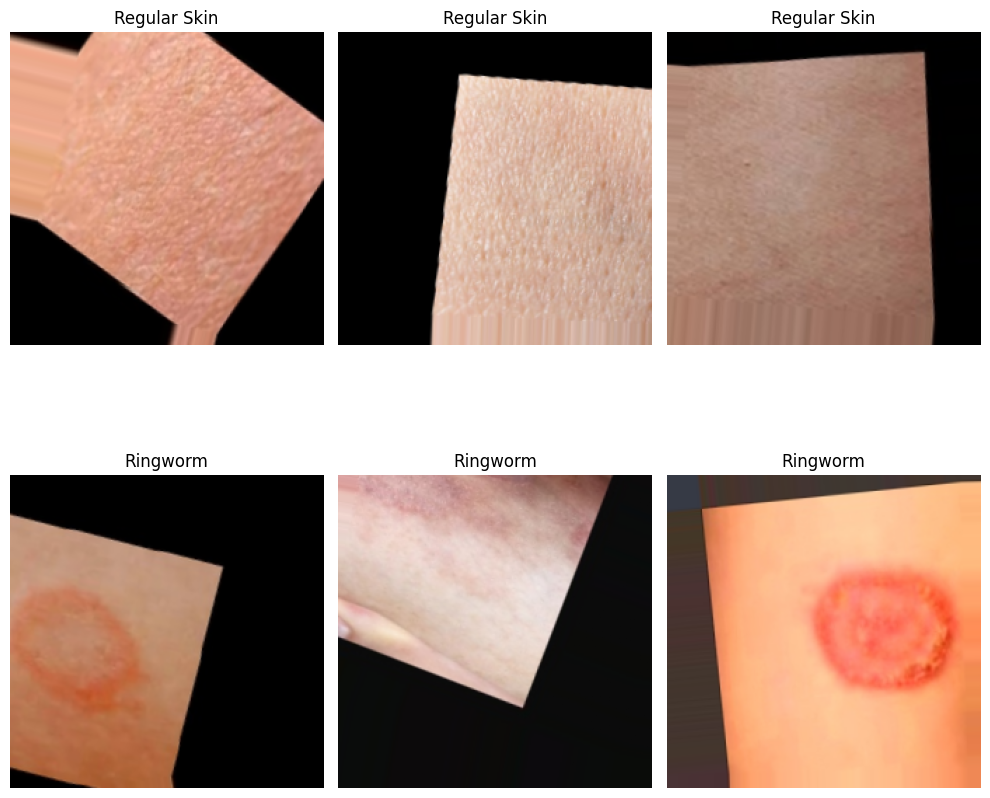

In [8]:

plt.figure(figsize=(10, 10))

for i in range(num_categories):
    category_indices = labels[:, i] == 1
    category_augmented_samples = augmented_images[category_indices][:num_samples]

    for j in range(num_samples):
        plt.subplot(num_categories, num_samples, i * num_samples + j + 1)
        plt.imshow(category_augmented_samples[j])
        plt.title(class_names[i])
        plt.axis("off")

plt.tight_layout()
plt.show()


#Using VGG19

In [9]:
# Load pre-trained VGG19 model
base_model = VGG19(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Ensure that steps_per_epoch and validation_steps are correctly calculated
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = valid_generator.samples // BATCH_SIZE

# Optionally, repeat the dataset if it runs out of data
#train_generator = train_generator.repeat()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("ringworm_vgg19.keras")

I0000 00:00:1730168199.545244     578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730168199.545317     578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730168199.545344     578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730168201.499268     578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730168201.499327     578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-29

Epoch 1/50


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730168209.587965    1143 service.cc:146] XLA service 0x7ff90c00f920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730168209.588025    1143 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-10-29 07:46:49.629918: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-29 07:46:49.847099: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-1

 1/55 ━━━━━━━━━━━━━━━━━━━━ 19:09 21s/step - accuracy: 0.2500 - loss: 1.6043

I0000 00:00:1730168225.511090    1143 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 ━━━━━━━━━━━━━━━━━━━━ 59s 705ms/step - accuracy: 0.8325 - loss: 2.9399 - val_accuracy: 0.9132 - val_loss: 0.2159
Epoch 2/50
 1/55 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9688 - loss: 0.1303

2024-10-29 07:47:43.899496: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-29 07:47:43.899615: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:47:43.899639: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-10-29 07:47:46.380540: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate

55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9688 - loss: 0.1303 - val_accuracy: 0.9167 - val_loss: 0.1280
Epoch 3/50


2024-10-29 07:47:51.079193: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-29 07:47:51.079296: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.9157 - loss: 0.2103 - val_accuracy: 0.9549 - val_loss: 0.1326
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1513 - val_accuracy: 0.9167 - val_loss: 0.1021
Epoch 5/50


2024-10-29 07:48:13.055946: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:48:13.056049: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723
2024-10-29 07:48:13.127685: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 342ms/step - accuracy: 0.9417 - loss: 0.1513 - val_accuracy: 0.9601 - val_loss: 0.1191
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1223 - val_accuracy: 1.0000 - val_loss: 0.0463
Epoch 7/50


2024-10-29 07:48:34.723097: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:48:34.723156: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723
2024-10-29 07:48:34.788052: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:48:34.788111: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step - accuracy: 0.9495 - loss: 0.1271 - val_accuracy: 0.9531 - val_loss: 0.1124
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2819 - val_accuracy: 1.0000 - val_loss: 0.0228
Epoch 9/50


2024-10-29 07:48:57.517850: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-29 07:48:57.517946: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step - accuracy: 0.9364 - loss: 0.1471 - val_accuracy: 0.9792 - val_loss: 0.0990
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1879 - val_accuracy: 1.0000 - val_loss: 0.1578
Epoch 11/50


2024-10-29 07:49:19.253454: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:49:19.316555: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:49:19.316628: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.9599 - loss: 0.1220 - val_accuracy: 0.9722 - val_loss: 0.0691
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0874 - val_accuracy: 0.9167 - val_loss: 0.1315
Epoch 13/50


2024-10-29 07:49:42.286399: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:49:42.286484: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.9608 - loss: 0.1074 - val_accuracy: 0.9896 - val_loss: 0.0587
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 15/50


2024-10-29 07:50:04.254352: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:50:04.254448: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - accuracy: 0.9484 - loss: 0.1210 - val_accuracy: 0.9566 - val_loss: 0.0922
Epoch 16/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0376
Epoch 17/50


2024-10-29 07:50:25.939042: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9584 - loss: 0.0981 - val_accuracy: 0.9740 - val_loss: 0.0667
Epoch 18/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1332 - val_accuracy: 1.0000 - val_loss: 0.0434
Epoch 19/50


2024-10-29 07:50:47.160326: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:50:47.160406: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723
2024-10-29 07:50:47.222630: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:50:47.222713: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step - accuracy: 0.9676 - loss: 0.1088 - val_accuracy: 0.9705 - val_loss: 0.0530
Epoch 20/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 21/50


2024-10-29 07:51:08.601011: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:51:08.601098: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723
2024-10-29 07:51:08.662030: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:51:08.662095: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 343ms/step - accuracy: 0.9553 - loss: 0.1584 - val_accuracy: 0.9670 - val_loss: 0.0574
Epoch 22/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1075 - val_accuracy: 0.8333 - val_loss: 0.3391
Epoch 23/50


2024-10-29 07:51:30.413676: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:51:30.474773: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:51:30.474841: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 344ms/step - accuracy: 0.9632 - loss: 0.0963 - val_accuracy: 0.9653 - val_loss: 0.0654
Epoch 24/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0568
Epoch 25/50


2024-10-29 07:51:51.985922: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:51:51.986051: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 405ms/step - accuracy: 0.9678 - loss: 0.0811 - val_accuracy: 0.9670 - val_loss: 0.0547
Epoch 26/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0873 - val_accuracy: 0.9167 - val_loss: 0.1218
Epoch 27/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - accuracy: 0.9711 - loss: 0.0796 - val_accuracy: 0.9653 - val_loss: 0.0648
Epoch 28/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0793 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 29/50


2024-10-29 07:52:43.594545: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:52:43.594600: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 391ms/step - accuracy: 0.9701 - loss: 0.0766 - val_accuracy: 0.9740 - val_loss: 0.0439
Epoch 30/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0401 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 31/50


2024-10-29 07:53:08.393752: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:53:08.393811: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 419ms/step - accuracy: 0.9704 - loss: 0.1061 - val_accuracy: 0.9722 - val_loss: 0.0533
Epoch 32/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0321 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 33/50


2024-10-29 07:53:34.638346: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:53:34.701967: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-29 07:53:34.702029: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:53:34.702059: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - accuracy: 0.9744 - loss: 0.0756 - val_accuracy: 0.9722 - val_loss: 0.0513
Epoch 34/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 35/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 623ms/step - accuracy: 0.9808 - loss: 0.0608 - val_accuracy: 0.9896 - val_loss: 0.0311
Epoch 36/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0414 - val_accuracy: 1.0000 - val_loss: 0.0764
Epoch 37/50


2024-10-29 07:54:40.355022: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:54:40.355123: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.9658 - loss: 0.0685 - val_accuracy: 0.9722 - val_loss: 0.0465
Epoch 38/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1169 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 39/50


2024-10-29 07:55:04.427397: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:55:04.427463: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 365ms/step - accuracy: 0.9717 - loss: 0.0710 - val_accuracy: 0.9913 - val_loss: 0.0346
Epoch 40/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0320
Epoch 41/50


2024-10-29 07:55:27.513707: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:55:27.513869: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.9680 - loss: 0.0749 - val_accuracy: 0.9878 - val_loss: 0.0483
Epoch 42/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0348 - val_accuracy: 0.9167 - val_loss: 0.1833
Epoch 43/50


2024-10-29 07:55:50.909626: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:55:50.909685: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.9702 - loss: 0.0827 - val_accuracy: 0.9931 - val_loss: 0.0284
Epoch 44/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0540 - val_accuracy: 0.9167 - val_loss: 0.0950
Epoch 45/50


2024-10-29 07:56:13.157092: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:56:13.157142: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723
2024-10-29 07:56:13.219148: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:56:13.219206: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.9722 - loss: 0.0684 - val_accuracy: 0.9931 - val_loss: 0.0461
Epoch 46/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 47/50


2024-10-29 07:56:37.145021: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:56:37.145112: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9713 - loss: 0.0798 - val_accuracy: 0.9861 - val_loss: 0.0548
Epoch 48/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1292 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 49/50


2024-10-29 07:57:02.085826: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105


55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.9657 - loss: 0.0786 - val_accuracy: 0.9896 - val_loss: 0.0429
Epoch 50/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0094


2024-10-29 07:57:24.823868: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:57:24.823934: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723
2024-10-29 07:57:24.885471: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7270006117923808105
2024-10-29 07:57:24.885533: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 18196691166979454723


Found 591 images belonging to 2 classes.
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step

2024-10-29 08:03:16.638039: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 762ms/step


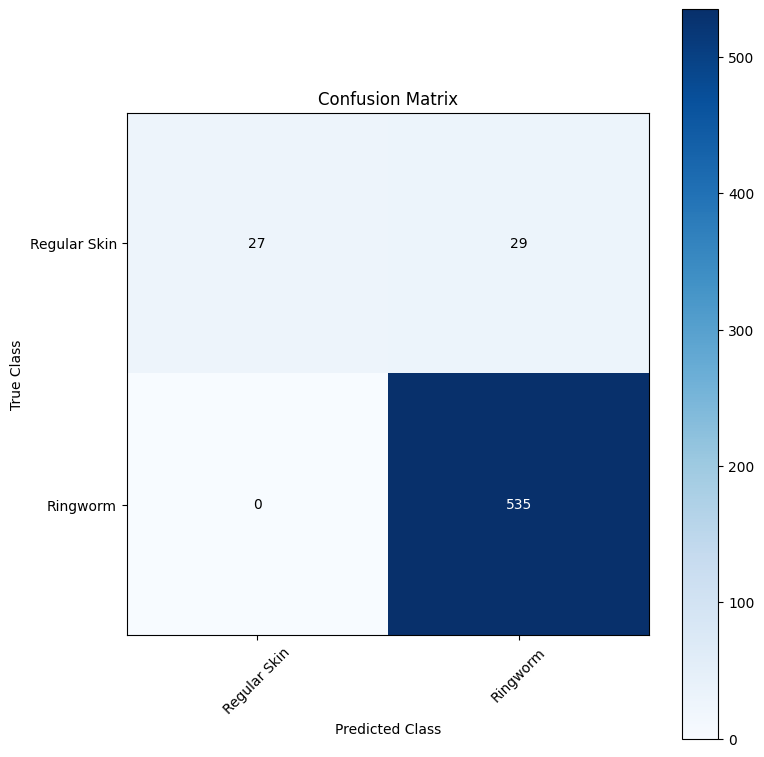

Classification Report:
              precision    recall  f1-score   support

Regular Skin       1.00      0.48      0.65        56
    Ringworm       0.95      1.00      0.97       535

    accuracy                           0.95       591
   macro avg       0.97      0.74      0.81       591
weighted avg       0.95      0.95      0.94       591



In [10]:
# Load the model
model = tf.keras.models.load_model("ringworm_vgg19.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["Regular Skin", "Ringworm"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using EfficientNetB0

In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))  # For binary classification use NUM_CLASSES=2

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("efficientnetb0_binary.keras")


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 466ms/step - accuracy: 0.8389 - loss: 5.4313 - val_accuracy: 0.9080 - val_loss: 0.3228
Epoch 2/50
 1/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9062 - loss: 0.3479

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9062 - loss: 0.3479 - val_accuracy: 0.9167 - val_loss: 0.2946
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.8915 - loss: 0.4021 - val_accuracy: 0.9080 - val_loss: 0.3074
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1412 - val_accuracy: 0.9167 - val_loss: 0.2868
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - accuracy: 0.9129 - loss: 0.3337 - val_accuracy: 0.9080 - val_loss: 0.3077
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.7500 - loss: 0.6911 - val_accuracy: 0.9167 - val_loss: 0.3009
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.9061 - loss: 0.3756 - val_accuracy: 0.9080 - val_loss: 0.3144
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9062 - loss: 0.3421 - val_accuracy: 0.9167 - val_loss: 0.3061
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9050 - loss: 0.3742 - val_accuracy: 0.9080 - val

2024-10-13 19:44:09.027219: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.9075 - loss: 0.3462 - val_accuracy: 0.9062 - val_loss: 0.3303
Epoch 16/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9062 - loss: 0.3385 - val_accuracy: 1.0000 - val_loss: 0.1783
Epoch 17/50


2024-10-13 19:44:30.335870: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3350322268172326042


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 350ms/step - accuracy: 0.9127 - loss: 0.3439 - val_accuracy: 0.9115 - val_loss: 0.3056
Epoch 18/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9375 - loss: 0.2791 - val_accuracy: 0.7500 - val_loss: 0.6282
Epoch 19/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8977 - loss: 0.3603 - val_accuracy: 0.9080 - val_loss: 0.3922
Epoch 20/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9062 - loss: 0.4074 - val_accuracy: 0.9167 - val_loss: 0.3900
Epoch 21/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.9030 - loss: 0.3747 - val_accuracy: 0.9115 - val_loss: 0.3135
Epoch 22/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8750 - loss: 0.3660 - val_accuracy: 0.7500 - val_loss: 0.5969
Epoch 23/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.9064 - loss: 0.3508 - val_accuracy: 0.9062 - val_loss: 0.3132
Epoch 24/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9375 - loss: 0.3052 - val_accuracy: 1.00

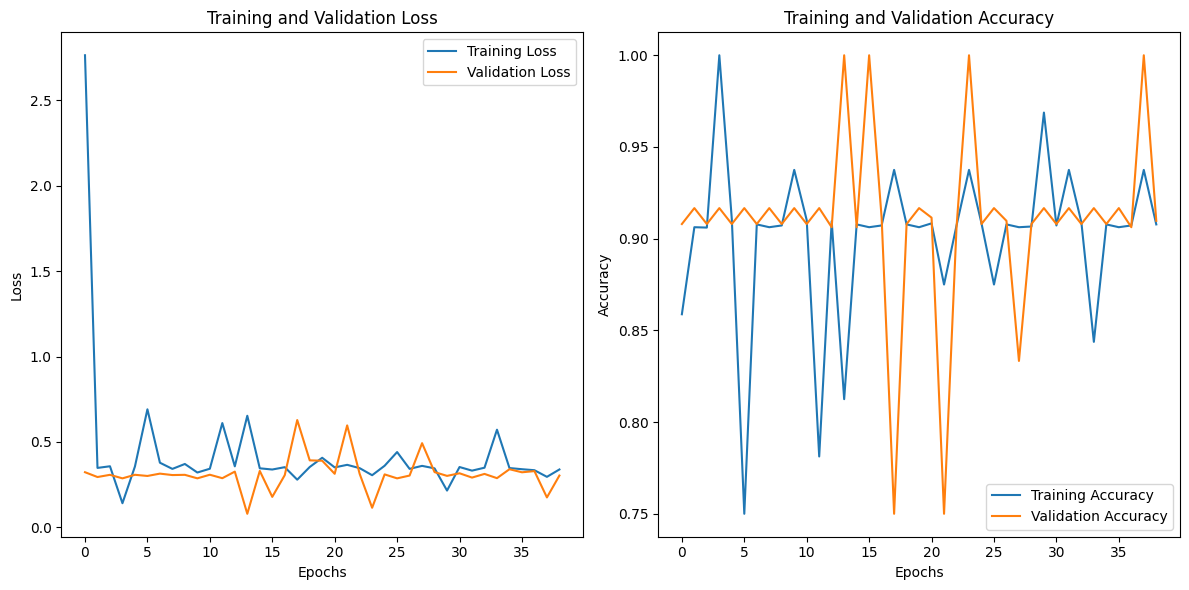

In [12]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 591 images belonging to 2 classes.


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 613ms/step


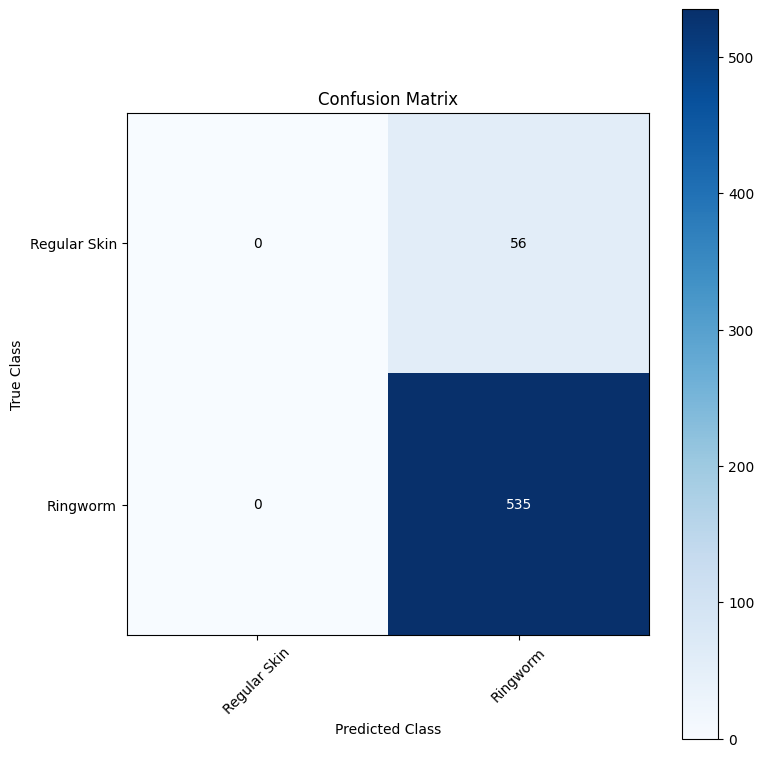

Classification Report:
              precision    recall  f1-score   support

Regular Skin       0.00      0.00      0.00        56
    Ringworm       0.91      1.00      0.95       535

    accuracy                           0.91       591
   macro avg       0.45      0.50      0.48       591
weighted avg       0.82      0.91      0.86       591



/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Load the model
model = tf.keras.models.load_model("efficientnetb0_binary.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["Regular Skin", "Ringworm"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using ResNet50

In [9]:
EPOCHS = 30
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))  # Use NUM_CLASSES_MOD for multi-class classification

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("resnet50_binary.keras")


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 410ms/step - accuracy: 0.8134 - loss: 5.6766 - val_accuracy: 0.9097 - val_loss: 0.3403
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9062 - loss: 0.2791 - val_accuracy: 0.8333 - val_loss: 0.5452
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.8974 - loss: 0.4146 - val_accuracy: 0.9080 - val_loss: 0.2908
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2683 - val_accuracy: 0.9167 - val_loss: 0.2720
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.9223 - loss: 0.3128 - val_accuracy: 0.9097 - val_loss: 0.3146
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8750 - loss: 0.3048 - val_accuracy: 0.8333 - val_loss: 0.4379
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9085 - loss: 0.3397 - val_accuracy: 0.9080 - val_loss: 0.3922
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9062 - loss: 0.5657 - val_accuracy: 0

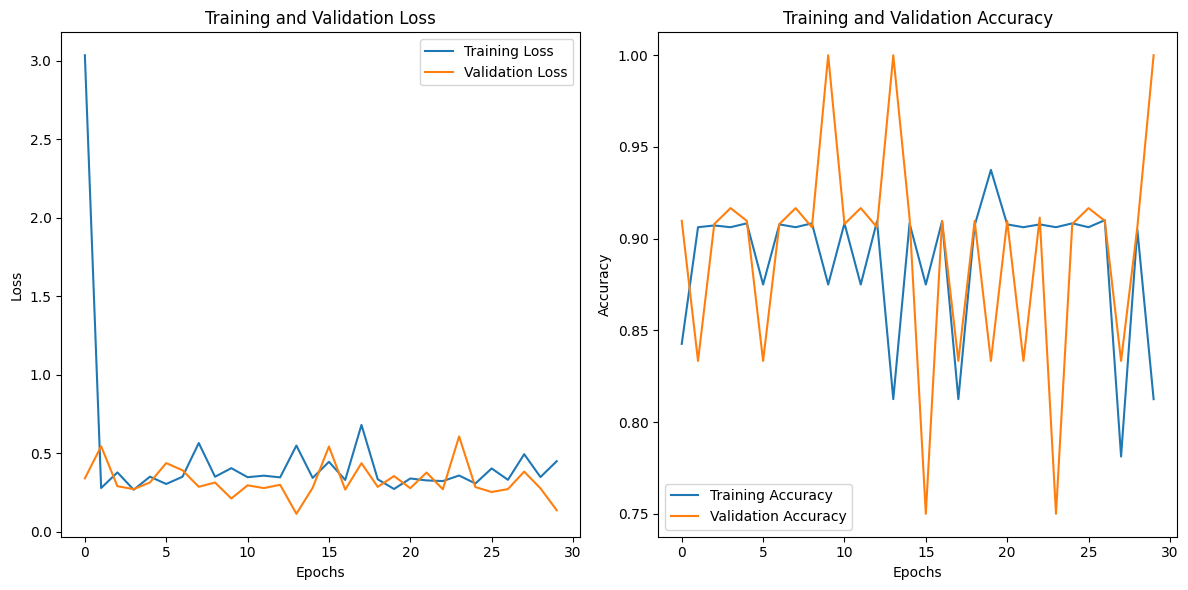

In [10]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 591 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step


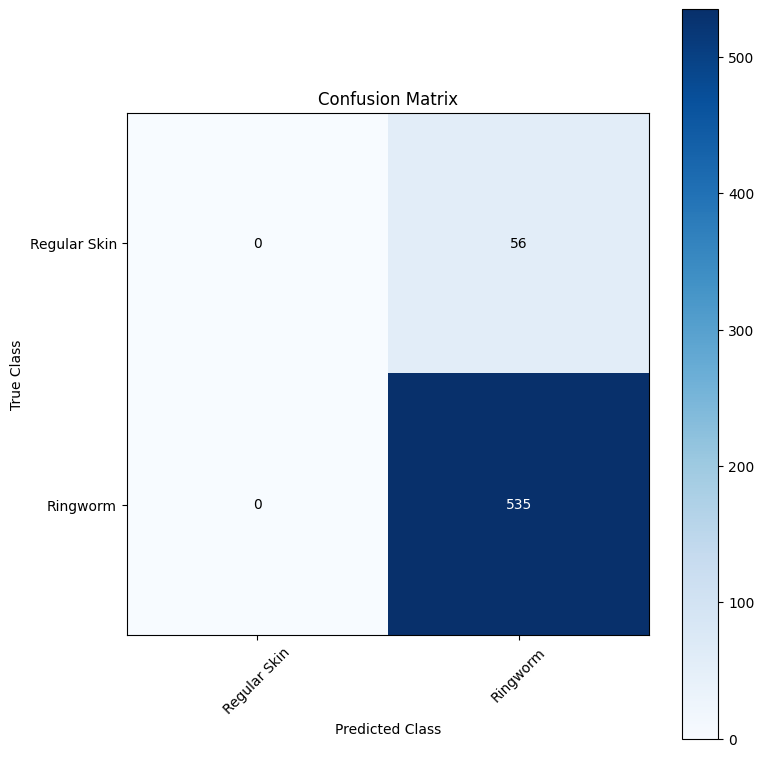

Classification Report:
              precision    recall  f1-score   support

Regular Skin       0.00      0.00      0.00        56
    Ringworm       0.91      1.00      0.95       535

    accuracy                           0.91       591
   macro avg       0.45      0.50      0.48       591
weighted avg       0.82      0.91      0.86       591



/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Load the model
model = tf.keras.models.load_model("resnet50_binary.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["Regular Skin", "Ringworm"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using Custom CNN

In [17]:
EPOCHS_NEW = 30
# Build the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS_NEW,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("ringworm_sequential.keras")

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - accuracy: 0.8452 - loss: 0.4308 - val_accuracy: 0.9080 - val_loss: 0.2238
Epoch 2/30
 1/55 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9375 - loss: 0.1282

2024-10-11 20:01:54.425294: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:01:54.425362: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.1282 - val_accuracy: 0.9167 - val_loss: 0.2458
Epoch 3/30


2024-10-11 20:01:54.697651: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:01:54.697729: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.9137 - loss: 0.1779 - val_accuracy: 0.9080 - val_loss: 0.2151
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8438 - loss: 0.1823 - val_accuracy: 0.9167 - val_loss: 0.1466
Epoch 5/30


2024-10-11 20:02:09.096908: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:02:09.096985: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.9083 - loss: 0.1557 - val_accuracy: 0.9097 - val_loss: 0.3320
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.8438 - loss: 0.2435 - val_accuracy: 0.8333 - val_loss: 0.2954
Epoch 7/30


2024-10-11 20:02:23.516042: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:02:23.516101: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.9097 - loss: 0.1395 - val_accuracy: 0.9080 - val_loss: 0.2097
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.8438 - loss: 0.3527 - val_accuracy: 0.9167 - val_loss: 0.1103
Epoch 9/30


2024-10-11 20:02:38.003513: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-11 20:02:38.003621: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:02:38.003657: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.9374 - loss: 0.1333 - val_accuracy: 0.8420 - val_loss: 0.2204
Epoch 10/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 1.0000 - loss: 0.1832 - val_accuracy: 0.8333 - val_loss: 0.1593
Epoch 11/30


2024-10-11 20:02:52.415419: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:02:52.415482: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630
2024-10-11 20:02:52.426373: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:02:52.426471: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.8587 - loss: 0.3139 - val_accuracy: 0.9080 - val_loss: 0.2219
Epoch 12/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9688 - loss: 0.0927 - val_accuracy: 0.9167 - val_loss: 0.1923
Epoch 13/30


2024-10-11 20:03:06.739275: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:03:06.739334: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9022 - loss: 0.1698 - val_accuracy: 0.9080 - val_loss: 0.1830
Epoch 14/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9062 - loss: 0.1141 - val_accuracy: 0.9167 - val_loss: 0.1531
Epoch 15/30


2024-10-11 20:03:20.956777: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:03:20.956951: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.9084 - loss: 0.2001 - val_accuracy: 0.9253 - val_loss: 0.1459
Epoch 16/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9062 - loss: 0.0752 - val_accuracy: 1.0000 - val_loss: 0.0551
Epoch 17/30


2024-10-11 20:03:35.285012: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:03:35.285099: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.9470 - loss: 0.1025 - val_accuracy: 0.9062 - val_loss: 3.0162
Epoch 18/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9062 - loss: 0.4968 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 19/30


2024-10-11 20:03:49.780783: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:03:49.780856: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9606 - loss: 0.1051 - val_accuracy: 0.9549 - val_loss: 0.0970
Epoch 20/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9688 - loss: 0.0934 - val_accuracy: 0.9167 - val_loss: 0.2146
Epoch 21/30


2024-10-11 20:04:04.750808: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:04:04.750899: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.9398 - loss: 0.1363 - val_accuracy: 0.9045 - val_loss: 0.1439
Epoch 22/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.9688 - loss: 0.1345 - val_accuracy: 0.8333 - val_loss: 0.2422
Epoch 23/30


2024-10-11 20:04:19.214824: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:04:19.214883: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.9628 - loss: 0.0994 - val_accuracy: 0.9601 - val_loss: 0.1056
Epoch 24/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9688 - loss: 0.0797 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 25/30


2024-10-11 20:04:33.584133: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:04:33.584211: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9693 - loss: 0.0786 - val_accuracy: 0.9878 - val_loss: 0.0417
Epoch 26/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 1.0000 - loss: 0.0454 - val_accuracy: 0.9167 - val_loss: 0.1350
Epoch 27/30


2024-10-11 20:04:48.216201: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:04:48.216264: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630
2024-10-11 20:04:48.226846: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:04:48.226912: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.9657 - loss: 0.0845 - val_accuracy: 0.9774 - val_loss: 0.0552
Epoch 28/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 1.0000 - loss: 0.0411 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 29/30


2024-10-11 20:05:03.304095: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:05:03.304168: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630
2024-10-11 20:05:03.316794: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.9830 - loss: 0.0488 - val_accuracy: 0.9809 - val_loss: 0.0457
Epoch 30/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9688 - loss: 0.0789 - val_accuracy: 1.0000 - val_loss: 0.0045


2024-10-11 20:05:17.665566: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14586125735214933641
2024-10-11 20:05:17.665655: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6056882562391089630


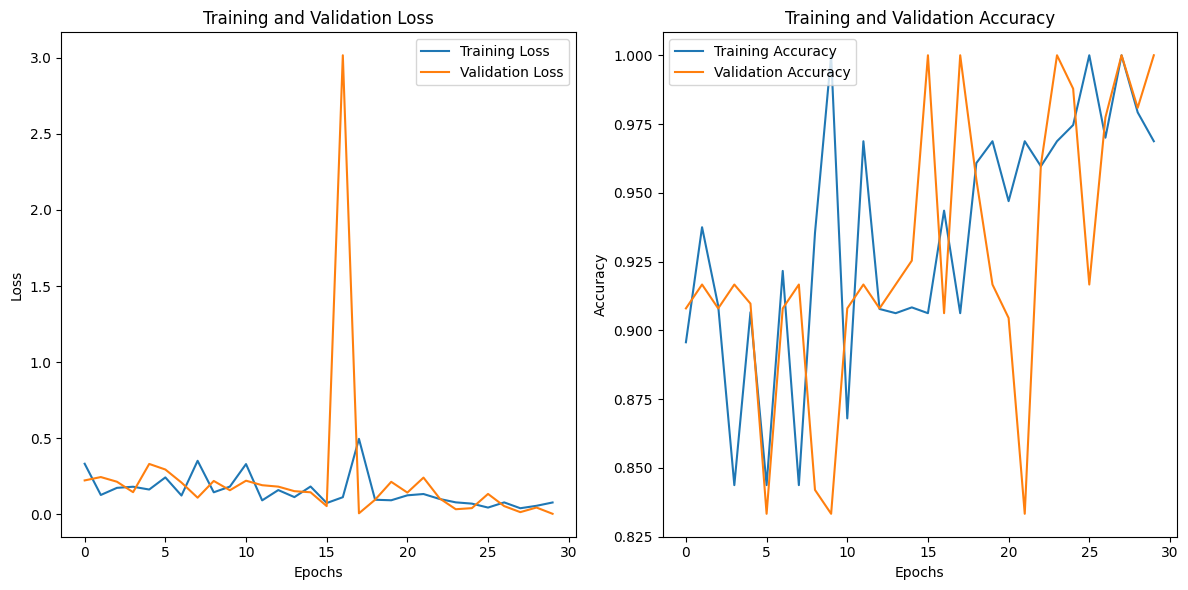

In [18]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 591 images belonging to 2 classes.


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step


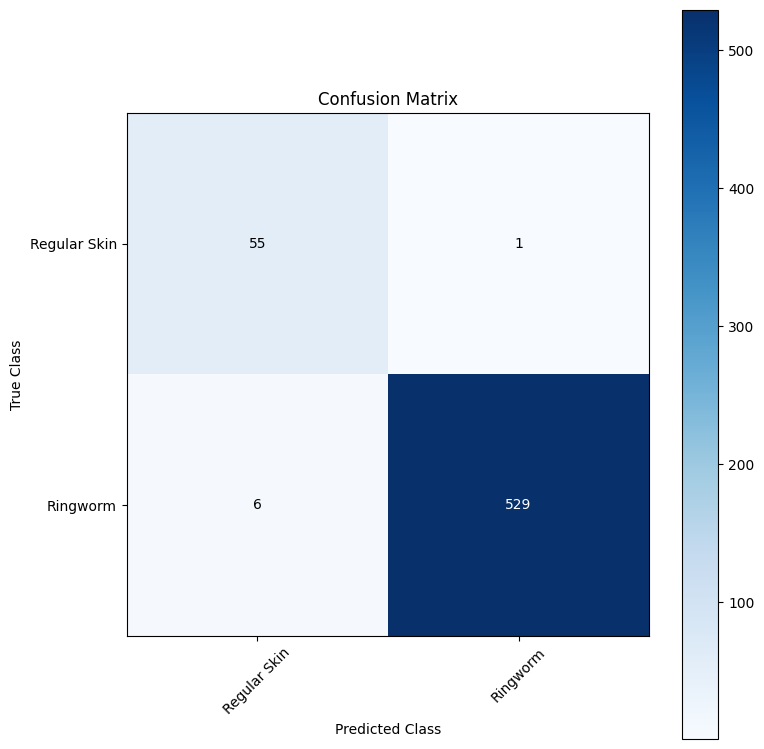

Classification Report:
              precision    recall  f1-score   support

Regular Skin       0.90      0.98      0.94        56
    Ringworm       1.00      0.99      0.99       535

    accuracy                           0.99       591
   macro avg       0.95      0.99      0.97       591
weighted avg       0.99      0.99      0.99       591



In [19]:
# Load the model
model = tf.keras.models.load_model("ringworm_sequential.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["Regular Skin", "Ringworm"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using InceptionV3

In [13]:
EPOCHS=20
from tensorflow.keras.applications import InceptionV3

# Load pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))  # For binary classification use NUM_CLASSES=2

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("inceptionv3_binary.keras")


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.8438 - loss: 14.4522 - val_accuracy: 0.9896 - val_loss: 0.1625
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 4.2391e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.9830 - loss: 0.2273 - val_accuracy: 0.9965 - val_loss: 0.0244
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 1.0000 - loss: 2.5341e-04 - val_accuracy: 1.0000 - val_loss: 1.7990e-04
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 0.9958 - loss: 0.0114 - val_accuracy: 0.9878 - val_loss: 0.0697
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 1.0000 - loss: 3.9323e-05 - val_accuracy: 0.9167 - val_loss: 0.0708
Epoch 7/20


2024-10-13 21:29:51.588161: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16865653061947715503


55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.9961 - loss: 0.0148 - val_accuracy: 0.9931 - val_loss: 0.0513
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 1.0000 - loss: 9.7315e-04 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.9930 - loss: 0.0303 - val_accuracy: 0.9931 - val_loss: 0.0237
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 1.0000 - loss: 1.0719e-04 - val_accuracy: 1.0000 - val_loss: 2.2636e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9983 - val_loss: 0.0078
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.9792 - val_loss: 0.0723
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9375 - loss: 0.1240 - val_ac

2024-10-13 21:31:38.046112: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16865653061947715503
2024-10-13 21:31:38.046222: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12186287585663622434


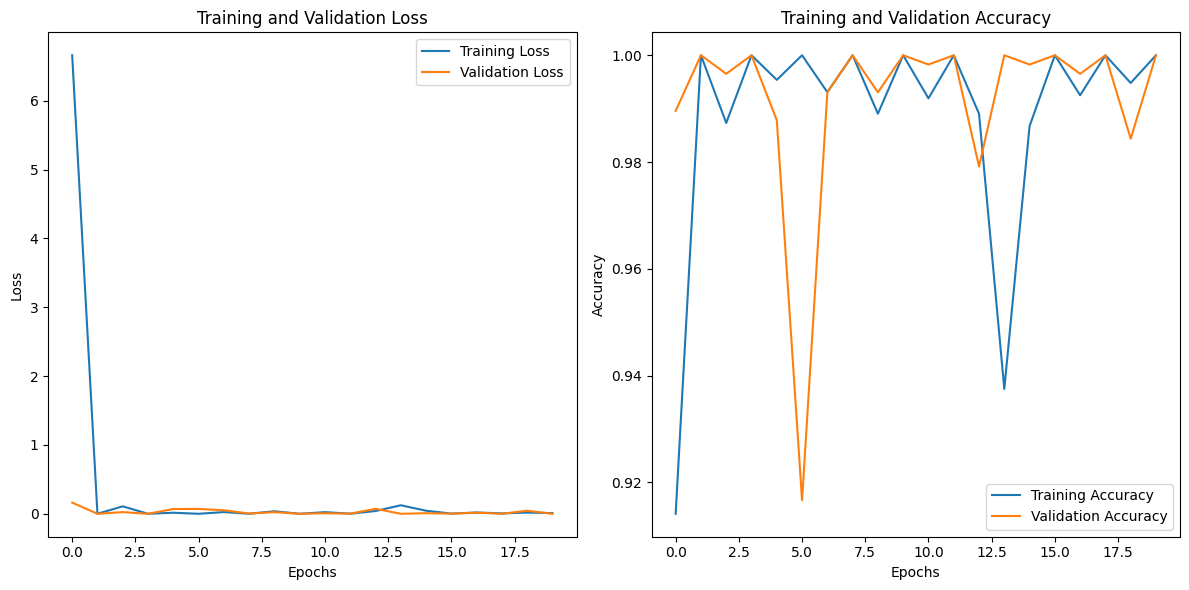

In [14]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 591 images belonging to 2 classes.


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

2024-10-13 21:33:49.340526: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 781.80MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step


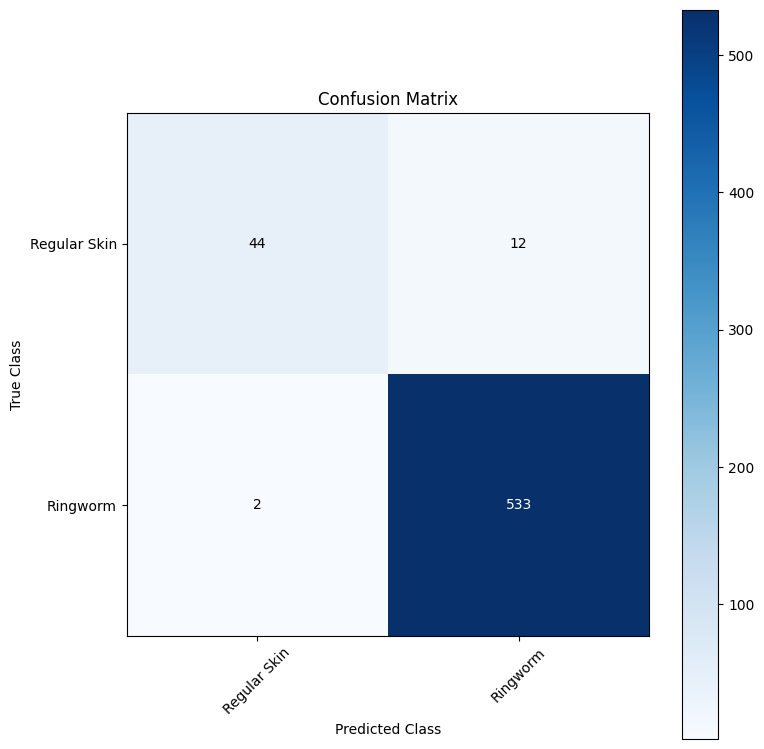

Classification Report:
              precision    recall  f1-score   support

Regular Skin       0.96      0.79      0.86        56
    Ringworm       0.98      1.00      0.99       535

    accuracy                           0.98       591
   macro avg       0.97      0.89      0.92       591
weighted avg       0.98      0.98      0.98       591



In [15]:
# Load the model
model = tf.keras.models.load_model("inceptionv3_binary.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["Regular Skin", "Ringworm"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using DenseNet121

In [18]:
EPOCHS = 20
from tensorflow.keras.applications import DenseNet121

# Load pre-trained DenseNet121 model
base_model = DenseNet121(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))  # Use NUM_CLASSES_MOD for multi-class classification

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("densenet121_binary.keras")


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 408ms/step - accuracy: 0.9281 - loss: 3.6109 - val_accuracy: 0.9861 - val_loss: 0.0889
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9688 - loss: 0.4552 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9863 - loss: 0.1195 - val_accuracy: 0.9705 - val_loss: 0.1241
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9688 - loss: 0.0522 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.9895 - loss: 0.0499 - val_accuracy: 1.0000 - val_loss: 9.0168e-05
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.3735e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9965 - val_loss: 0.0152
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.9688 - loss: 0.

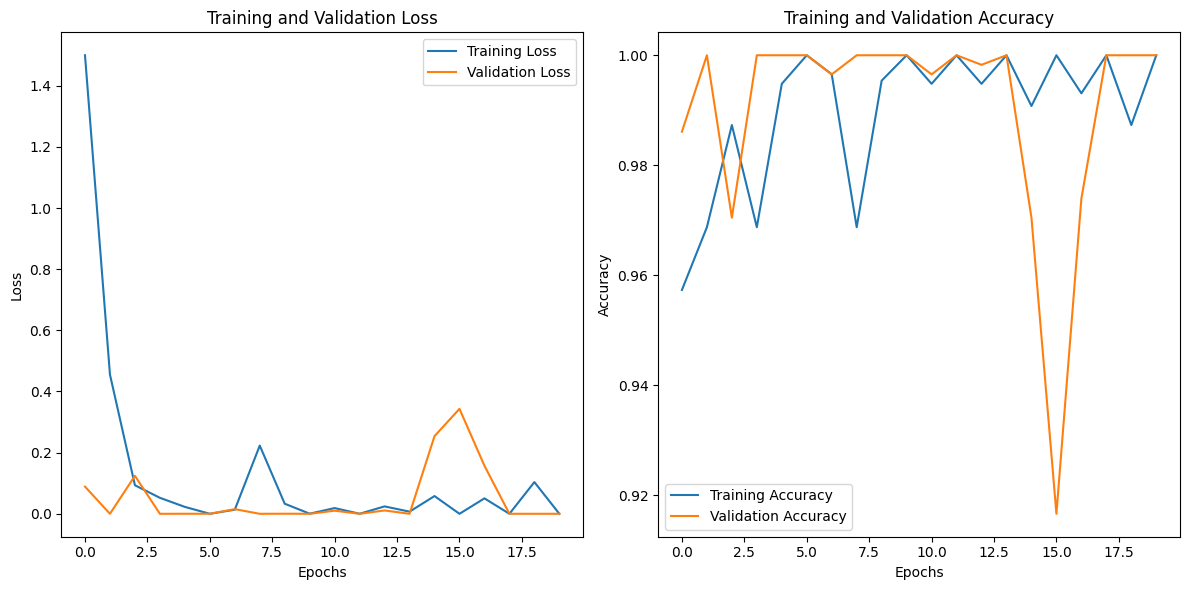

In [19]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

I0000 00:00:1728836879.918846   24887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728836879.918925   24887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728836879.918947   24887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728836880.176278   24887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728836880.176361   24887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-13

Found 591 images belonging to 2 classes.


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728836887.573394   25309 service.cc:146] XLA service 0x7f1640087ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728836887.574143   25309 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-10-13 21:58:07.695379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-13 21:58:08.416709: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 3/19 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step 

I0000 00:00:1728836901.566103   25309 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 763ms/step


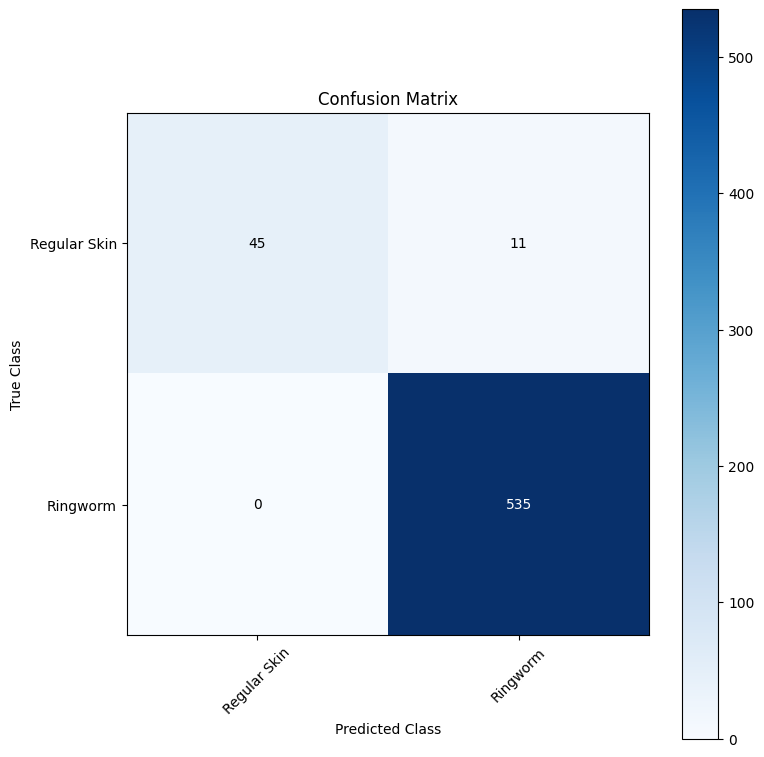

Classification Report:
              precision    recall  f1-score   support

Regular Skin       1.00      0.80      0.89        56
    Ringworm       0.98      1.00      0.99       535

    accuracy                           0.98       591
   macro avg       0.99      0.90      0.94       591
weighted avg       0.98      0.98      0.98       591



In [7]:
# Load the model
model = tf.keras.models.load_model("densenet121_binary.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["Regular Skin", "Ringworm"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using Custom Vision Transformer

In [14]:
EPOCHS_VIT=50
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define constants
IMAGE_SIZE = (224, 224)
PATCH_SIZE = 16
NUM_PATCHES = (IMAGE_SIZE[0] // PATCH_SIZE) ** 2
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_LAYERS = 8
MLP_UNITS = [2048, 1024]
NUM_CLASSES = 10  # Example for 10 classes (modify as needed)
DROPOUT_RATE = 0.1
BATCH_SIZE = 32
seed_value = 42

# Define the data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.Rescaling(1./255),  # Normalization
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation"
)

# Helper function to apply data augmentation to each batch
def augment_data(images, labels):
    return data_augmentation(images), labels

# Load the train, validation, and test datasets with augmentation applied in map function
train_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/train', 
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, seed=seed_value
).map(augment_data)

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/validation', 
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, seed=seed_value
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/test', 
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, seed=seed_value
)

# Define the Patch Encoder layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

# Create the Vision Transformer (ViT) model
def create_vit_classifier():
    inputs = layers.Input(shape=(*IMAGE_SIZE, 3))
    
    # Create patches from the images
    patches = layers.Conv2D(PROJECTION_DIM, PATCH_SIZE, PATCH_SIZE, padding="valid")(inputs)
    patches = layers.Reshape((NUM_PATCHES, PROJECTION_DIM))(patches)
    
    # Encode the patches
    encoded_patches = PatchEncoder(NUM_PATCHES, PROJECTION_DIM)(patches)
    
    # Create Transformer blocks
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization and multi-head attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=DROPOUT_RATE
        )(x1, x1)
        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization and feed-forward network (MLP)
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(PROJECTION_DIM * 2, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(DROPOUT_RATE)(x3)
        x3 = layers.Dense(PROJECTION_DIM, activation=tf.nn.gelu)(x3)
        
        # Skip connection
        encoded_patches = layers.Add()([x3, x2])
    
    # Create a classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(DROPOUT_RATE)(representation)
    
    # MLP Head
    features = layers.Dense(MLP_UNITS[0], activation=tf.nn.gelu)(representation)
    features = layers.Dropout(DROPOUT_RATE)(features)
    features = layers.Dense(MLP_UNITS[1], activation=tf.nn.gelu)(features)
    
    # Output layer
    logits = layers.Dense(NUM_CLASSES)(features)
    
    # Create the Keras model
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# Compile and train the model
vit_model = create_vit_classifier()
vit_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
history = vit_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=EPOCHS_VIT
)

# Save the model
vit_model.save('vit_model_SOTA_ringworm.keras')

# Evaluate the model on the test set
test_loss, test_acc = vit_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.4f}')


Found 1767 files belonging to 2 classes.
Found 588 files belonging to 2 classes.
Found 591 files belonging to 2 classes.
Epoch 1/50


2024-10-29 08:12:29.101330: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_319', 12 bytes spill stores, 12 bytes spill loads

2024-10-29 08:12:29.740770: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_350', 24 bytes spill stores, 24 bytes spill loads

2024-10-29 08:12:30.577959: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 8 bytes spill stores, 8 bytes spill loads

2024-10-29 08:12:31.312159: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_335', 60 bytes spill stores, 60 bytes spill loads

2024-10-29 08:12:31.504747: I external/local_xla/xla/stream_execut

55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8267 - loss: 0.7008

2024-10-29 08:12:57.855054: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_319', 12 bytes spill stores, 12 bytes spill loads

2024-10-29 08:12:59.596645: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_369', 128 bytes spill stores, 128 bytes spill loads

2024-10-29 08:13:00.451277: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_335', 60 bytes spill stores, 60 bytes spill loads



56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.8277 - loss: 0.6960

2024-10-29 08:13:15.663347: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_74', 20 bytes spill stores, 20 bytes spill loads

2024-10-29 08:13:15.762753: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_74', 132 bytes spill stores, 160 bytes spill loads

2024-10-29 08:13:18.742575: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 12 bytes spill stores, 12 bytes spill loads

2024-10-29 08:13:19.574147: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_73', 24 bytes spill stores, 24 bytes spill loads



56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 653ms/step - accuracy: 0.8286 - loss: 0.6915 - val_accuracy: 0.8878 - val_loss: 1.0844
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.9008 - loss: 0.3417 - val_accuracy: 0.6939 - val_loss: 1.2898
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.9072 - loss: 0.2952 - val_accuracy: 0.8690 - val_loss: 0.9360
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.8860 - loss: 0.2880 - val_accuracy: 0.8265 - val_loss: 0.6890
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9350 - loss: 0.1629 - val_accuracy: 0.4660 - val_loss: 1.5192
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9405 - loss: 0.1909 - val_accuracy: 0.9082 - val_loss: 0.5482
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.9506 - loss: 0.1623 - val_accuracy: 0.9082 - val_loss: 0.4103
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.9082 - val

2024-10-29 08:32:33.087202: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 12 bytes spill stores, 12 bytes spill loads



19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.8944 - loss: 1.6330
Test Accuracy: 0.9052


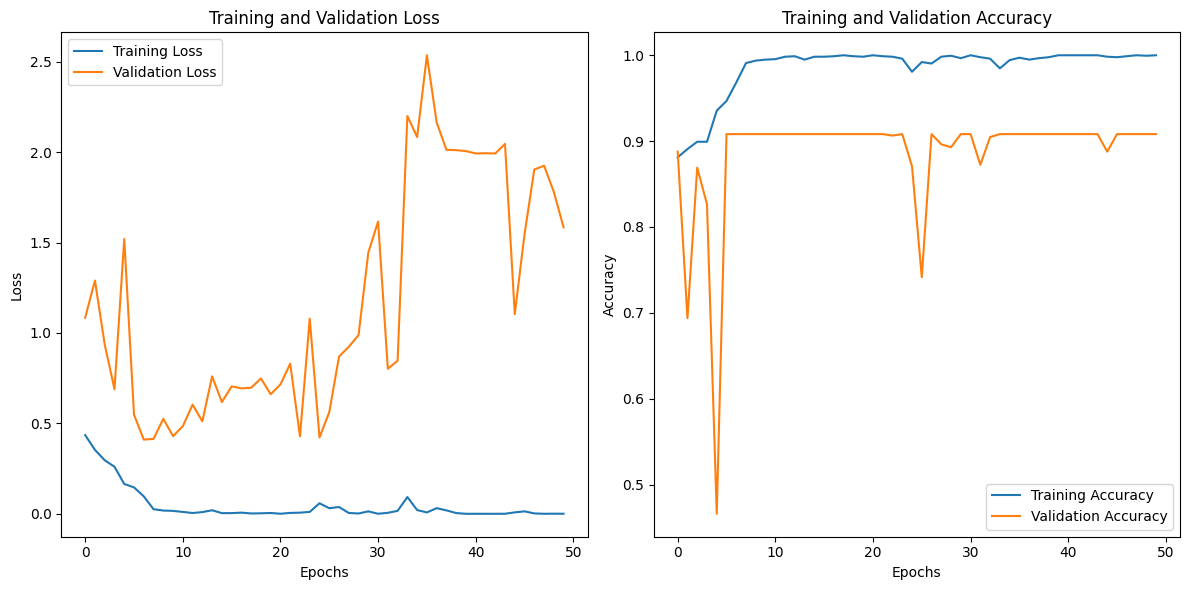

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

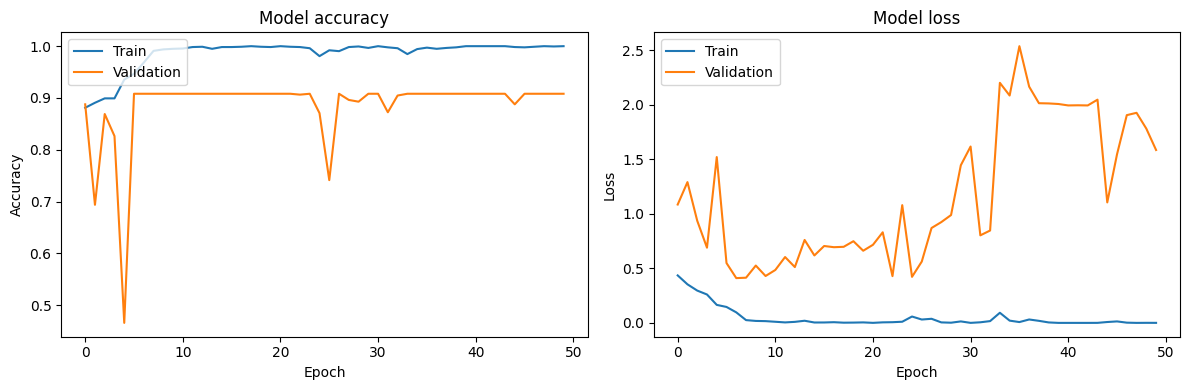

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8911 - loss: 1.4820
Test Accuracy: 0.9052
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


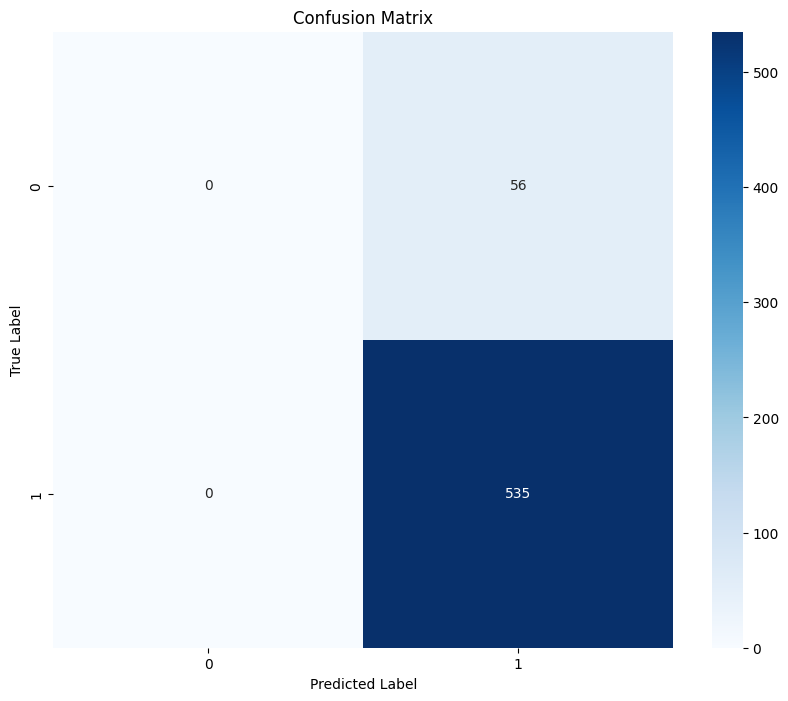

Classification Report:
              precision    recall  f1-score   support

Regular Skin       0.00      0.00      0.00        56
    Ringworm       0.91      1.00      0.95       535

    accuracy                           0.91       591
   macro avg       0.45      0.50      0.48       591
weighted avg       0.82      0.91      0.86       591



/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
import seaborn as sns
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = vit_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.4f}')

# Generate predictions for the test set
y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = vit_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Generate and print classification report
class_names = test_dataset.class_names
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

In [8]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import os

# List of your model files with more descriptive model names
model_files = {
    'VGG19': 'ringworm_vgg19.keras',
    'EfficientNetB0': 'efficientnetb0_binary.keras',
    'InceptionV3': 'inceptionv3_binary.keras',
    'ResNet50': 'resnet50_binary.keras',
    'DenseNet121': 'densenet121_binary.keras',
    'Custom CNN': 'ringworm_sequential.keras'
    
}

# Use the test generator to evaluate models on the test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Ensuring that the order of test data is consistent
)

# Function to evaluate model metrics using the test generator
def evaluate_model_metrics(model_path, test_generator):
    try:
        # Check if the model file exists
        if not os.path.exists(model_path):
            print(f"Model file '{model_path}' not found. Skipping this model.")
            return None, None, None, None

        # Load the model
        model = tf.keras.models.load_model(model_path)

        # Make predictions on the test data
        predictions = model.predict(test_generator)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = test_generator.classes

        # Generate classification report
        report = classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys()), output_dict=True)
        
        # Extract relevant metrics
        accuracy = report['accuracy']
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        
        return accuracy, precision, recall, f1_score
    except Exception as e:
        print(f"Error occurred while evaluating the model '{model_path}': {e}")
        return None, None, None, None

# Create a list to store the results
results = []

# Evaluate each model and store the metrics
for model_name, model_file in model_files.items():
    accuracy, precision, recall, f1_score = evaluate_model_metrics(model_file, test_generator)
    if accuracy is not None:
        results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score})

# Display the results in a structured table
results_df = pd.DataFrame(results)
print(results_df)



# Optionally save the results to a CSV file
results_df.to_csv('/mnt/c/Users/pragy/Downloads/MTAP_Rev1/model_comparison_metrics.csv', index=False)


Found 591 images belonging to 2 classes.


I0000 00:00:1728877381.298158     574 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728877381.298324     574 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728877381.298383     574 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728877383.361455     574 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728877383.361551     574 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-14

 2/19 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step

I0000 00:00:1728877402.857114    2548 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 811ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 783ms/step


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 617ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 897ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step
            Model  Accuracy  Precision    Recall  F1-Score
0           VGG19  0.961083   0.961474  0.961083  0.956967
1  EfficientNetB0  0.905245   0.819469  0.905245  0.860224
2     InceptionV3  0.976311   0.975948  0.976311  0.975260
3        ResNet50  0.905245   0.819469  0.905245  0.860224
4     DenseNet121  0.981387   0.981762  0.981387  0.980469
5      Custom CNN  0.988156   0.988972  0.988156  0.988381


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import numpy as np

# Constants (make sure these match your original training setup)
IMAGE_SIZE = (224, 224)
PATCH_SIZE = 16
NUM_PATCHES = (IMAGE_SIZE[0] // PATCH_SIZE) ** 2
PROJECTION_DIM = 64
BATCH_SIZE = 32

# Updated PatchEncoder class
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "projection_dim": self.projection_dim,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Function to load the model
def load_vit_model(model_path):
    custom_objects = {"PatchEncoder": PatchEncoder}
    return tf.keras.models.load_model(model_path, custom_objects=custom_objects)

# Load the saved ViT model
try:
    vit_model = load_vit_model('vit_model_SOTA_ringworm.keras')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")
    raise

# Load the test dataset
test_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm/test', 
    image_size=IMAGE_SIZE, 
    batch_size=BATCH_SIZE,
    seed=42  # Use the same seed as in your training script
)

# Evaluate the model on the test dataset
test_loss, test_acc = vit_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.4f}')



/home/pragya/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'patch_encoder_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model loaded successfully!
Found 591 files belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.8944 - loss: 1.6330
Test Accuracy: 0.9052


In [19]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

# Function to evaluate a model and return metrics
def evaluate_model(model, test_dataset, model_name):
    predictions = model.predict(test_dataset)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.concatenate([y for x, y in test_dataset], axis=0)
    report = classification_report(true_classes, predicted_classes, output_dict=True)
    
    return {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# List to store results for each model
results = []

# Evaluate each model
# Example (replace with your actual models and names):
models_to_evaluate = [
    (vit_model, 'Vision Transformer'),
    # Add other models here, e.g.:
    # (vgg19_model, 'VGG19'),
    # (efficientnet_model, 'EfficientNetB0'),
    # ...
]

for model, name in models_to_evaluate:
    results.append(evaluate_model(model, test_dataset, name))

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Format the numeric columns to 6 decimal places
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df_results[numeric_columns] = df_results[numeric_columns].applymap('{:.6f}'.format)

# Print the formatted table
print(df_results.to_string(index=False))

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step
             Model Accuracy Precision   Recall F1-Score
Vision Transformer 0.905245  0.819469 0.905245 0.860224


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipykernel_578/403

#23 class classification

In [4]:
import os
import glob

def count_images_in_subfolders(master_folder):
    for folder_name in os.listdir(master_folder):
        folder_path = os.path.join(master_folder, folder_name)
        if os.path.isdir(folder_path):
            image_files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))
            print(f"Folder: {folder_name}, Number of Images: {len(image_files)}")

# Set this path to your local directory where the dataset is stored
master_folder_path = '/mnt/c/Users/pragy/Downloads/Dermnet'  # Update this path accordingly

# Run the function to count images
count_images_in_subfolders(master_folder_path)


Folder: test, Number of Images: 0
Folder: train, Number of Images: 0
Folder: validation, Number of Images: 0


In [4]:
import os
import glob

def count_images_in_subfolders(master_folder):
    # Loop through 'train' and 'test' directories
    for split in ['train', 'test']:
        split_folder_path = os.path.join(master_folder, split)
        print(f"Processing {split} folder...")
        
        # Loop through each subfolder
        for folder_name in os.listdir(split_folder_path):
            folder_path = os.path.join(split_folder_path, folder_name)
            if os.path.isdir(folder_path):
                # Count both PNG and JPEG images
                png_files = glob.glob(os.path.join(folder_path, '*.png'))
                jpeg_files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.jpeg'))
                
                total_images = len(png_files) + len(jpeg_files)
                print(f"Folder: {folder_name}, Number of Images: {total_images}")

# Replace with the actual path to your master folder
master_folder_path = '/mnt/c/Users/pragy/Downloads/Dermnet'
count_images_in_subfolders(master_folder_path)


Processing train folder...
Folder: Acne and Rosacea Photos, Number of Images: 831
Folder: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions, Number of Images: 1140
Folder: Atopic Dermatitis Photos, Number of Images: 489
Folder: Bullous Disease Photos, Number of Images: 441
Folder: Cellulitis Impetigo and other Bacterial Infections, Number of Images: 287
Folder: Eczema Photos, Number of Images: 1235
Folder: Exanthems and Drug Eruptions, Number of Images: 403
Folder: Hair Loss Photos Alopecia and other Hair Diseases, Number of Images: 231
Folder: Herpes HPV and other STDs Photos, Number of Images: 404
Folder: Light Diseases and Disorders of Pigmentation, Number of Images: 566
Folder: Lupus and other Connective Tissue diseases, Number of Images: 416
Folder: Melanoma Skin Cancer Nevi and Moles, Number of Images: 463
Folder: Nail Fungus and other Nail Disease, Number of Images: 1040
Folder: Poison Ivy Photos and other Contact Dermatitis, Number of Images: 253
Folder: Psoria

In [24]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split

def split_data(source_dir, dest_dir, split_ratio=0.2):
    # Create destination directories if they do not exist
    train_dir = os.path.join(dest_dir, 'train')
    validation_dir = os.path.join(dest_dir, 'validation')
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    
    for class_name in os.listdir(source_dir):
        class_folder = os.path.join(source_dir, class_name)
        if os.path.isdir(class_folder):
            # Create class directories in destination folders
            train_class_dir = os.path.join(train_dir, class_name)
            valid_class_dir = os.path.join(validation_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(valid_class_dir, exist_ok=True)

            files = glob.glob(os.path.join(class_folder, '*'))
            train_files, valid_files = train_test_split(files, test_size=split_ratio, random_state=42)
            
            # Copy files to the train directory
            for file in train_files:
                dest_file = os.path.join(train_class_dir, os.path.basename(file))
                if not os.path.isfile(dest_file):  # Avoid copying if file already exists
                    shutil.copy(file, dest_file)
            
            # Copy files to the validation directory
            for file in valid_files:
                dest_file = os.path.join(valid_class_dir, os.path.basename(file))
                if not os.path.isfile(dest_file):  # Avoid copying if file already exists
                    shutil.copy(file, dest_file)

# Call the function
split_data('/mnt/c/Users/pragy/Downloads/Dermnet/train', '/mnt/c/Users/pragy/Downloads/Dermnet')


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42

# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    seed=seed_value
)

# Create validation data generator
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Optional: Print class indices to ensure they are consistent
print(f"Class indices: {train_generator.class_indices}")


Found 15428 images belonging to 23 classes.
Found 5422 images belonging to 23 classes.
Found 3979 images belonging to 23 classes.
Class indices: {'Acne and Rosacea Photos': 0, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1, 'Atopic Dermatitis Photos': 2, 'Bullous Disease Photos': 3, 'Cellulitis Impetigo and other Bacterial Infections': 4, 'Eczema Photos': 5, 'Exanthems and Drug Eruptions': 6, 'Hair Loss Photos Alopecia and other Hair Diseases': 7, 'Herpes HPV and other STDs Photos': 8, 'Light Diseases and Disorders of Pigmentation': 9, 'Lupus and other Connective Tissue diseases': 10, 'Melanoma Skin Cancer Nevi and Moles': 11, 'Nail Fungus and other Nail Disease': 12, 'Poison Ivy Photos and other Contact Dermatitis': 13, 'Psoriasis pictures Lichen Planus and related diseases': 14, 'Scabies Lyme Disease and other Infestations and Bites': 15, 'Seborrheic Keratoses and other Benign Tumors': 16, 'Systemic Disease': 17, 'Tinea Ringworm Candidiasis and other Fungal I

In [6]:
NUM_CLASSES_MOD=23
EPOCHS = 10

#Using VGG19

In [7]:
# Load pre-trained VGG19 model
base_model = VGG19(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Ensure that steps_per_epoch and validation_steps are correctly calculated
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = valid_generator.samples // BATCH_SIZE

# Optionally, repeat the dataset if it runs out of data
#train_generator = train_generator.repeat()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("dermnet_vgg19.keras")

2024-11-03 22:40:54.010847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-03 22:40:54.014219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-03 22:40:54.014315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-03 22:40:54.014354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your 

Epoch 1/10


2024-11-03 22:40:59.710148: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2024-11-03 22:41:03.548119: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-03 22:41:03.548222: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-03 22:41:03.636614: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.74GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains

  1/482 [..............................] - ETA: 1:05:57 - loss: 3.9184 - accuracy: 0.0625

2024-11-03 22:41:06.412409: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


482/482 [==============================] - 423s 863ms/step - loss: 3.1571 - accuracy: 0.1057 - val_loss: 2.8313 - val_accuracy: 0.1605
Epoch 2/10
482/482 [==============================] - 156s 324ms/step - loss: 2.9082 - accuracy: 0.1270 - val_loss: 2.7941 - val_accuracy: 0.1755
Epoch 3/10
482/482 [==============================] - 150s 311ms/step - loss: 2.8983 - accuracy: 0.1309 - val_loss: 2.8512 - val_accuracy: 0.1625
Epoch 4/10
482/482 [==============================] - 148s 306ms/step - loss: 2.8774 - accuracy: 0.1341 - val_loss: 2.7808 - val_accuracy: 0.1788
Epoch 5/10
482/482 [==============================] - 149s 310ms/step - loss: 2.8550 - accuracy: 0.1356 - val_loss: 2.8075 - val_accuracy: 0.1661
Epoch 6/10
482/482 [==============================] - 148s 306ms/step - loss: 2.8553 - accuracy: 0.1384 - val_loss: 2.8004 - val_accuracy: 0.1781
Epoch 7/10
482/482 [==============================] - 147s 304ms/step - loss: 2.8614 - accuracy: 0.1372 - val_loss: 2.8271 - val_accura

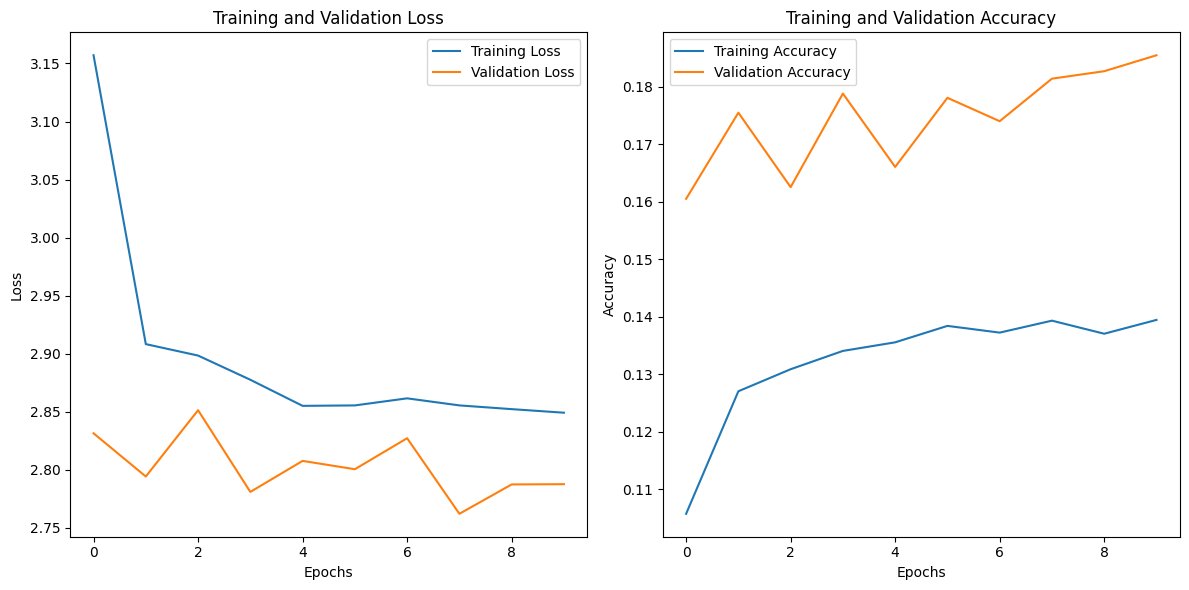

In [8]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 3979 images belonging to 23 classes.
124/125 [============================>.] - ETA: 0s

2024-11-03 23:11:25.912192: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-03 23:11:25.912244: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


125/125 [==============================] - 39s 310ms/step


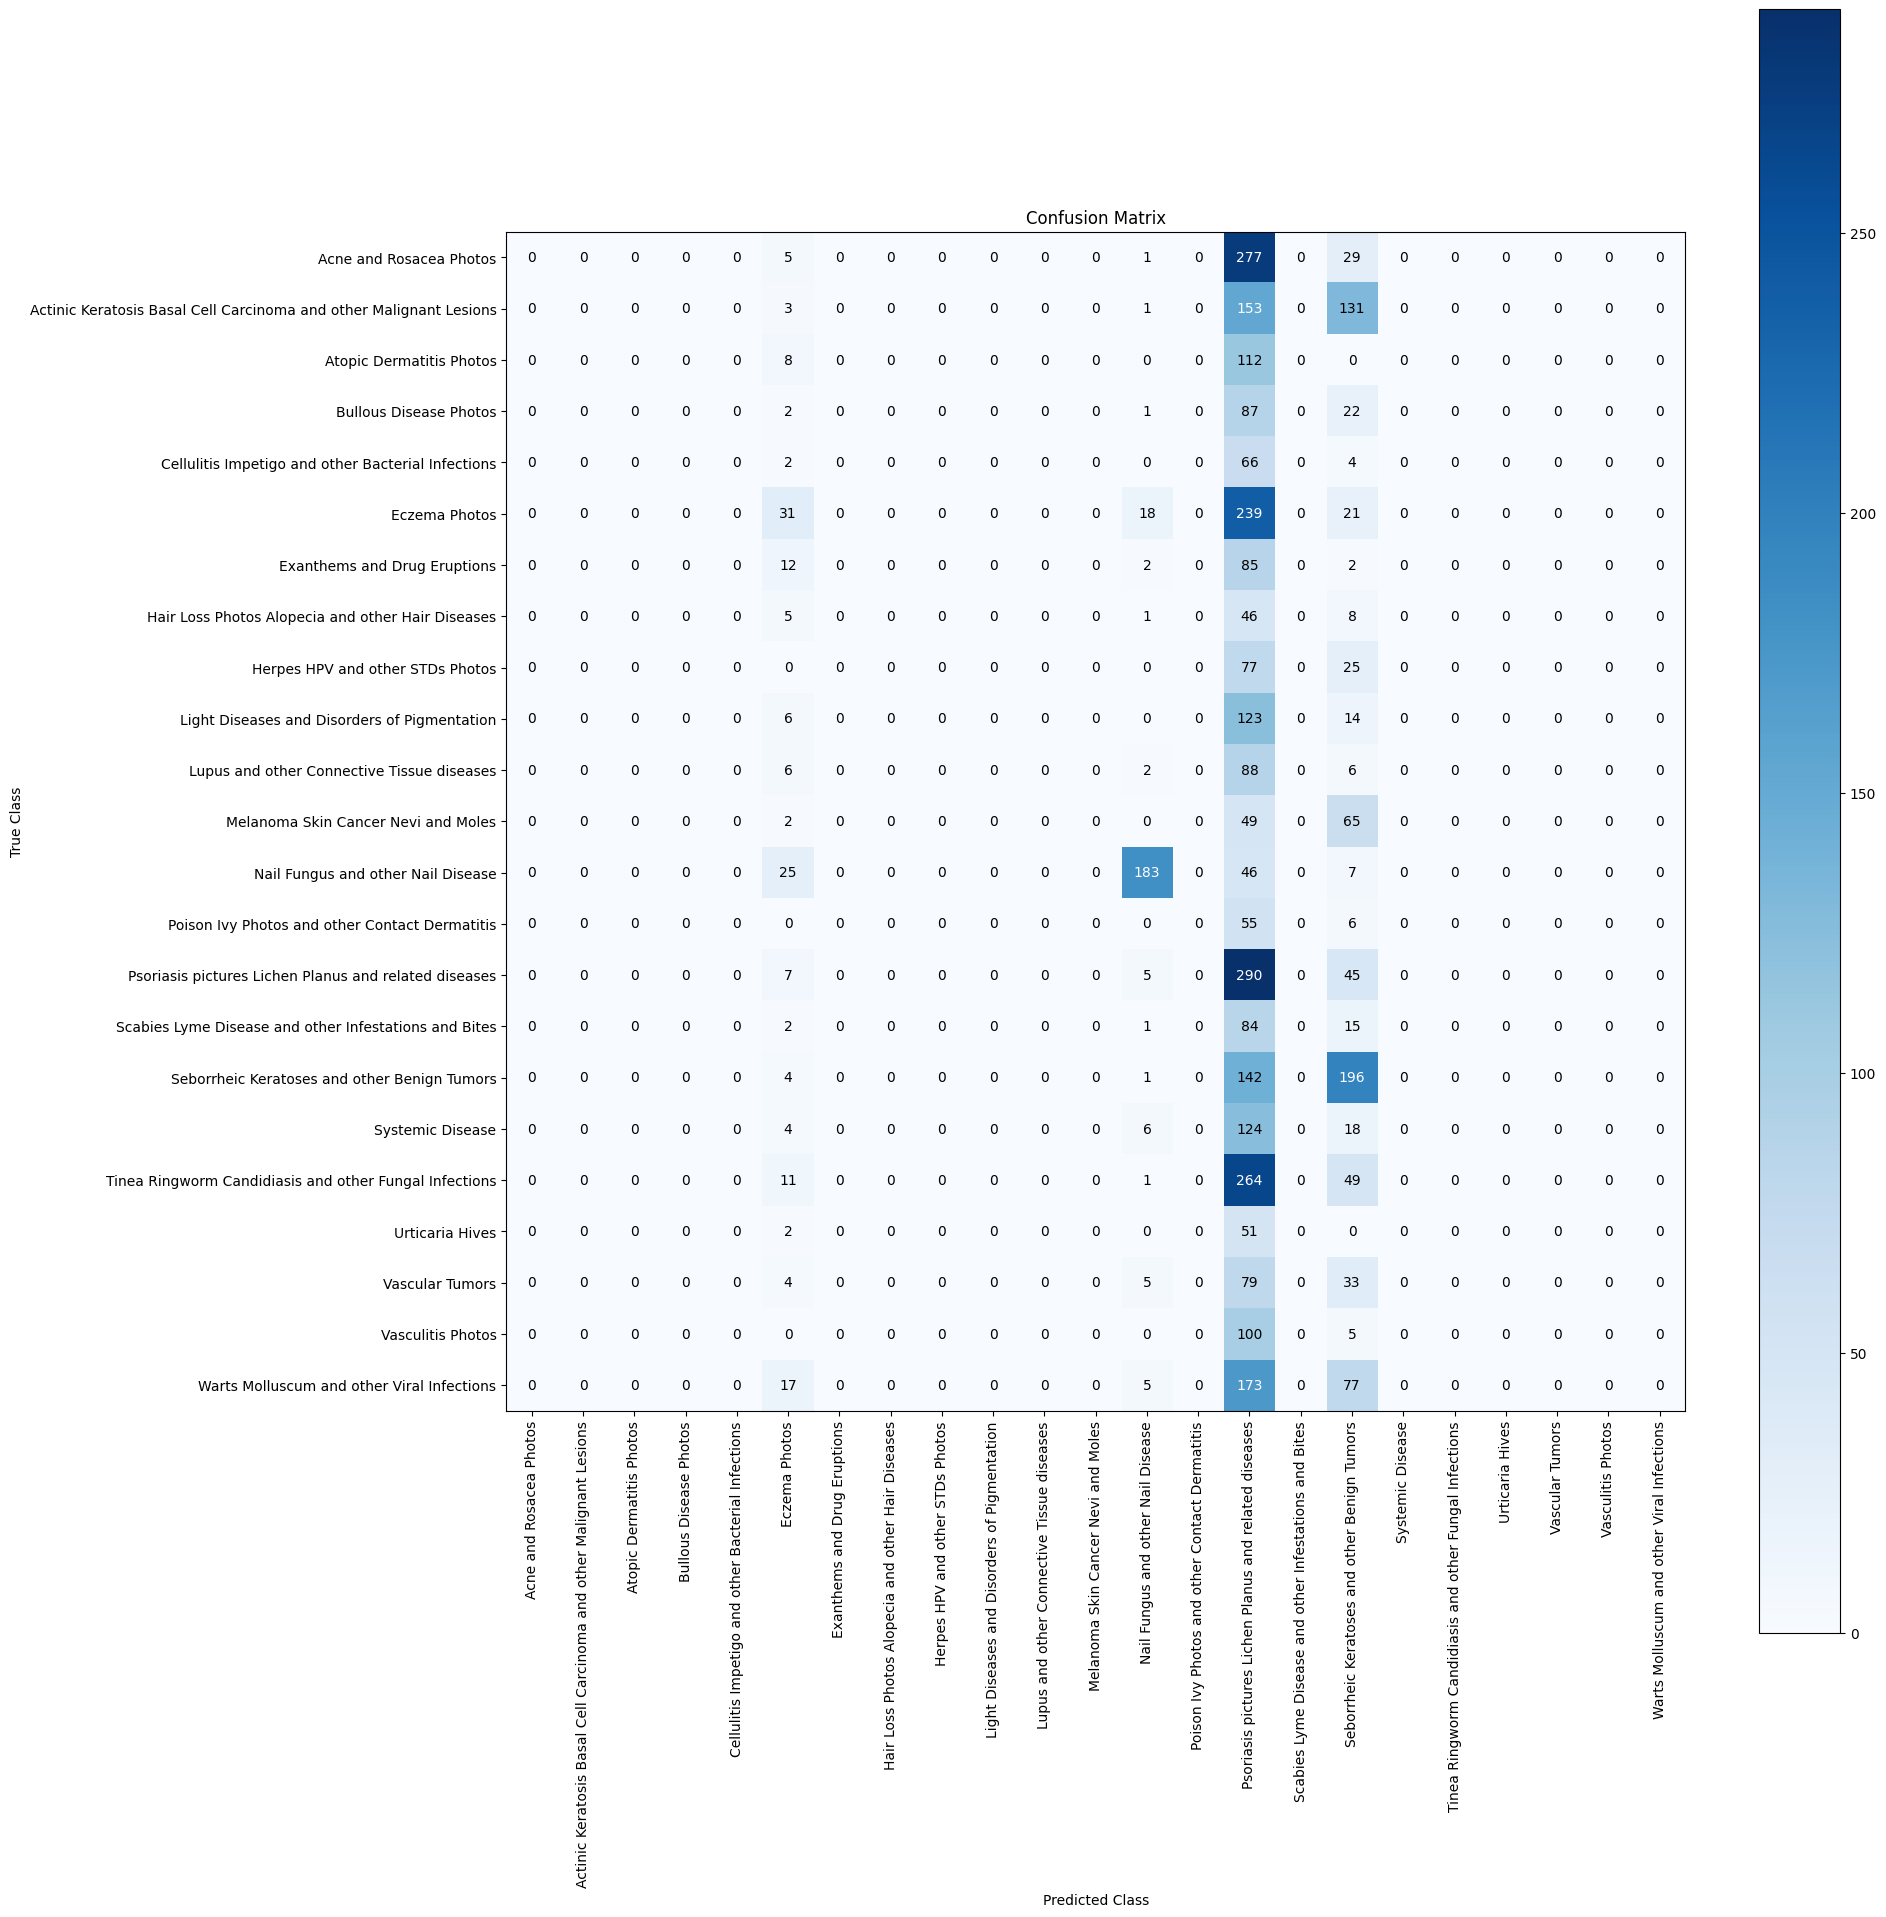

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.20      0.10      0.13       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("dermnet_vgg19.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

Found 3979 images belonging to 23 classes.


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step


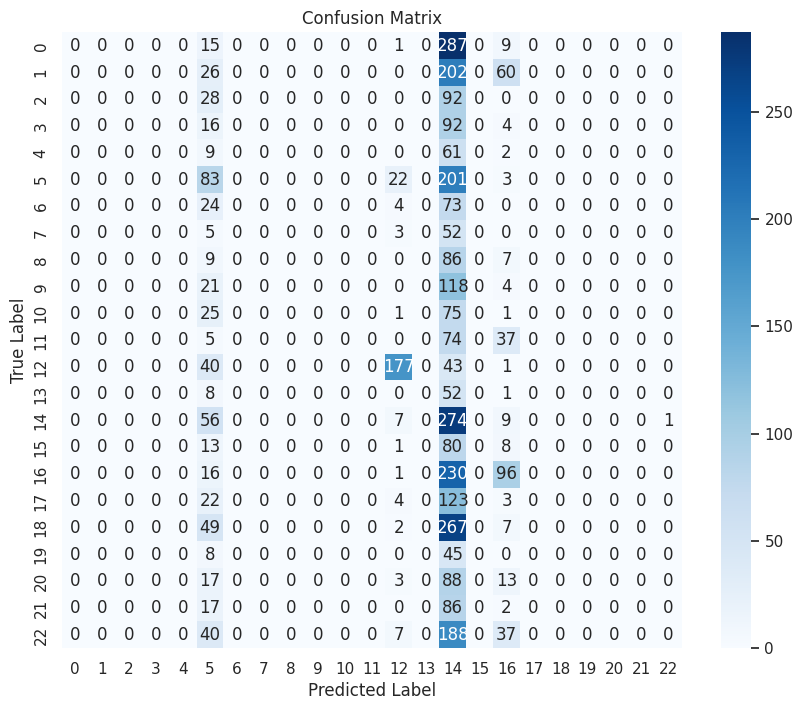

Classification Report (Indices):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.00      0.00      0.00       288
           2       0.00      0.00      0.00       120
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00        72
           5       0.15      0.27      0.19       309
           6       0.00      0.00      0.00       101
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00       143
          10       0.00      0.00      0.00       102
          11       0.00      0.00      0.00       116
          12       0.76      0.68      0.72       261
          13       0.00      0.00      0.00        61
          14       0.09      0.79      0.17       347
          15       0.00      0.00      0.00       102
          16       0.32      0.28      0.30     

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.set(font="DejaVu Sans")


# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42

# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

NUM_CLASSES = 23

# Load the model
model = tf.keras.models.load_model("dermnet_vgg19.keras")

# Create the test generator
class_labels = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
                'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections',
                'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases',
                'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation',
                'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles',
                'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis',
                'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites',
                'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease',
                'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives',
                'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=class_labels,
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report with indices
print("Classification Report (Indices):")
print(classification_report(y_true, y_pred))

# Display class mapping (indices to labels) separately
print("\nClass Mapping (Index to Label):")
for i, label in enumerate(class_labels):
    print(f"{i}: {label}")


#Using EfficientNetB0

In [23]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))  # For binary classification use NUM_CLASSES=2

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)
      

Epoch 1/10
482/482 [==============================] - 217s 443ms/step - loss: 3.6657 - accuracy: 0.0868 - val_loss: 3.0505 - val_accuracy: 0.0978
Epoch 2/10
482/482 [==============================] - 215s 447ms/step - loss: 3.0251 - accuracy: 0.0883 - val_loss: 3.0103 - val_accuracy: 0.0980
Epoch 3/10
482/482 [==============================] - 216s 449ms/step - loss: 3.0004 - accuracy: 0.0883 - val_loss: 2.9952 - val_accuracy: 0.0976
Epoch 4/10
482/482 [==============================] - 212s 440ms/step - loss: 2.9797 - accuracy: 0.0872 - val_loss: 2.9908 - val_accuracy: 0.0978
Epoch 5/10
482/482 [==============================] - 214s 443ms/step - loss: 2.9872 - accuracy: 0.0861 - val_loss: 2.9892 - val_accuracy: 0.0980
Epoch 6/10
482/482 [==============================] - 215s 447ms/step - loss: 2.9791 - accuracy: 0.0885 - val_loss: 2.9896 - val_accuracy: 0.0980
Epoch 7/10
482/482 [==============================] - 214s 443ms/step - loss: 2.9736 - accuracy: 0.0881 - val_loss: 2.9891 -

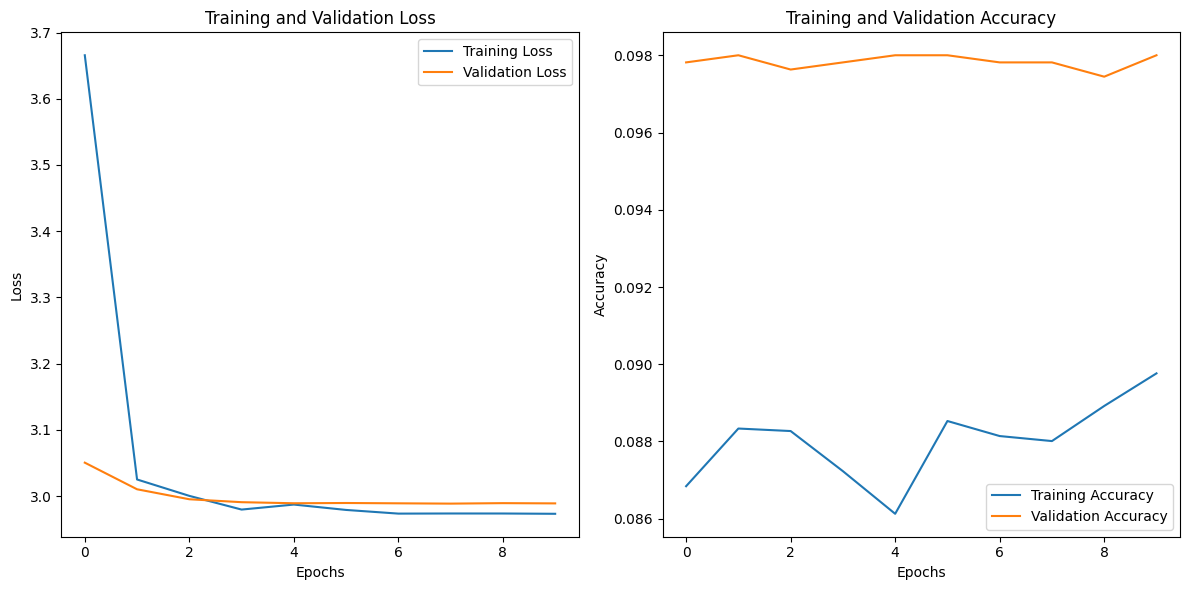

In [27]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

125/125 [==============================] - 36s 285ms/step


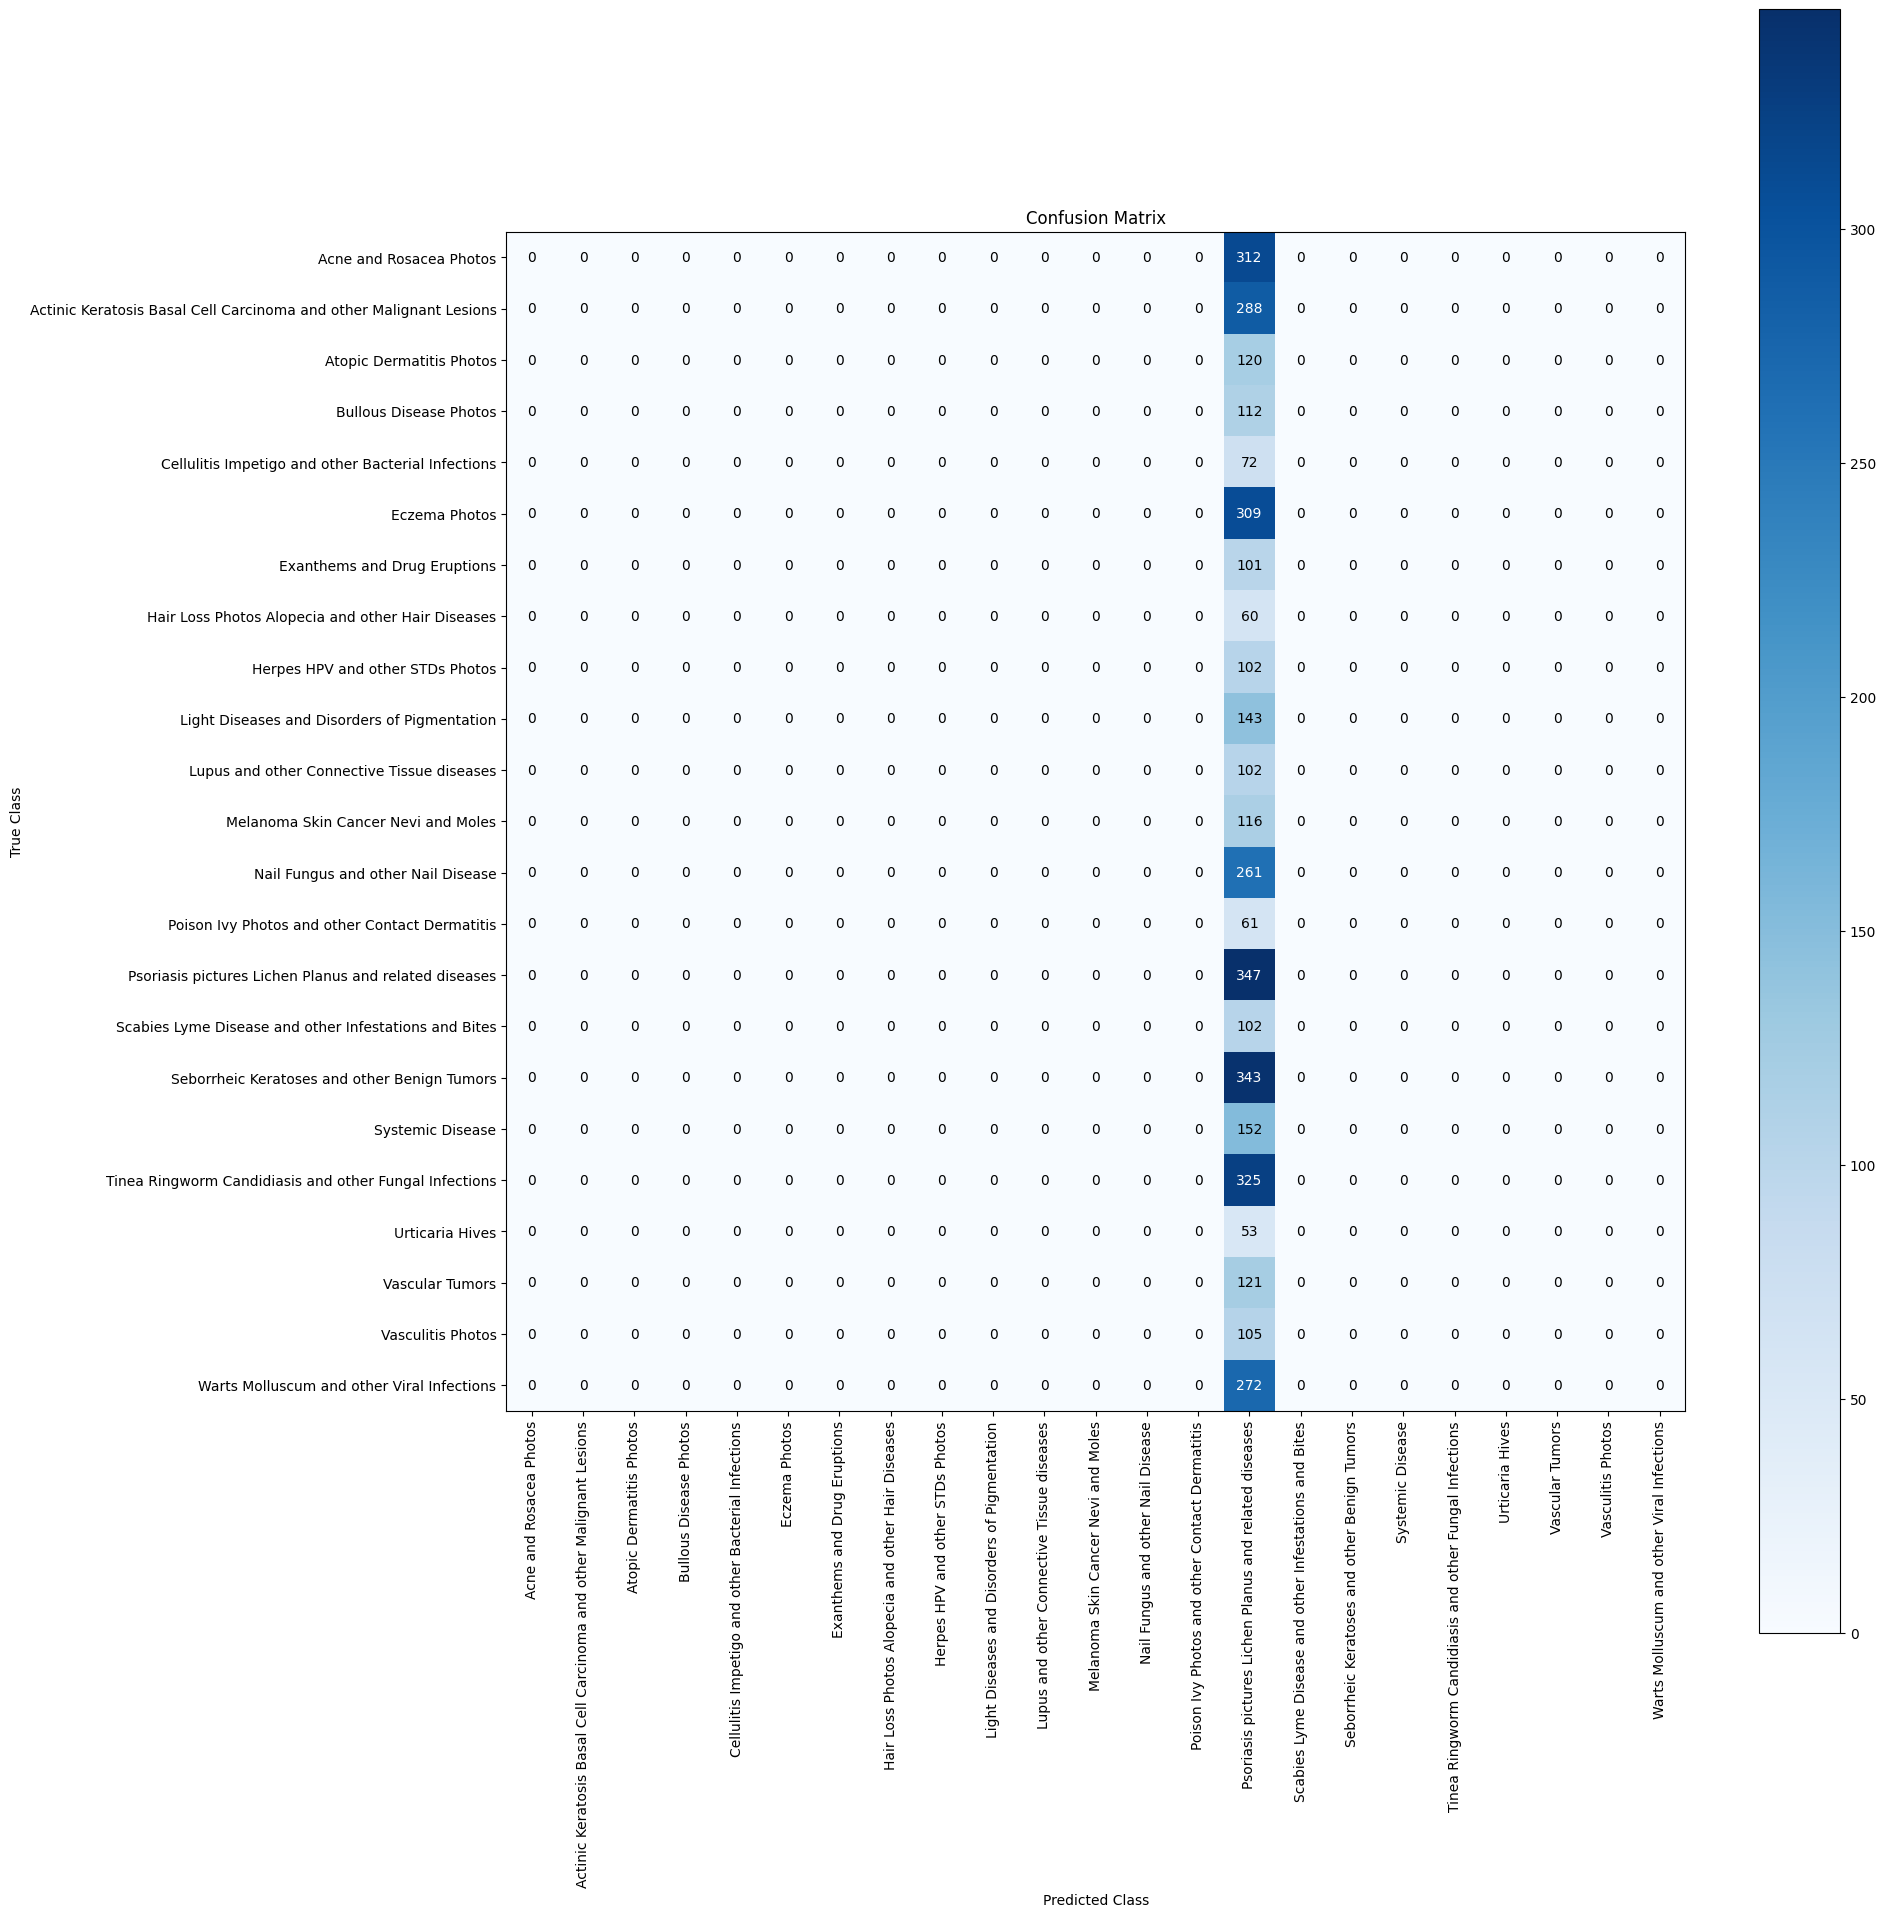

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.00      0.00      0.00       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
# Calculate precision, recall, f1 score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None)
class_labels = list(test_generator.class_indices.keys())
# Calculate specificity and sensitivity
specificity = []
sensitivity = recall  # Recall is the same as sensitivity

for i in range(len(conf_matrix)):
    true_negatives = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity.append(true_negatives / (true_negatives + false_positives))

# Display precision, recall, f1 score, specificity, and sensitivity for each class
metrics_table = {
    'Class': class_labels,
    'Precision': precision,
    'Recall (Sensitivity)': sensitivity,
    'F1 Score': f1,
    'Specificity': specificity
}

for idx, class_name in enumerate(class_labels):
    print(f"Class '{class_name}':")
    print(f"  Precision: {metrics_table['Precision'][idx]:.2f}")
    print(f"  Recall (Sensitivity): {metrics_table['Recall (Sensitivity)'][idx]:.2f}")
    print(f"  F1 Score: {metrics_table['F1 Score'][idx]:.2f}")
    print(f"  Specificity: {metrics_table['Specificity'][idx]:.2f}")
    print()
   

Class 'Acne and Rosacea Photos':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Atopic Dermatitis Photos':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Bullous Disease Photos':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Cellulitis Impetigo and other Bacterial Infections':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Eczema Photos':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Exanthems and Drug Eruptions':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F1 Score: 0.00
  Specificity: 1.00

Class 'Hair Loss Photos Alopecia and other Hair Diseases':
  Precision: 0.00
  Recall (Sensitivity): 0.00
  F

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

# Calculate precision, recall, f1 score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Calculate overall specificity (weighted)
conf_matrix = confusion_matrix(y_true, y_pred)
specificity_list = []

for i in range(len(conf_matrix)):
    true_negatives = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = true_negatives / (true_negatives + false_positives)
    specificity_list.append(specificity)

# Weighted specificity
overall_specificity = np.average(specificity_list, weights=support)

# Display the overall metrics
print("Overall Metrics:")
print(f"  Precision: {precision:.2f}")
print(f"  Recall (Sensitivity): {recall:.2f}")
print(f"  F1 Score: {f1:.2f}")
print(f"  Specificity: {overall_specificity:.2f}")


Overall Metrics:
  Precision: 0.01
  Recall (Sensitivity): 0.09
  F1 Score: 0.01
  Specificity: 0.96


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Using ResNet50

In [37]:
EPOCHS = 10
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))  # Use NUM_CLASSES_MOD for multi-class classification

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("resnet50_dernet.keras")

Epoch 1/10
482/482 [==============================] - 171s 349ms/step - loss: 3.4097 - accuracy: 0.0828 - val_loss: 3.0475 - val_accuracy: 0.0721
Epoch 2/10
482/482 [==============================] - 152s 316ms/step - loss: 3.0245 - accuracy: 0.0861 - val_loss: 3.0086 - val_accuracy: 0.0982
Epoch 3/10
482/482 [==============================] - 156s 324ms/step - loss: 2.9953 - accuracy: 0.0895 - val_loss: 2.9951 - val_accuracy: 0.0978
Epoch 4/10
482/482 [==============================] - 153s 318ms/step - loss: 2.9794 - accuracy: 0.0887 - val_loss: 2.9907 - val_accuracy: 0.0980
Epoch 5/10
482/482 [==============================] - 148s 307ms/step - loss: 2.9940 - accuracy: 0.0894 - val_loss: 2.9895 - val_accuracy: 0.0978
Epoch 6/10
482/482 [==============================] - 148s 307ms/step - loss: 2.9766 - accuracy: 0.0898 - val_loss: 2.9883 - val_accuracy: 0.0982
Epoch 7/10
482/482 [==============================] - 149s 310ms/step - loss: 2.9835 - accuracy: 0.0869 - val_loss: 2.9894 -

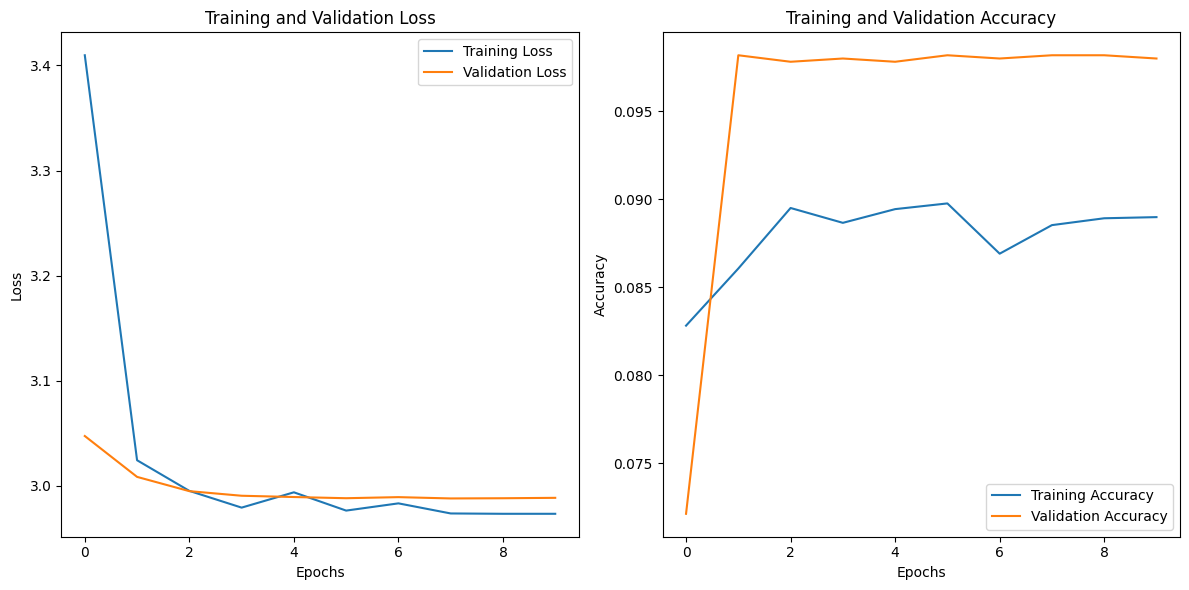

In [38]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 3979 images belonging to 23 classes.
125/125 [==============================] - 22s 172ms/step


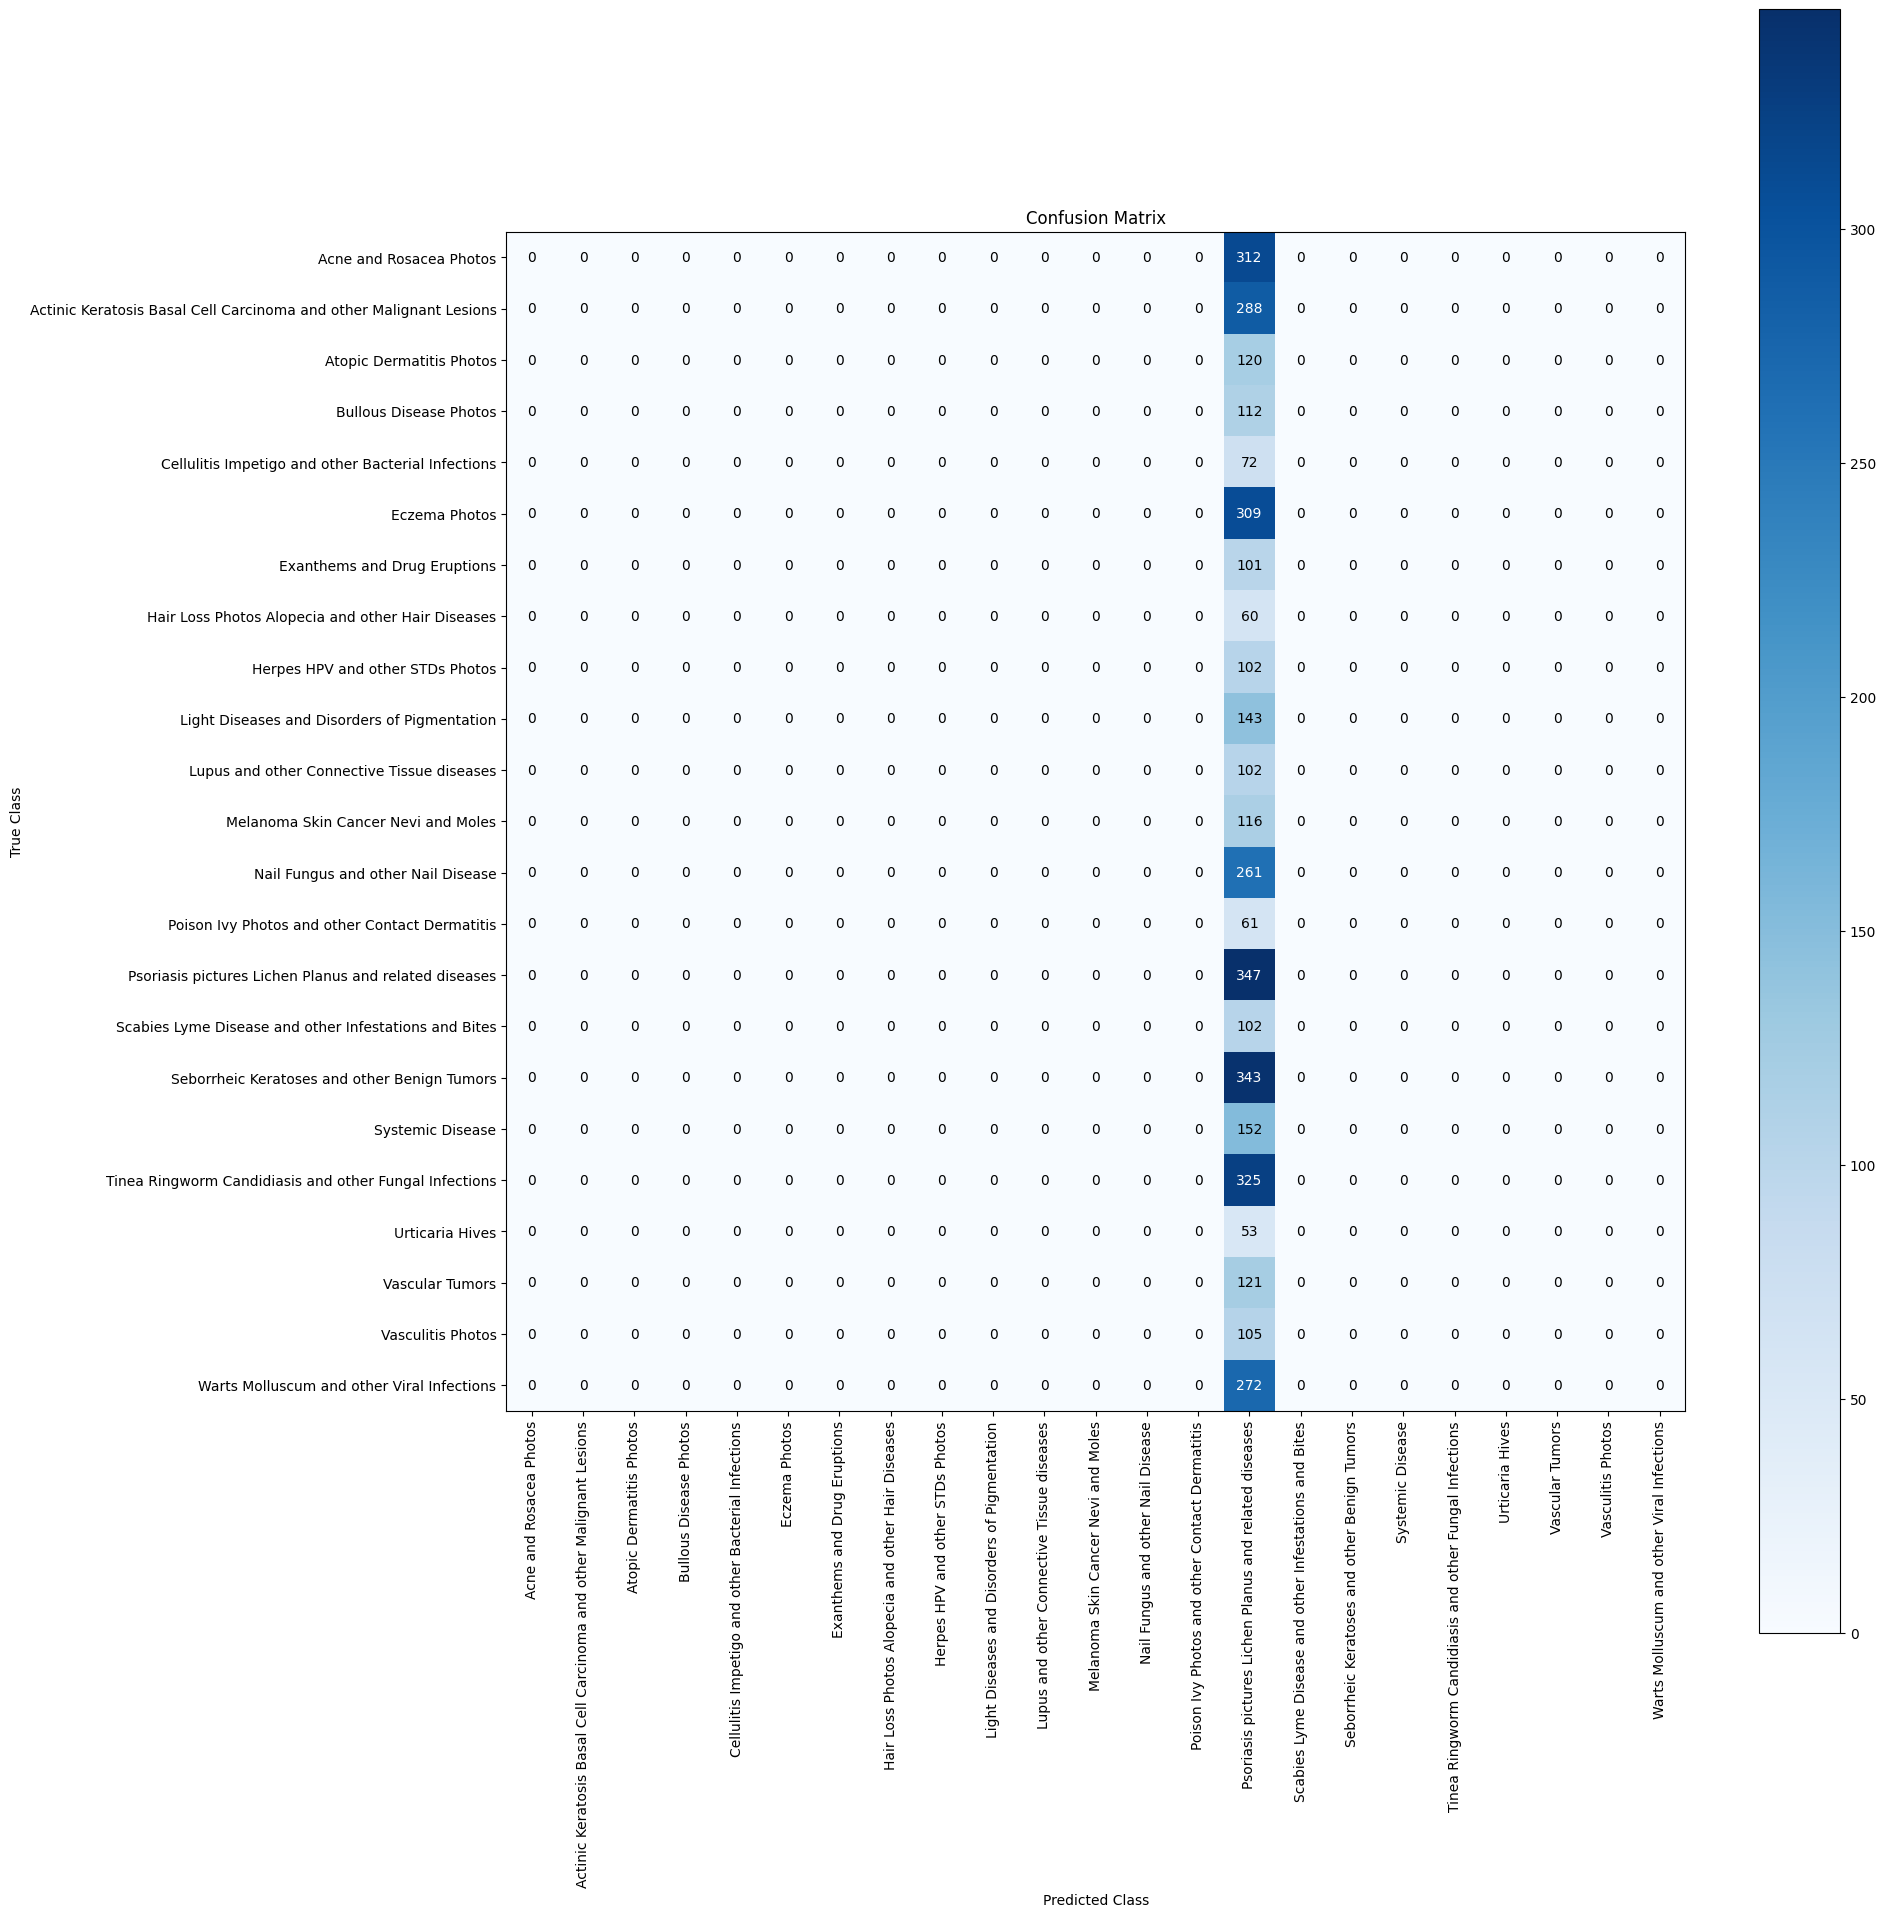

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.00      0.00      0.00       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
NUM_CLASSES_MOD=23
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load the model
model = tf.keras.models.load_model("resnet50_dernet.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES_MOD)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES_MOD):
    for j in range(NUM_CLASSES_MOD):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using Custom CNN

In [ ]:
EPOCHS = 50
NUM_CLASSES_MOD = 23
# Build the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("dermnet_sequential.keras")

2024-11-02 09:47:34.226954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 09:47:34.229242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-02 09:47:34.229327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-02 09:47:34.229361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your 

Epoch 1/50


2024-11-02 09:47:40.124436: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2024-11-02 09:47:43.109671: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


482/482 [==============================] - 351s 720ms/step - loss: 2.9568 - accuracy: 0.1113 - val_loss: 2.8757 - val_accuracy: 0.1466
Epoch 2/50
482/482 [==============================] - 583s 1s/step - loss: 2.8681 - accuracy: 0.1445 - val_loss: 2.8718 - val_accuracy: 0.1453
Epoch 3/50
482/482 [==============================] - 273s 567ms/step - loss: 2.8239 - accuracy: 0.1592 - val_loss: 2.7753 - val_accuracy: 0.1747
Epoch 4/50
482/482 [==============================] - 459s 952ms/step - loss: 2.7766 - accuracy: 0.1759 - val_loss: 2.7397 - val_accuracy: 0.1849
Epoch 5/50
482/482 [==============================] - 213s 441ms/step - loss: 2.7418 - accuracy: 0.1852 - val_loss: 2.6477 - val_accuracy: 0.2243
Epoch 6/50
482/482 [==============================] - 211s 437ms/step - loss: 2.7108 - accuracy: 0.1966 - val_loss: 2.6333 - val_accuracy: 0.2219
Epoch 7/50
482/482 [==============================] - 259s 537ms/step - loss: 2.6870 - accuracy: 0.2002 - val_loss: 2.6029 - val_accuracy:

In [9]:
# EPOCHS = 30
NUM_CLASSES_MOD = 23
# Build the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("dermnet_sequential.keras")

Epoch 1/50


2024-11-02 12:58:16.457106: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2024-11-02 12:58:19.228452: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


482/482 [==============================] - 230s 469ms/step - loss: 2.9314 - accuracy: 0.1252 - val_loss: 2.8753 - val_accuracy: 0.1487
Epoch 2/50
482/482 [==============================] - 147s 305ms/step - loss: 2.8604 - accuracy: 0.1459 - val_loss: 2.8100 - val_accuracy: 0.1642
Epoch 3/50
482/482 [==============================] - 153s 318ms/step - loss: 2.8306 - accuracy: 0.1611 - val_loss: 2.7824 - val_accuracy: 0.1747
Epoch 4/50
482/482 [==============================] - 407s 845ms/step - loss: 2.7899 - accuracy: 0.1724 - val_loss: 2.7464 - val_accuracy: 0.1842
Epoch 5/50
482/482 [==============================] - 148s 308ms/step - loss: 2.7653 - accuracy: 0.1768 - val_loss: 2.7142 - val_accuracy: 0.1943
Epoch 6/50
482/482 [==============================] - 148s 306ms/step - loss: 2.7303 - accuracy: 0.1858 - val_loss: 2.6774 - val_accuracy: 0.2001
Epoch 7/50
482/482 [==============================] - 148s 307ms/step - loss: 2.7040 - accuracy: 0.1981 - val_loss: 2.6299 - val_accura

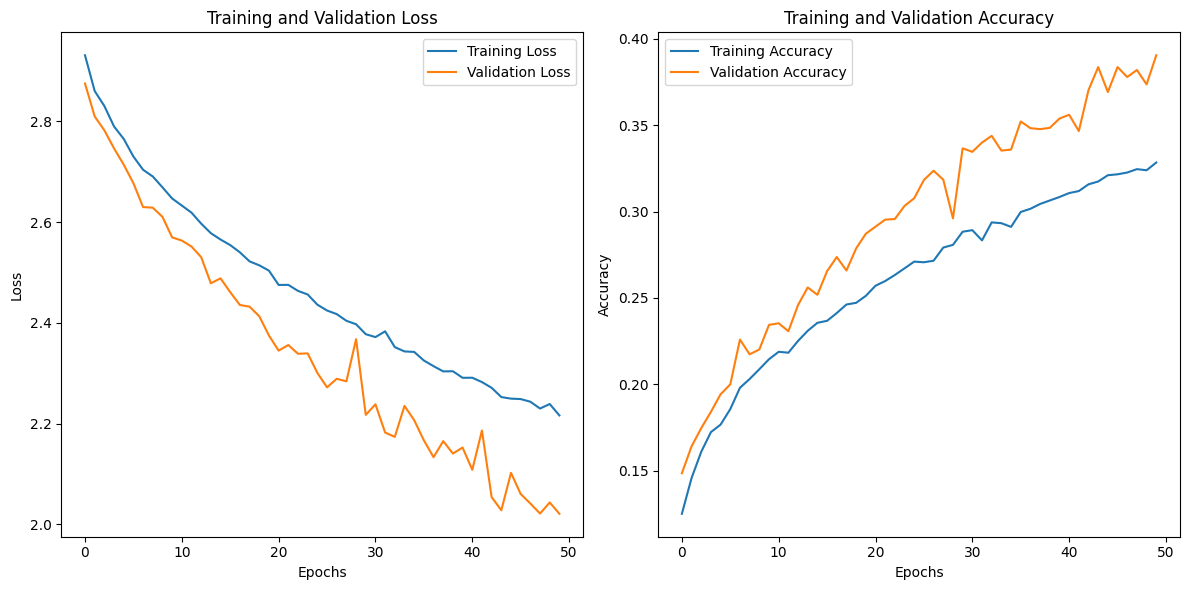

In [10]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 3979 images belonging to 23 classes.
125/125 [==============================] - 36s 286ms/step


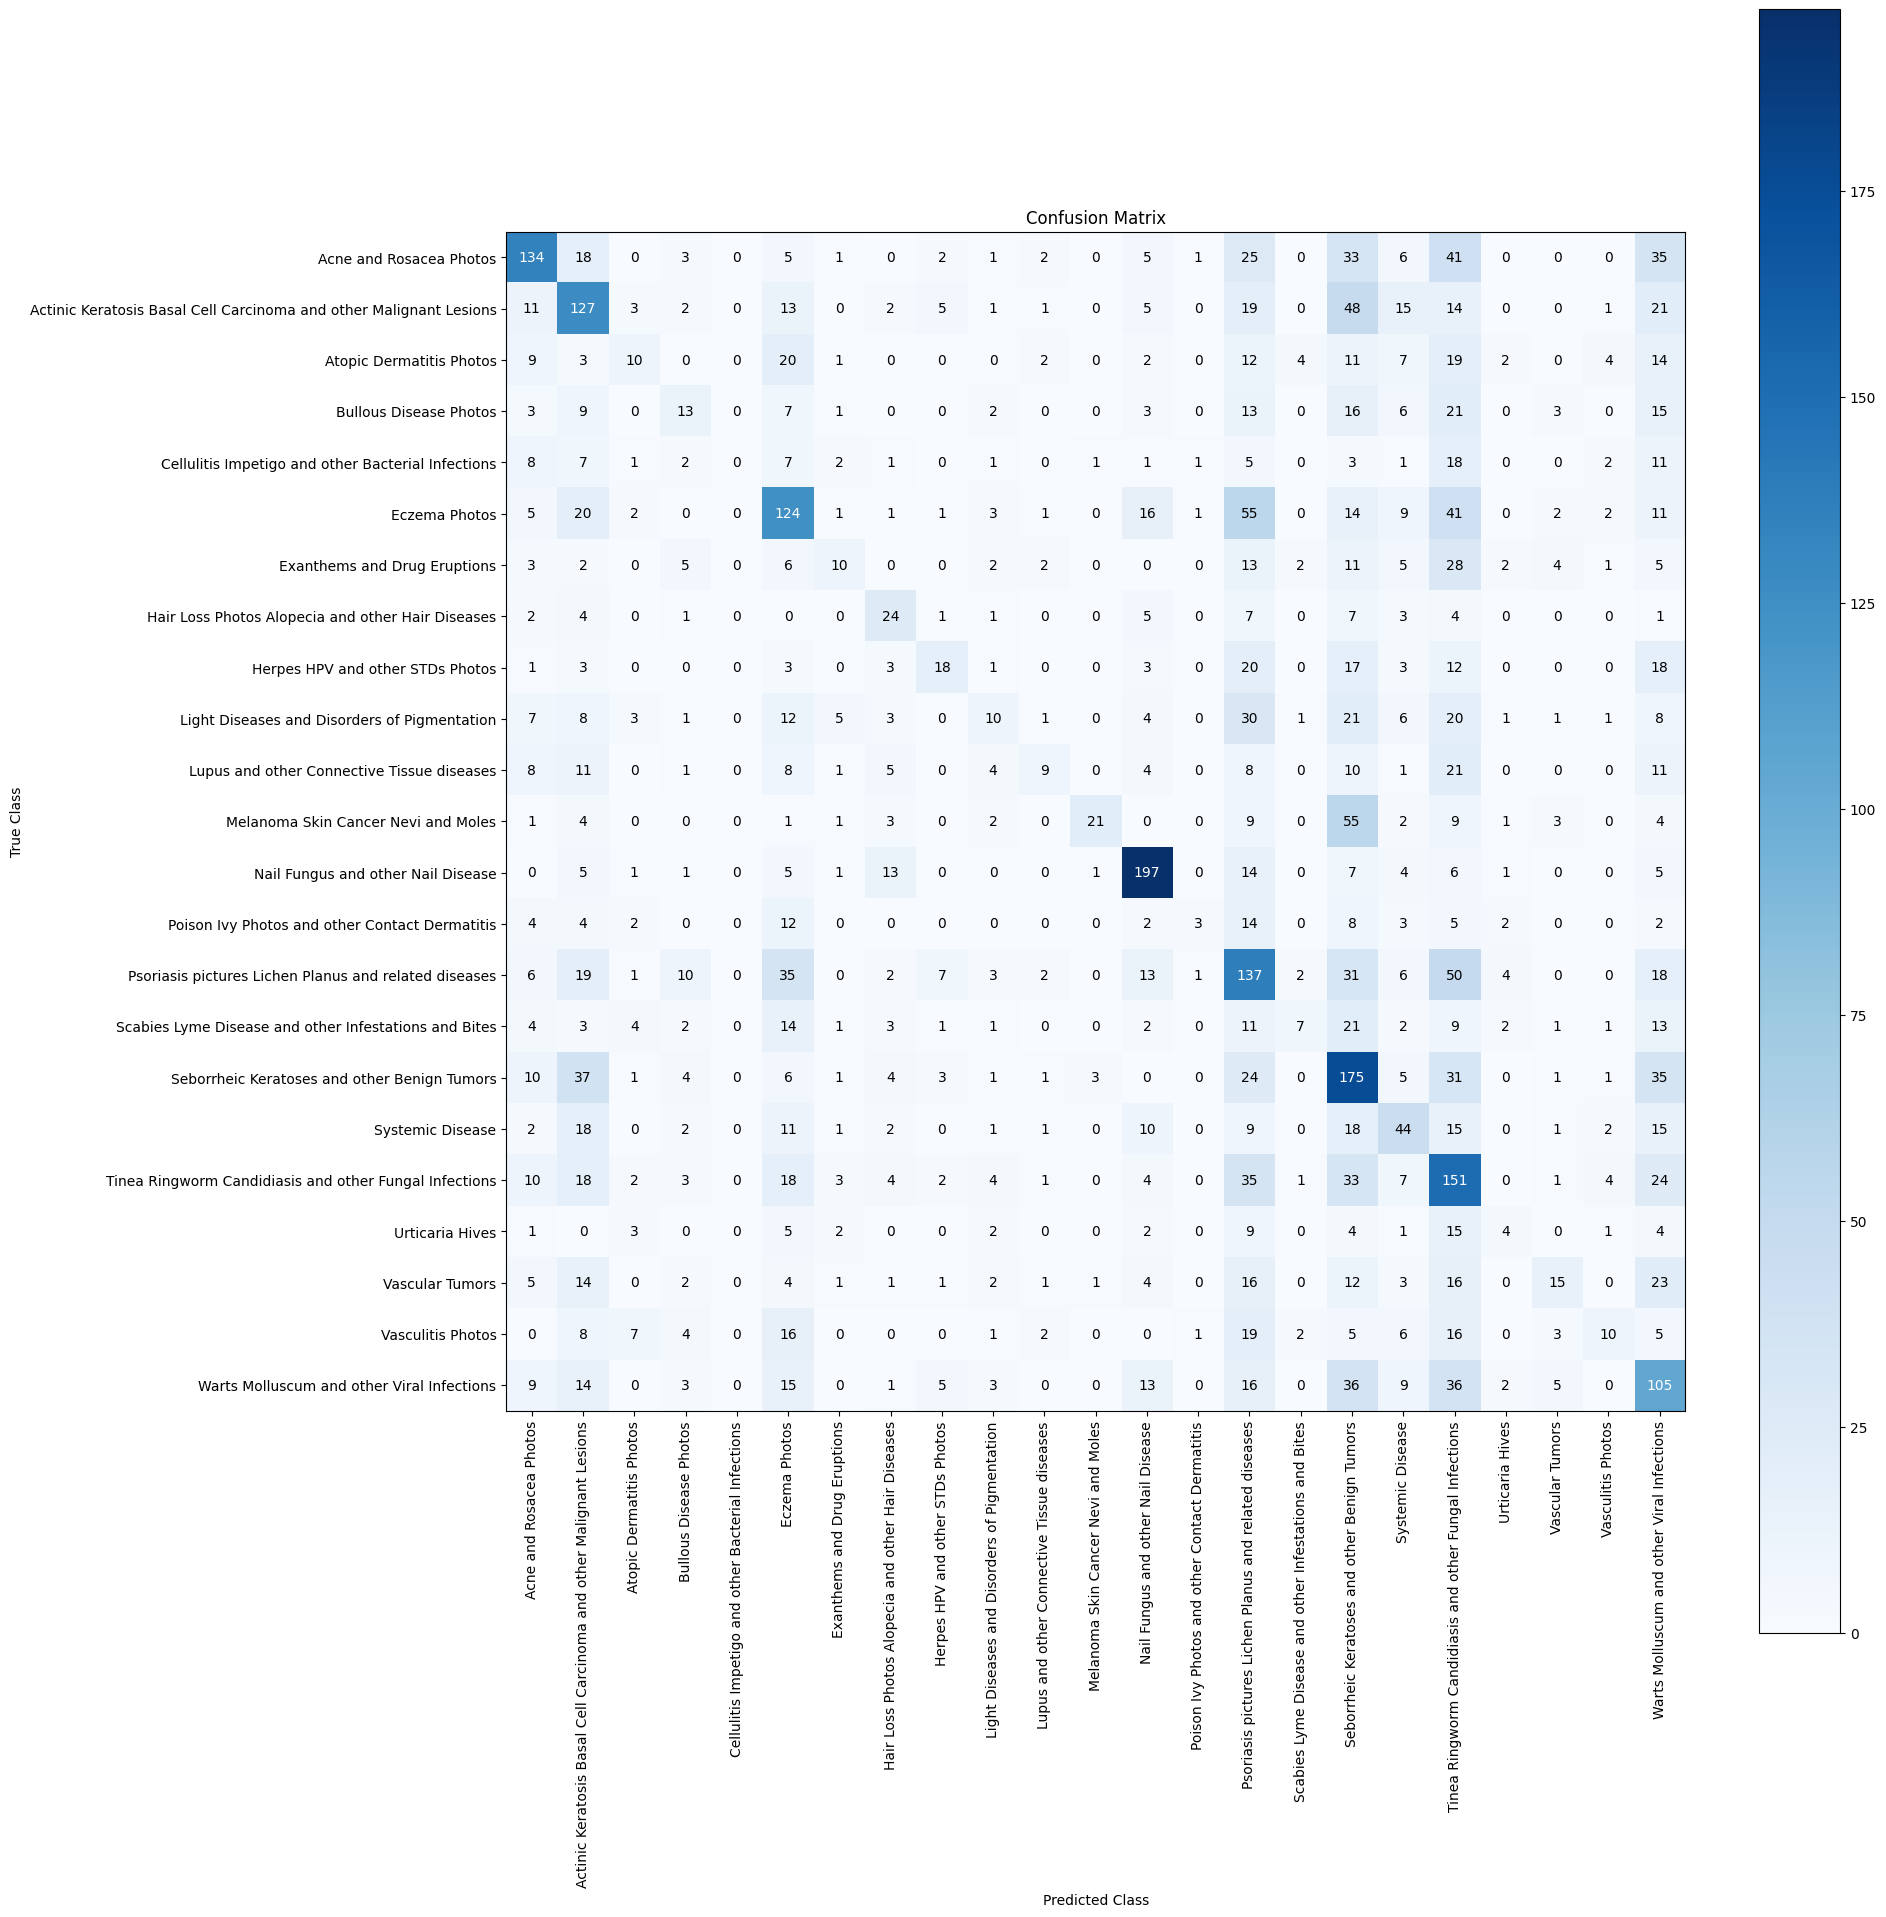

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.55      0.43      0.48       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.36      0.44      0.39       288
                                          Atopic Dermatitis Photos       0.25      0.08      0.12       120
                                            Bullous Disease Photos       0.22      0.12      0.15       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.36      0.40      0.38       309
                                      Exanthems and Drug Eruptions       0.30      0.10      0.15       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.33      0.40      0.36        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("dermnet_sequential.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

In [5]:
NUM_CLASSES_MOD=23
EPOCHS = 50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
# Build the Sequential model
model = Sequential()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Replacing Flatten with Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully connected layer
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("ringworm_sequential_optimal.keras")

2024-11-03 08:32:25.492139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-03 08:32:25.494452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-03 08:32:25.494568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-03 08:32:25.494626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your 

Epoch 1/50


2024-11-03 08:32:30.977243: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2024-11-03 08:32:33.914054: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


482/482 [==============================] - 342s 699ms/step - loss: 2.9726 - accuracy: 0.1352 - val_loss: 3.1872 - val_accuracy: 0.0963
Epoch 2/50
482/482 [==============================] - 273s 567ms/step - loss: 2.8374 - accuracy: 0.1596 - val_loss: 3.1677 - val_accuracy: 0.1322
Epoch 3/50
482/482 [==============================] - 303s 629ms/step - loss: 2.7862 - accuracy: 0.1713 - val_loss: 2.8674 - val_accuracy: 0.1526
Epoch 4/50
482/482 [==============================] - 279s 578ms/step - loss: 2.7340 - accuracy: 0.1869 - val_loss: 2.8122 - val_accuracy: 0.1677
Epoch 5/50
482/482 [==============================] - 702s 1s/step - loss: 2.6928 - accuracy: 0.2004 - val_loss: 3.1050 - val_accuracy: 0.1220
Epoch 6/50
482/482 [==============================] - 546s 1s/step - loss: 2.6475 - accuracy: 0.2138 - val_loss: 2.6447 - val_accuracy: 0.2093
Epoch 7/50
482/482 [==============================] - 643s 1s/step - loss: 2.6116 - accuracy: 0.2206 - val_loss: 2.5979 - val_accuracy: 0.226

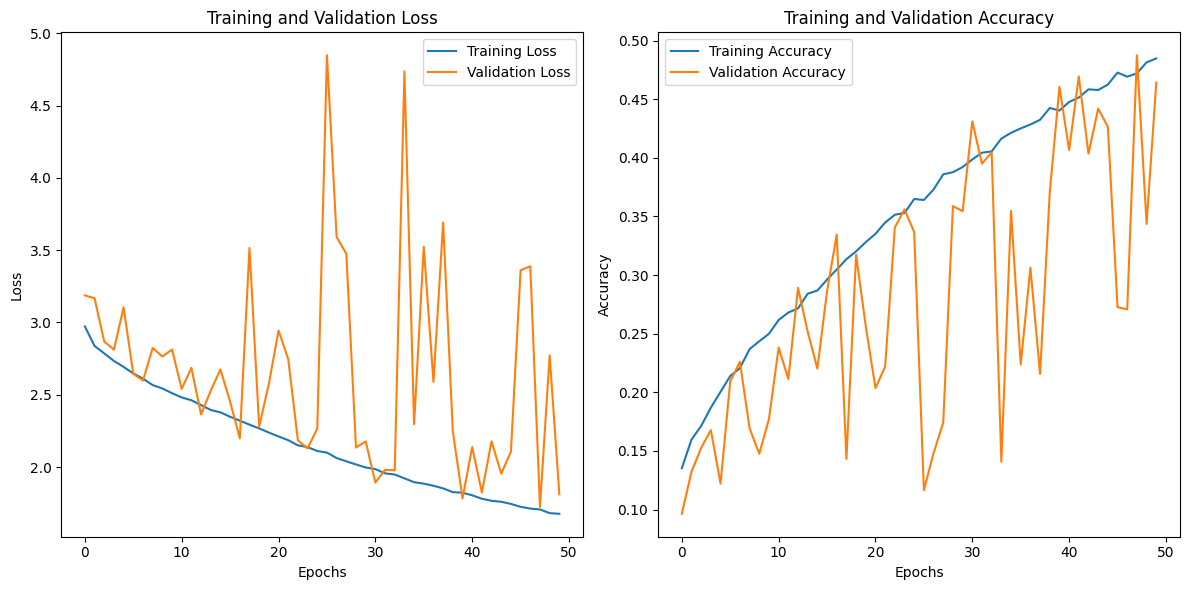

In [6]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 3979 images belonging to 23 classes.
125/125 [==============================] - 54s 431ms/step


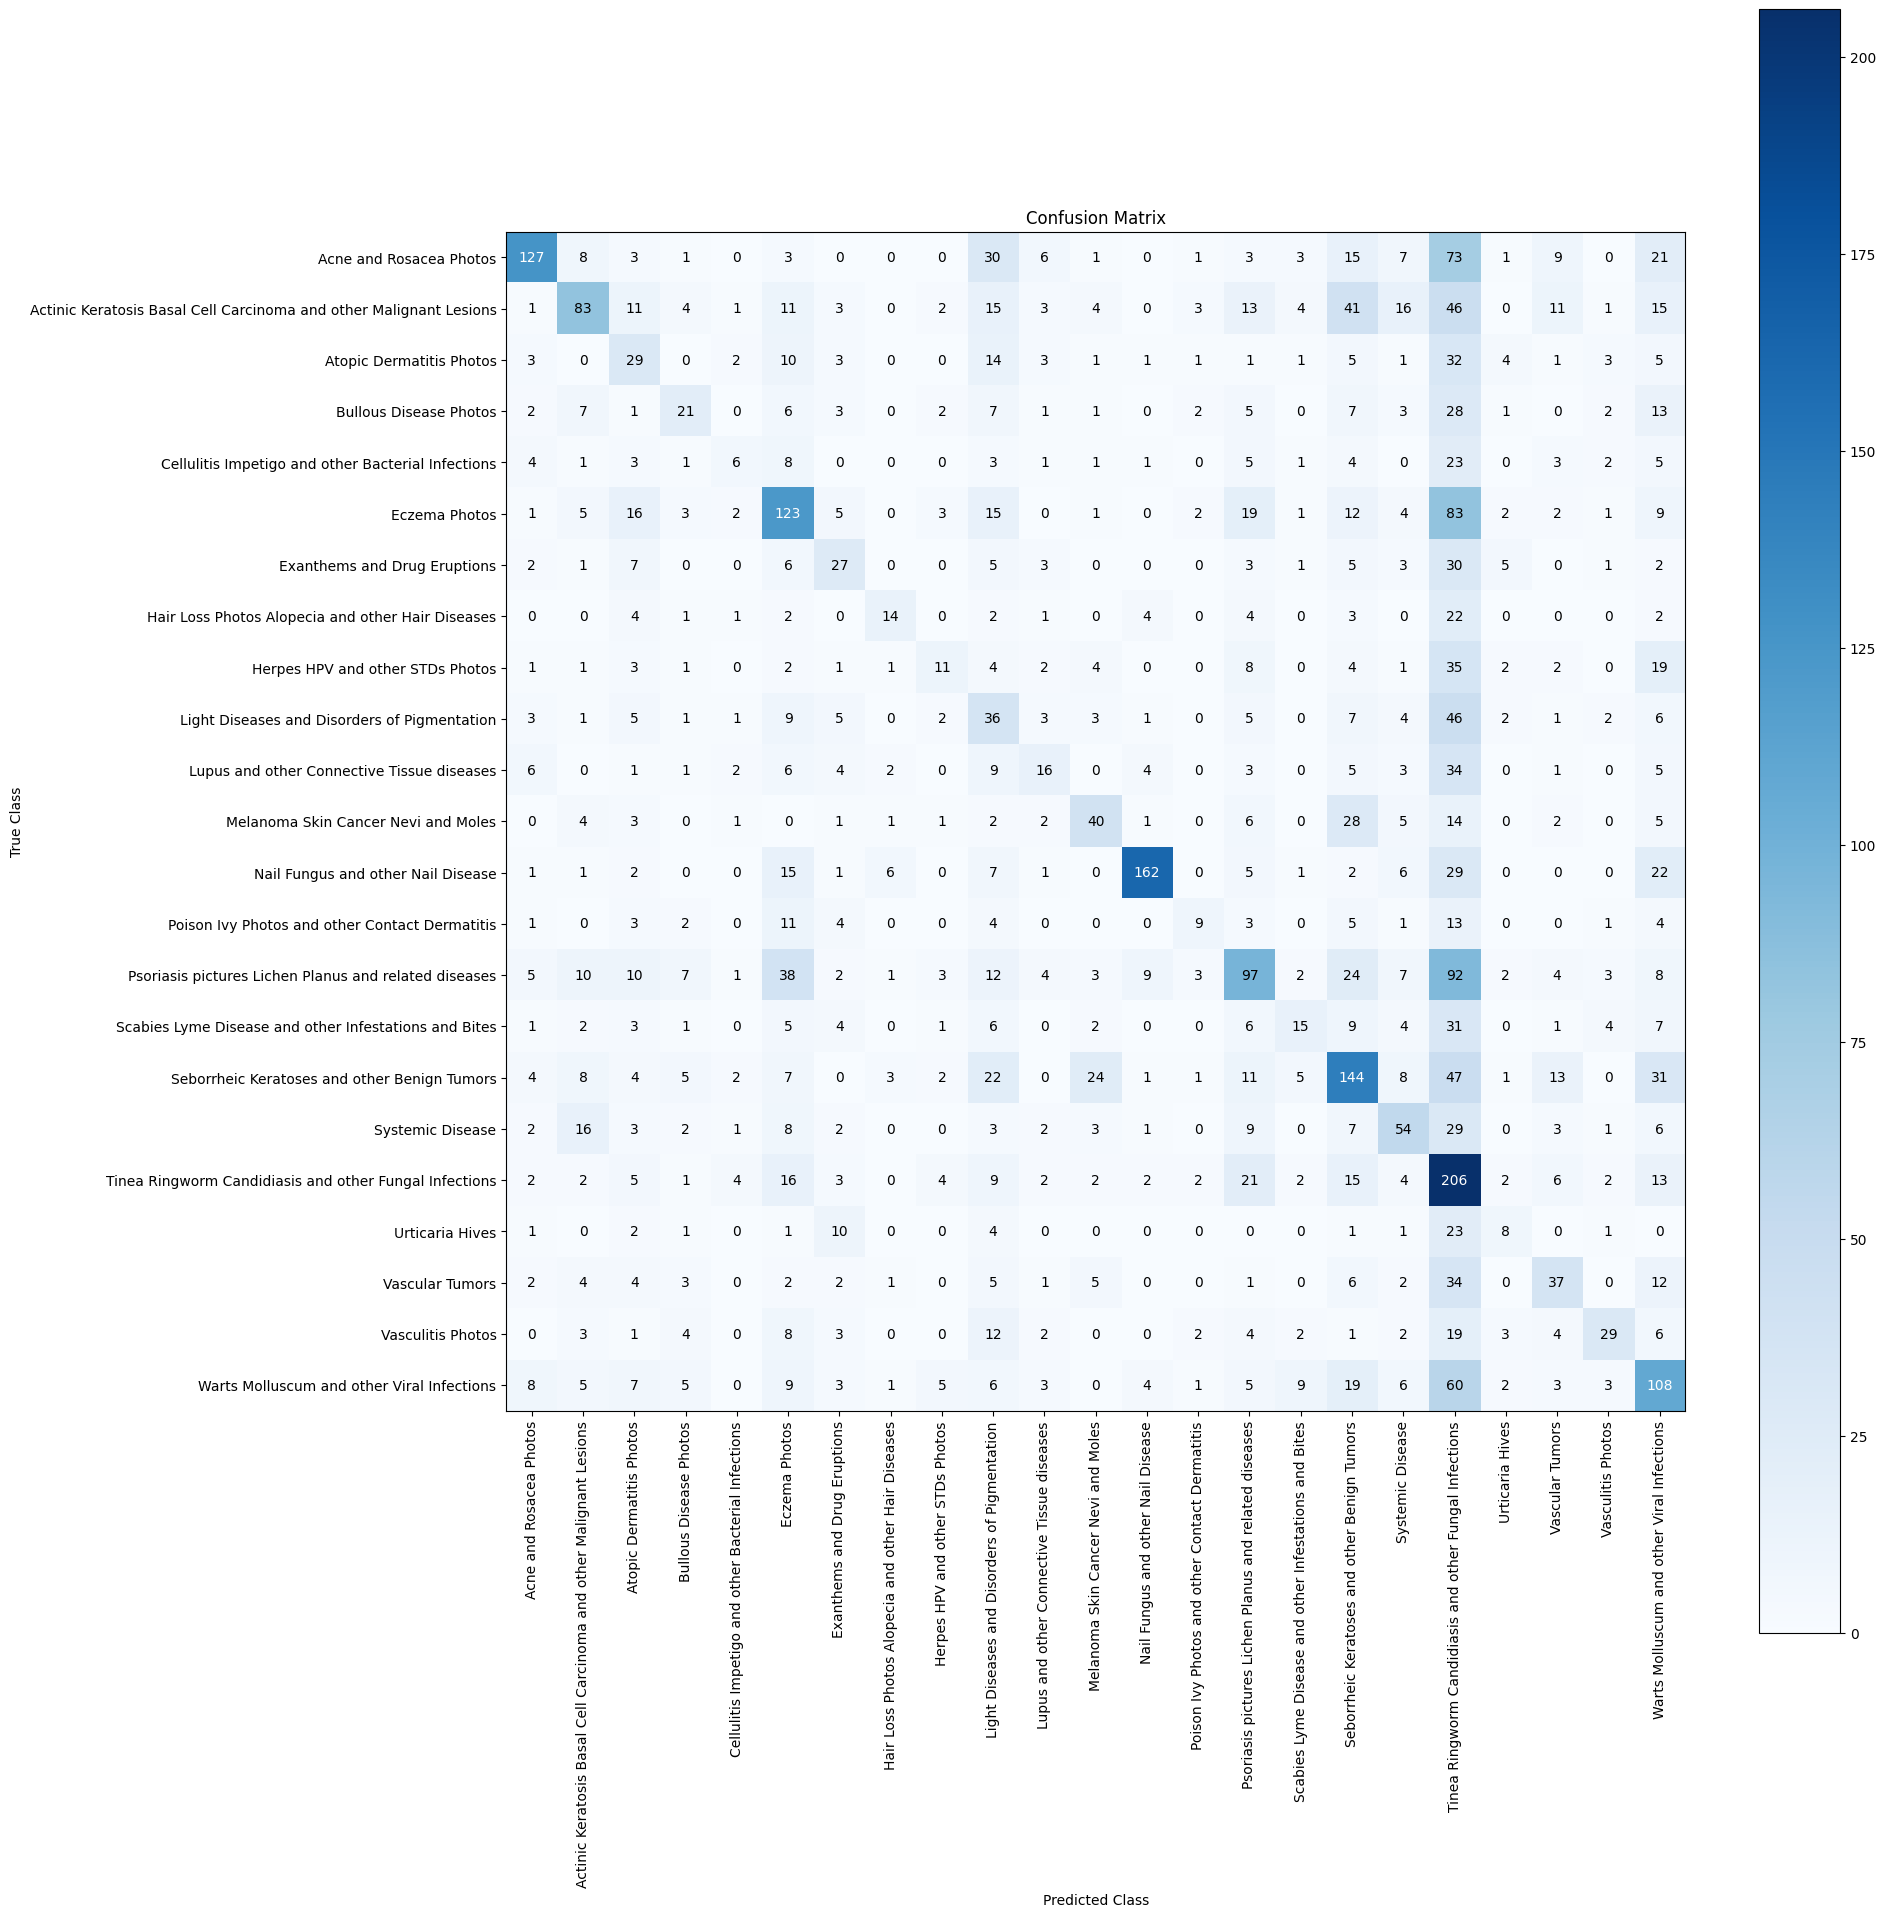

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.72      0.41      0.52       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.51      0.29      0.37       288
                                          Atopic Dermatitis Photos       0.22      0.24      0.23       120
                                            Bullous Disease Photos       0.32      0.19      0.24       112
                Cellulitis Impetigo and other Bacterial Infections       0.25      0.08      0.12        72
                                                     Eczema Photos       0.40      0.40      0.40       309
                                      Exanthems and Drug Eruptions       0.31      0.27      0.29       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.47      0.23      0.31        60
    

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("ringworm_sequential_optimal.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

In [10]:
import shutil

# Delete the directory to clear previous tuning results
shutil.rmtree("my_tuning_dir", ignore_errors=True)


#Hyperparameter optimization - Random Search

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import keras_tuner as kt

# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float("dropout_rate", 0.2, 0.5, step=0.05)))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float("dropout_rate", 0.2, 0.5, step=0.05)))

    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float("dropout_rate", 0.2, 0.5, step=0.05)))

    model.add(Conv2D(256, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float("dropout_rate", 0.2, 0.5, step=0.05)))

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(23, activation="softmax"))  # Set to 23 for your classes

    # Compile the model with variable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", [1e-3, 1e-4])),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Initialize the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    directory="my_tuning_dir",
    project_name="cnn_tuning"
)

# Run the search for the best hyperparameters
tuner.search(train_generator, validation_data=valid_generator, epochs=5)

# Retrieve the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best learning rate:", best_hp.get("learning_rate"))
print("Best dropout rate:", best_hp.get("dropout_rate"))


Trial 5 Complete [00h 12m 18s]
val_accuracy: 0.1409074068069458

Best val_accuracy So Far: 0.20324602723121643
Total elapsed time: 01h 32m 32s
Best learning rate: 0.001
Best dropout rate: 0.25


#Using InceptionV3

In [40]:
EPOCHS=10
from tensorflow.keras.applications import InceptionV3

# Load pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))  # For binary classification use NUM_CLASSES=2

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("inceptionv3_dermnet.keras")

Epoch 1/10
482/482 [==============================] - 151s 307ms/step - loss: 4.2230 - accuracy: 0.0886 - val_loss: 3.0505 - val_accuracy: 0.0984
Epoch 2/10
482/482 [==============================] - 147s 305ms/step - loss: 3.0152 - accuracy: 0.0932 - val_loss: 2.9314 - val_accuracy: 0.1318
Epoch 3/10
482/482 [==============================] - 147s 305ms/step - loss: 2.9561 - accuracy: 0.1048 - val_loss: 2.8968 - val_accuracy: 0.1379
Epoch 4/10
482/482 [==============================] - 149s 308ms/step - loss: 2.9300 - accuracy: 0.1083 - val_loss: 2.9305 - val_accuracy: 0.1289
Epoch 5/10
482/482 [==============================] - 145s 301ms/step - loss: 2.9258 - accuracy: 0.1127 - val_loss: 2.8787 - val_accuracy: 0.1392
Epoch 6/10
482/482 [==============================] - 147s 305ms/step - loss: 2.9112 - accuracy: 0.1138 - val_loss: 2.8688 - val_accuracy: 0.1411
Epoch 7/10
482/482 [==============================] - 147s 305ms/step - loss: 2.9218 - accuracy: 0.1080 - val_loss: 2.9160 -

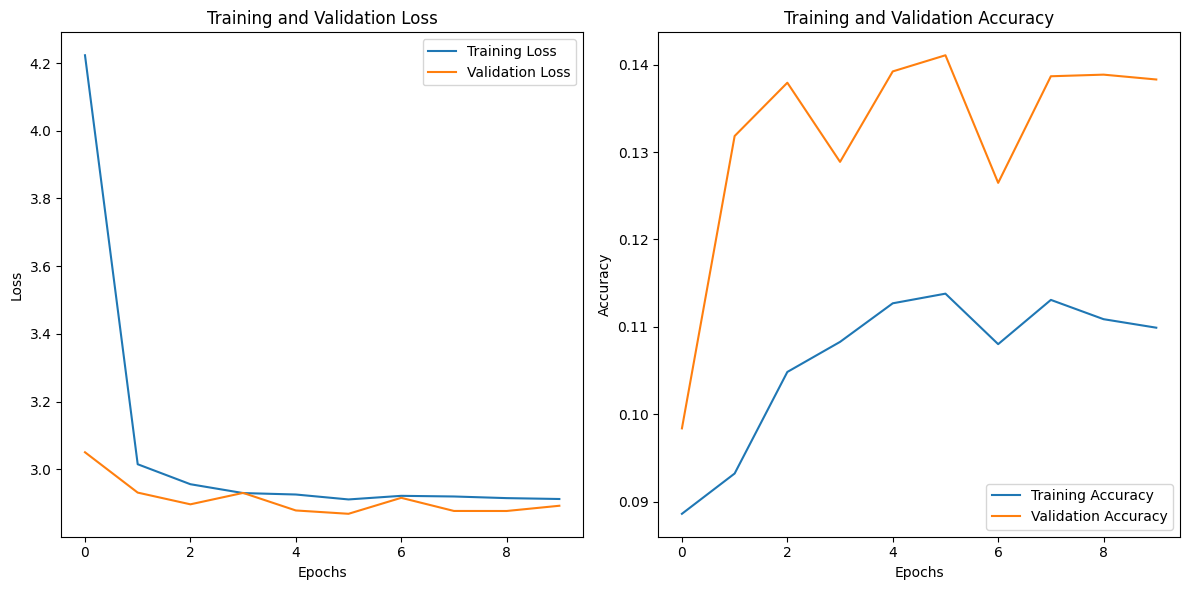

In [41]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 3979 images belonging to 23 classes.
125/125 [==============================] - 21s 162ms/step


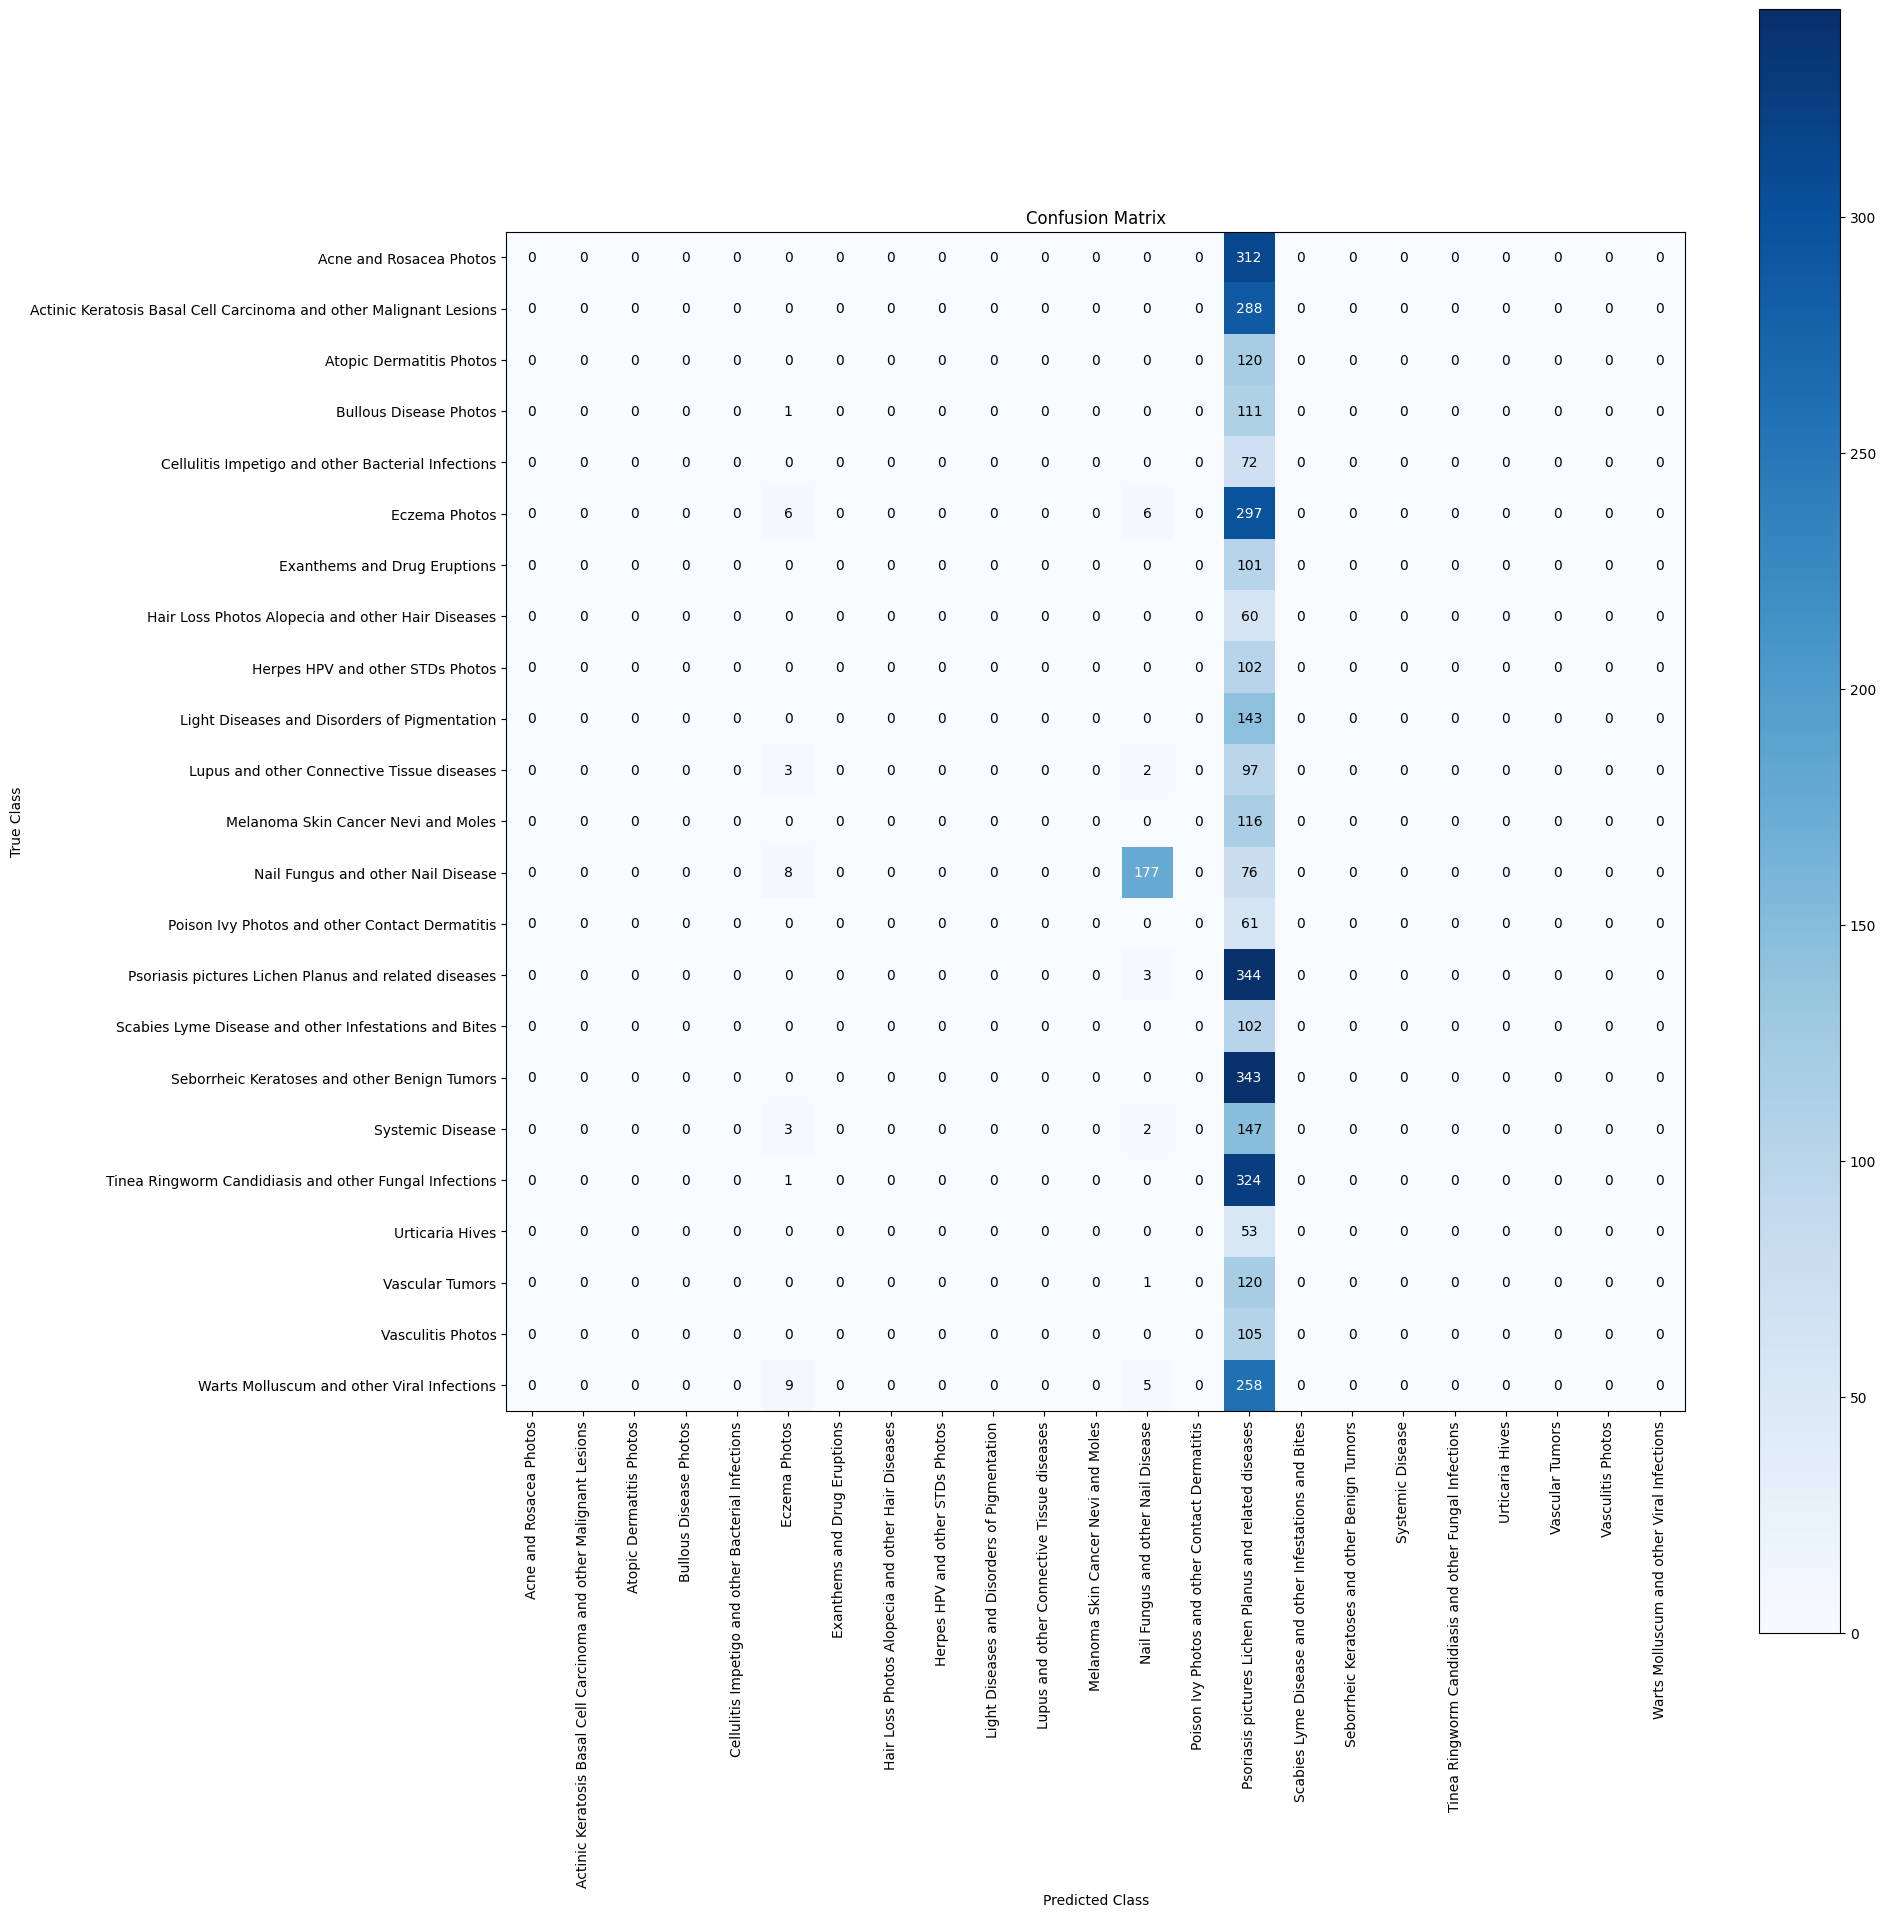

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.19      0.02      0.04       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("inceptionv3_dermnet.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES_MOD)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using Densenet121

In [43]:
EPOCHS = 10
from tensorflow.keras.applications import DenseNet121

# Load pre-trained DenseNet121 model
base_model = DenseNet121(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))  # Use NUM_CLASSES_MOD for multi-class classification

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model in native Keras format (recommended)
model.save("densenet121_dermnet.keras")

Epoch 1/10
482/482 [==============================] - 222s 453ms/step - loss: 3.8780 - accuracy: 0.1247 - val_loss: 2.8302 - val_accuracy: 0.1842
Epoch 2/10
482/482 [==============================] - 218s 452ms/step - loss: 2.9108 - accuracy: 0.1330 - val_loss: 2.8117 - val_accuracy: 0.1794
Epoch 3/10
482/482 [==============================] - 217s 450ms/step - loss: 2.8765 - accuracy: 0.1350 - val_loss: 2.7750 - val_accuracy: 0.1810
Epoch 4/10
482/482 [==============================] - 218s 452ms/step - loss: 2.8625 - accuracy: 0.1372 - val_loss: 2.7787 - val_accuracy: 0.1890
Epoch 5/10
482/482 [==============================] - 222s 459ms/step - loss: 2.8597 - accuracy: 0.1342 - val_loss: 2.7912 - val_accuracy: 0.1851
Epoch 6/10
482/482 [==============================] - 218s 451ms/step - loss: 2.8584 - accuracy: 0.1357 - val_loss: 2.7458 - val_accuracy: 0.1953
Epoch 7/10
482/482 [==============================] - 214s 444ms/step - loss: 2.8508 - accuracy: 0.1372 - val_loss: 2.7302 -

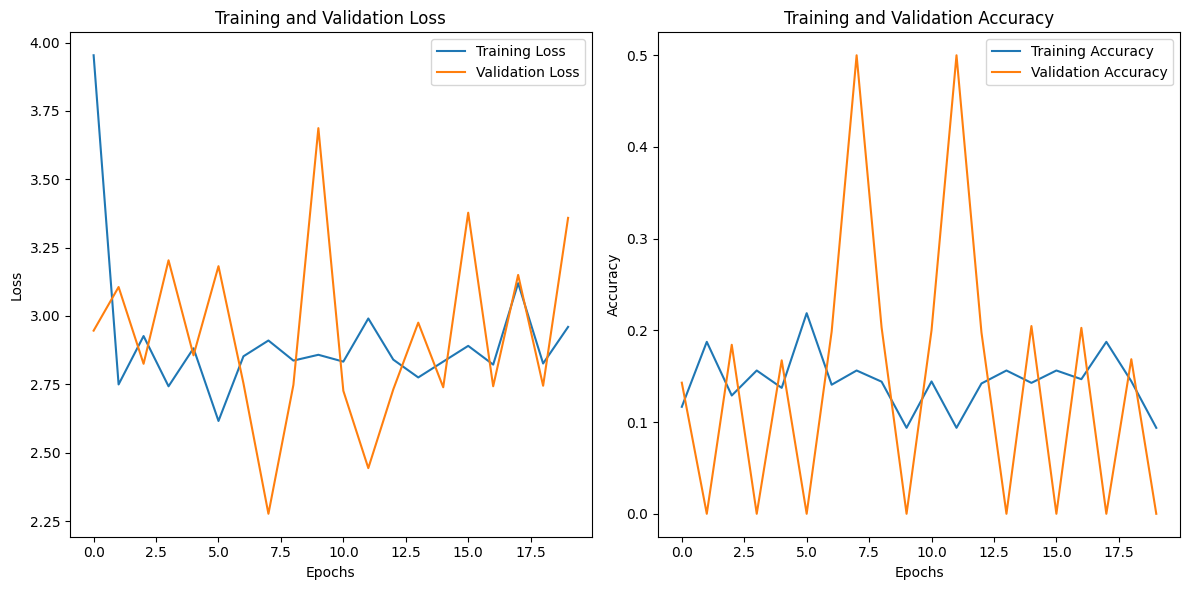

In [21]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 3979 images belonging to 23 classes.


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 227ms/step


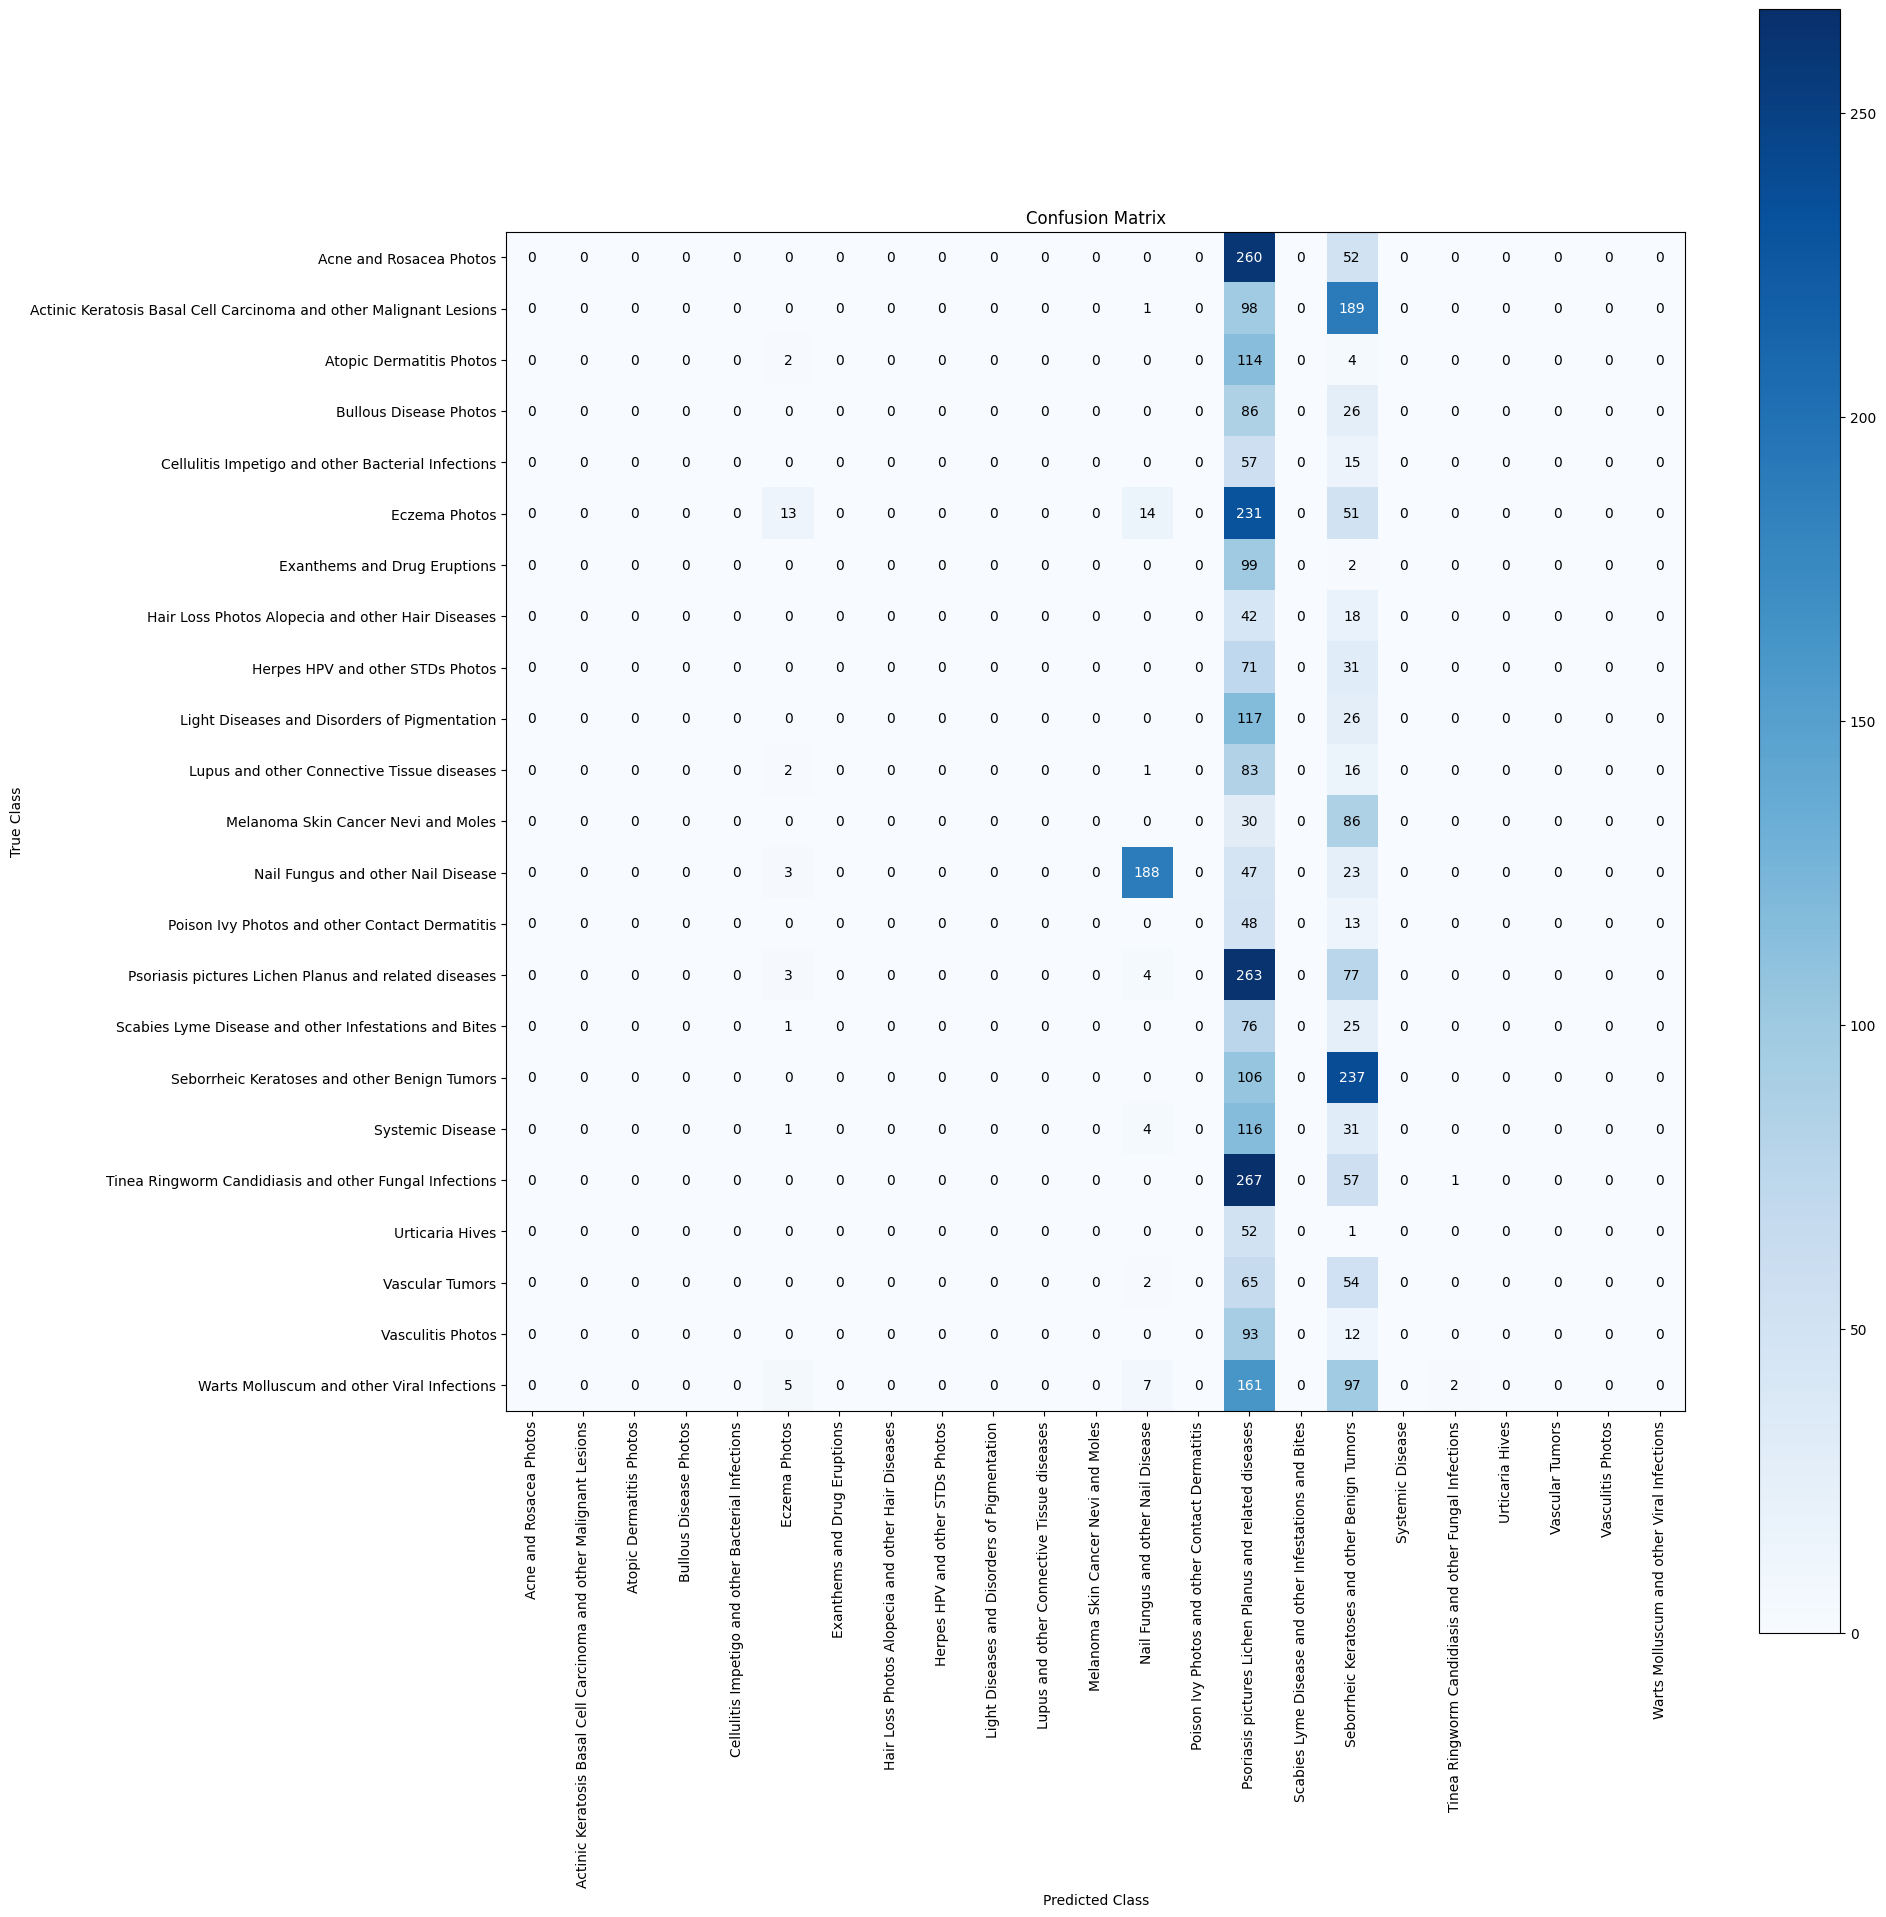

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.43      0.04      0.08       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("densenet121_dermnet.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES_MOD)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

#Using Custom Vision Transformer

In [20]:
EPOCHS_VIT=50
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define constants
IMAGE_SIZE = (224, 224)
PATCH_SIZE = 16
NUM_PATCHES = (IMAGE_SIZE[0] // PATCH_SIZE) ** 2
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_LAYERS = 8
MLP_UNITS = [2048, 1024]
NUM_CLASSES = 23  # Example for 10 classes (modify as needed)
DROPOUT_RATE = 0.1
BATCH_SIZE = 32
seed_value = 42


# Define the data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.Rescaling(1./255),  # Normalization
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation"
)

# Helper function to apply data augmentation to each batch
def augment_data(images, labels):
    return data_augmentation(images), labels

# Load the train, validation, and test datasets with augmentation applied in map function
train_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dermnet/train', 
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, seed=seed_value
).map(augment_data)

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dermnet/validation', 
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, seed=seed_value
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dermnet/test', 
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, seed=seed_value
)

# Define the Patch Encoder layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

# Create the Vision Transformer (ViT) model
def create_vit_classifier():
    inputs = layers.Input(shape=(*IMAGE_SIZE, 3))
    
    # Create patches from the images
    patches = layers.Conv2D(PROJECTION_DIM, PATCH_SIZE, PATCH_SIZE, padding="valid")(inputs)
    patches = layers.Reshape((NUM_PATCHES, PROJECTION_DIM))(patches)
    
    # Encode the patches
    encoded_patches = PatchEncoder(NUM_PATCHES, PROJECTION_DIM)(patches)
    
    # Create Transformer blocks
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization and multi-head attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=DROPOUT_RATE
        )(x1, x1)
        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization and feed-forward network (MLP)
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(PROJECTION_DIM * 2, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(DROPOUT_RATE)(x3)
        x3 = layers.Dense(PROJECTION_DIM, activation=tf.nn.gelu)(x3)
        
        # Skip connection
        encoded_patches = layers.Add()([x3, x2])
    
    # Create a classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(DROPOUT_RATE)(representation)
    
    # MLP Head
    features = layers.Dense(MLP_UNITS[0], activation=tf.nn.gelu)(representation)
    features = layers.Dropout(DROPOUT_RATE)(features)
    features = layers.Dense(MLP_UNITS[1], activation=tf.nn.gelu)(features)
    
    # Output layer
    logits = layers.Dense(NUM_CLASSES)(features)
    
    # Create the Keras model
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# Compile and train the model
vit_model = create_vit_classifier()
vit_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
history = vit_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=EPOCHS_VIT
)

# Save the model
vit_model.save('vit_model_SOTA_dermnet.keras')

# Evaluate the model on the test set
test_loss, test_acc = vit_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.4f}')

Found 15428 files belonging to 23 classes.
Found 5422 files belonging to 23 classes.
Found 3979 files belonging to 23 classes.
Epoch 1/50
482/483 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.1185 - loss: 3.1146

2024-10-29 17:30:53.507549: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_319', 12 bytes spill stores, 12 bytes spill loads

2024-10-29 17:30:55.304182: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_335', 4 bytes spill stores, 4 bytes spill loads

2024-10-29 17:30:56.071680: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_53', 8 bytes spill stores, 8 bytes spill loads

2024-10-29 17:30:56.629889: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_335', 4 bytes spill stores, 4 bytes spill loads



483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.1186 - loss: 3.1142

2024-10-29 17:31:28.306874: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 12 bytes spill stores, 12 bytes spill loads



483/483 ━━━━━━━━━━━━━━━━━━━━ 211s 335ms/step - accuracy: 0.1186 - loss: 3.1139 - val_accuracy: 0.0575 - val_loss: 5.5097
Epoch 2/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 115s 236ms/step - accuracy: 0.1681 - loss: 2.8077 - val_accuracy: 0.0599 - val_loss: 6.1937
Epoch 3/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 105s 217ms/step - accuracy: 0.1923 - loss: 2.7155 - val_accuracy: 0.0610 - val_loss: 6.1967
Epoch 4/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 59s 122ms/step - accuracy: 0.2169 - loss: 2.6455 - val_accuracy: 0.0527 - val_loss: 7.1084
Epoch 5/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 59s 122ms/step - accuracy: 0.2366 - loss: 2.5648 - val_accuracy: 0.0614 - val_loss: 6.6423
Epoch 6/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 59s 122ms/step - accuracy: 0.2518 - loss: 2.4911 - val_accuracy: 0.0669 - val_loss: 5.3817
Epoch 7/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 59s 122ms/step - accuracy: 0.2882 - loss: 2.4052 - val_accuracy: 0.0710 - val_loss: 5.0801
Epoch 8/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 234s 484ms/step - accuracy: 0.3048 - loss: 2.3049 -

2024-10-29 18:35:17.136482: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 12 bytes spill stores, 12 bytes spill loads



125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.0727 - loss: 14.3342
Test Accuracy: 0.0777


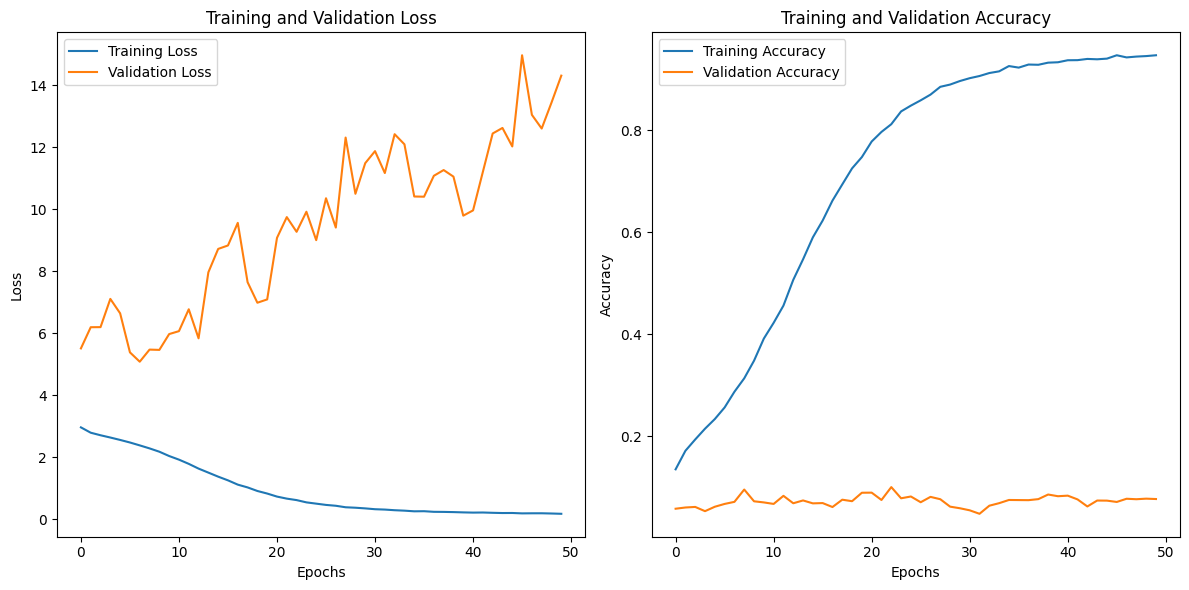

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

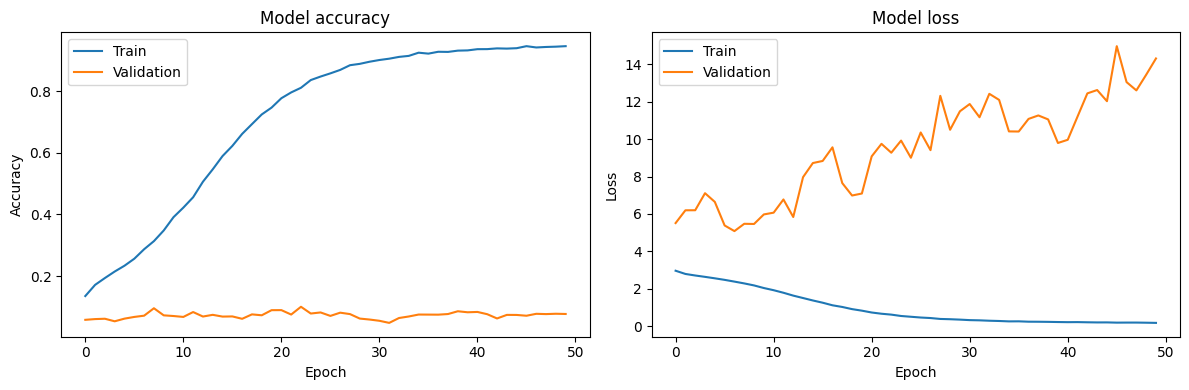

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0714 - loss: 14.2717
Test Accuracy: 0.0777
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

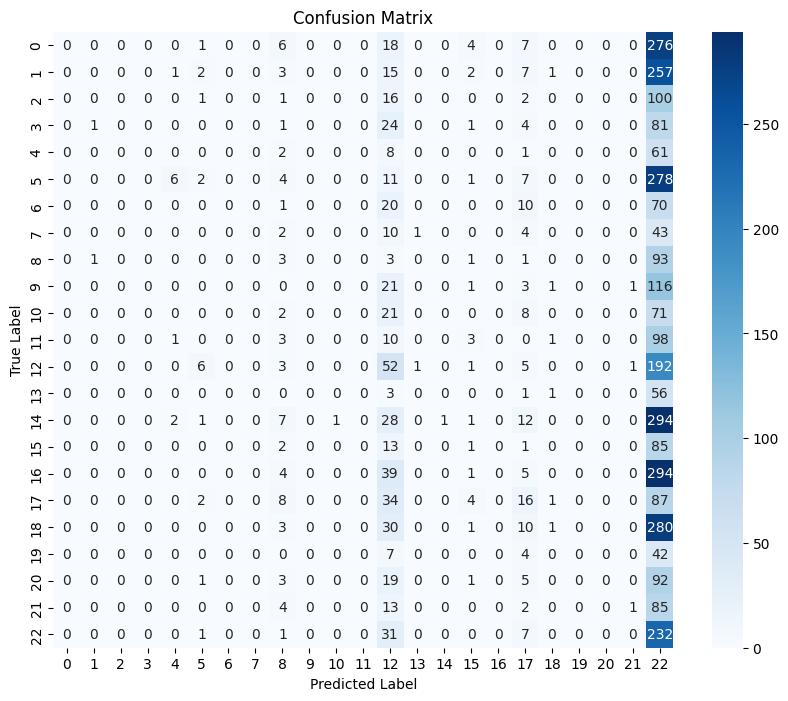

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.12      0.01      0.01       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import seaborn as sns
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = vit_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.4f}')

# Generate predictions for the test set
y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = vit_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Generate and print classification report
class_names = test_dataset.class_names
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step


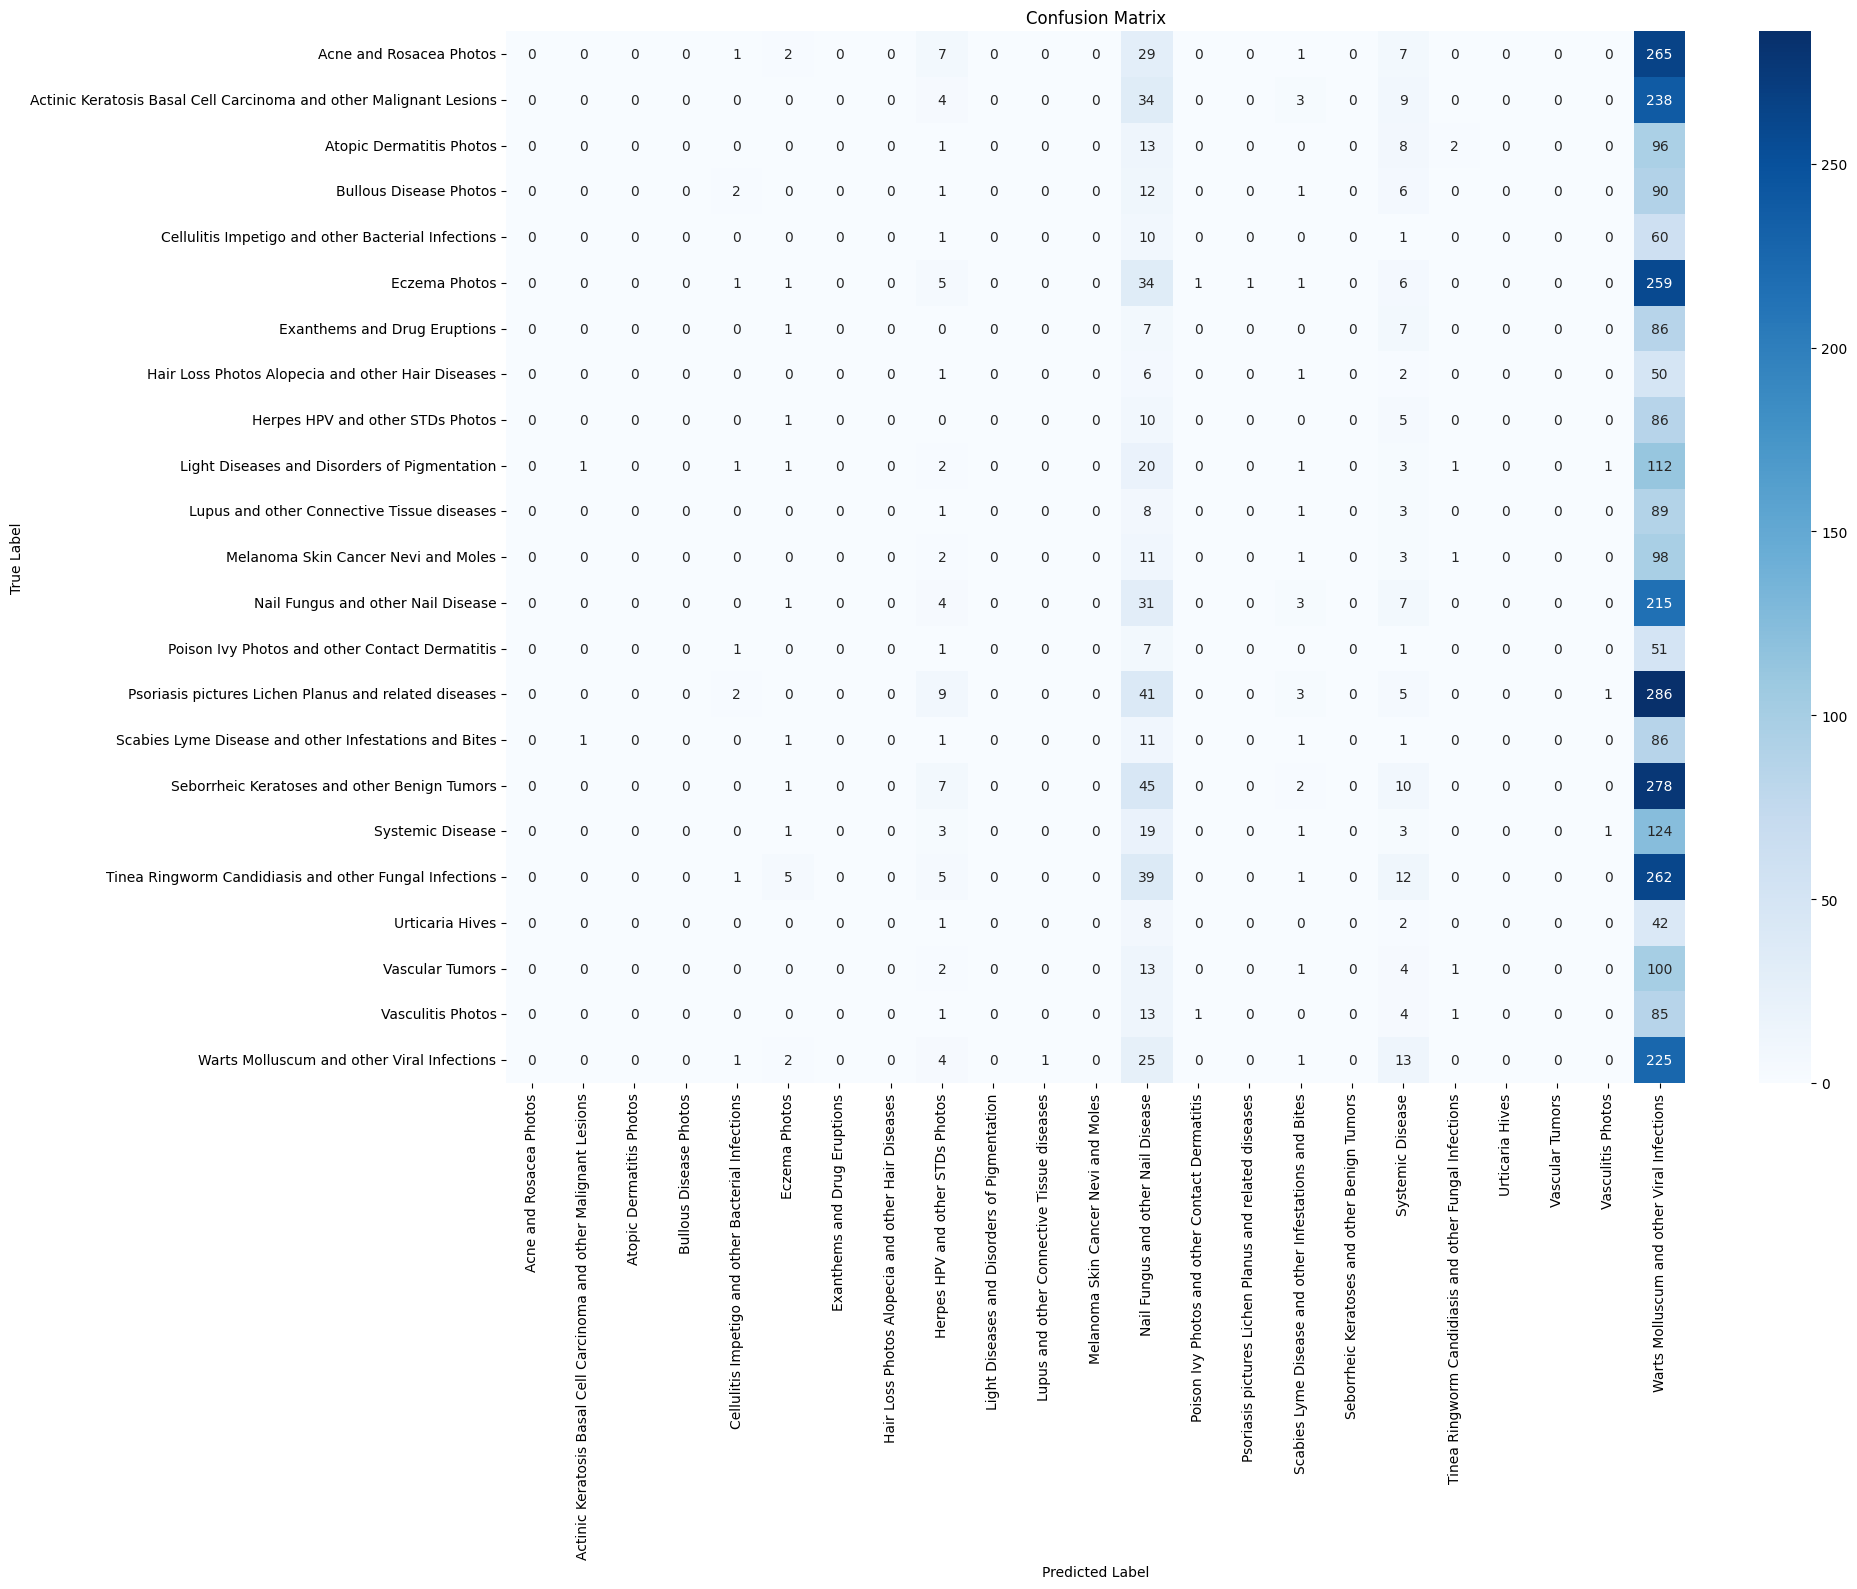


Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       120
                                            Bullous Disease Photos       0.00      0.00      0.00       112
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.06      0.00      0.01       309
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        60
   

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
import seaborn as sns
# Generate predictions
y_pred_prob = vit_model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

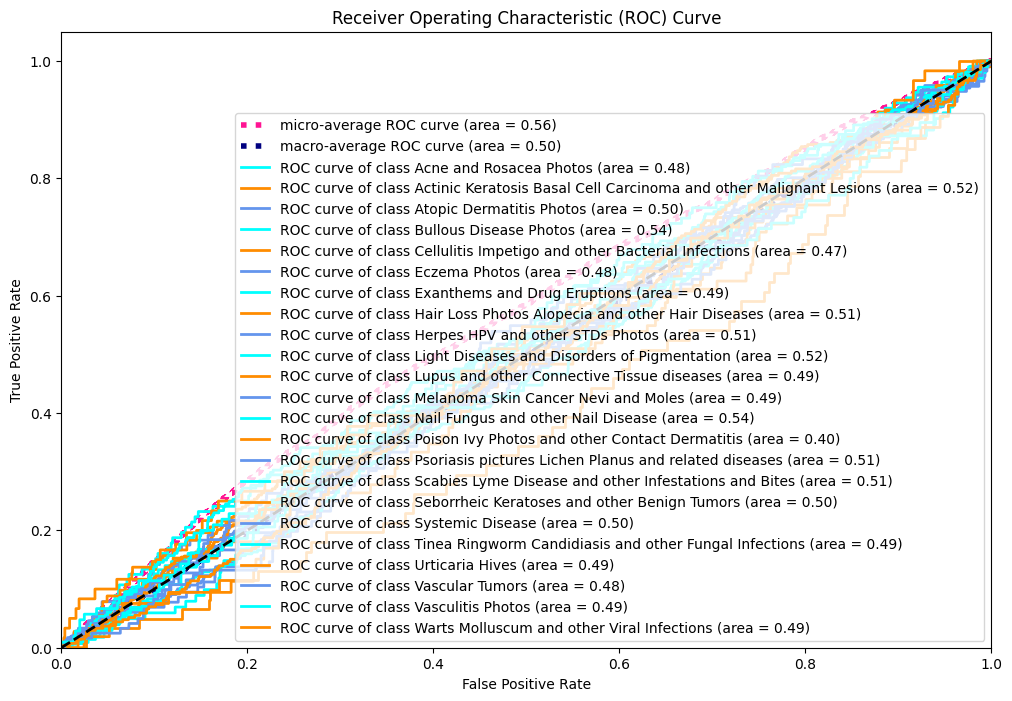


AUC Scores:
Micro-average AUC: 0.5636
Macro-average AUC: 0.4961
Acne and Rosacea Photos: 0.4820
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 0.5236
Atopic Dermatitis Photos: 0.5031
Bullous Disease Photos: 0.5389
Cellulitis Impetigo and other Bacterial Infections: 0.4744
Eczema Photos: 0.4800
Exanthems and Drug Eruptions: 0.4938
Hair Loss Photos Alopecia and other Hair Diseases: 0.5116
Herpes HPV and other STDs Photos: 0.5080
Light Diseases and Disorders of Pigmentation: 0.5163
Lupus and other Connective Tissue diseases: 0.4943
Melanoma Skin Cancer Nevi and Moles: 0.4888
Nail Fungus and other Nail Disease: 0.5377
Poison Ivy Photos and other Contact Dermatitis: 0.4012
Psoriasis pictures Lichen Planus and related diseases: 0.5073
Scabies Lyme Disease and other Infestations and Bites: 0.5084
Seborrheic Keratoses and other Benign Tumors: 0.4968
Systemic Disease: 0.4954
Tinea Ringworm Candidiasis and other Fungal Infections: 0.4948
Urticaria Hives: 0.4926
Vascular Tum

In [36]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output (for multiclass ROC curves)
y_test = label_binarize(y_true, classes=range(NUM_CLASSES))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_CLASSES):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= NUM_CLASSES

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(NUM_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores
print("\nAUC Scores:")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")
print(f"Macro-average AUC: {roc_auc['macro']:.4f}")
for i in range(NUM_CLASSES):
    print(f"{class_names[i]}: {roc_auc[i]:.4f}")


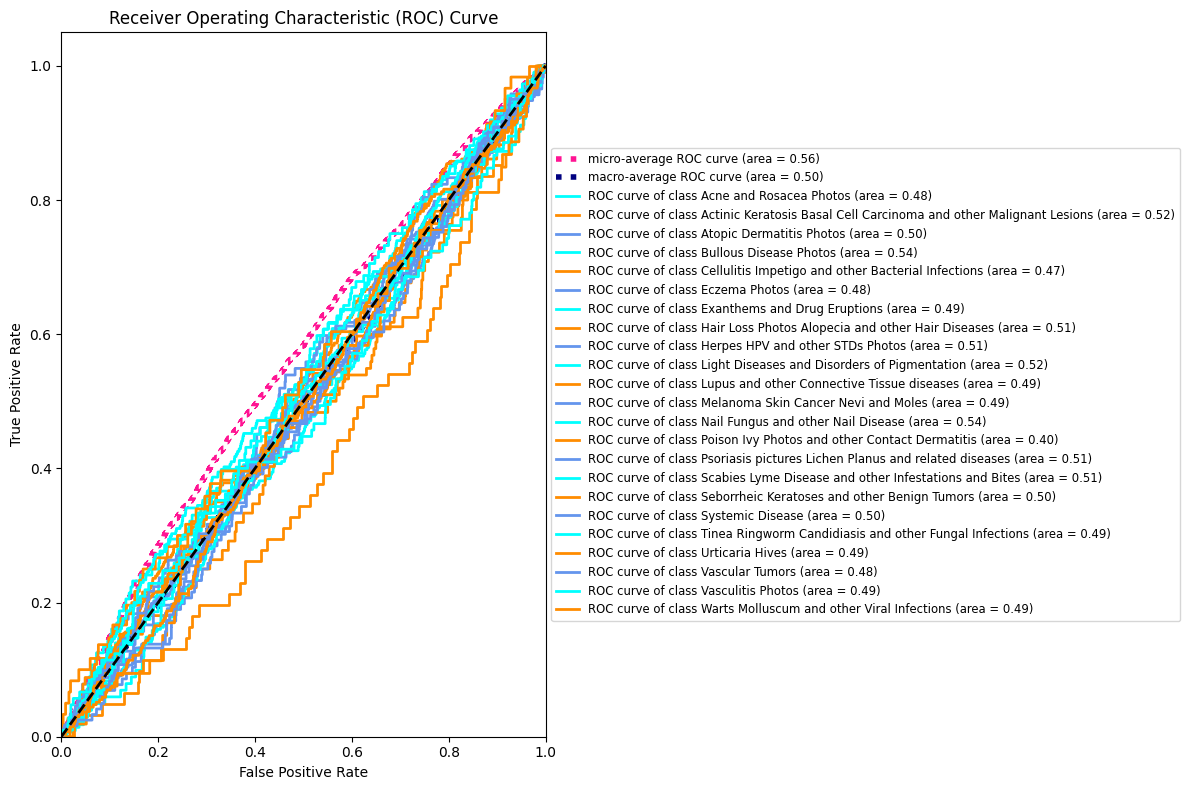

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(NUM_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Move the legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')

plt.tight_layout()
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import os

# List of your model files with more descriptive model names
model_files = {
    'VGG19': 'dermnet_vgg19.keras',
    'EfficientNetB0': 'efficientnetb0_dermnet.keras',
    'InceptionV3': 'inceptionv3_dermnet.keras',
    'ResNet50': 'resnet50_dernet.keras',
    'DenseNet121': 'densenet121_dermnet.keras',
    'Custom CNN': 'dermnet_sequential.keras',
    'Improvised CNN': 'ringworm_sequential_optimal.keras'
    
}

# Use the test generator to evaluate models on the test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Ensuring that the order of test data is consistent
)

# Function to evaluate model metrics using the test generator
def evaluate_model_metrics(model_path, test_generator):
    try:
        # Check if the model file exists
        if not os.path.exists(model_path):
            print(f"Model file '{model_path}' not found. Skipping this model.")
            return None, None, None, None

        # Load the model
        model = tf.keras.models.load_model(model_path)

        # Make predictions on the test data
        predictions = model.predict(test_generator)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = test_generator.classes

        # Generate classification report
        report = classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys()), output_dict=True)
        
        # Extract relevant metrics
        accuracy = report['accuracy']
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        
        return accuracy, precision, recall, f1_score
    except Exception as e:
        print(f"Error occurred while evaluating the model '{model_path}': {e}")
        return None, None, None, None

# Create a list to store the results
results = []

# Evaluate each model and store the metrics
for model_name, model_file in model_files.items():
    accuracy, precision, recall, f1_score = evaluate_model_metrics(model_file, test_generator)
    if accuracy is not None:
        results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score})

# Display the results in a structured table
results_df = pd.DataFrame(results)
print(results_df)



# Optionally save the results to a CSV file
results_df.to_csv('/mnt/c/Users/pragy/Downloads/MTAP_Rev1/model_comparison_metrics_23_class_80_20.csv', index=False)

Found 3979 images belonging to 23 classes.
Error occurred while evaluating the model 'dermnet_vgg19.keras': Unable to synchronously open file (file signature not found)
Error occurred while evaluating the model 'efficientnetb0_dermnet.keras': Unable to synchronously open file (file signature not found)
Error occurred while evaluating the model 'inceptionv3_dermnet.keras': Unable to synchronously open file (file signature not found)
Error occurred while evaluating the model 'resnet50_dernet.keras': Unable to synchronously open file (file signature not found)
Error occurred while evaluating the model 'densenet121_dermnet.keras': Unable to synchronously open file (file signature not found)
125/125 [==============================] - 19s 150ms/step


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


125/125 [==============================] - 18s 140ms/step
            Model  Accuracy  Precision    Recall  F1-Score
0      Custom CNN  0.338779   0.352033  0.338779  0.315763
1  Improvised CNN  0.352350   0.412167  0.352350  0.358111


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import os

# List of your model files with more descriptive model names
model_files = {
    'VGG19': 'dermnet_vgg19.keras',
    'EfficientNetB0': 'efficientnetb0_dermnet.keras',
    'InceptionV3': 'inceptionv3_dermnet.keras',
    'ResNet50': 'resnet50_dernet.keras',
    'DenseNet121': 'densenet121_dermnet.keras',
    'Custom CNN': 'dermnet_sequential.keras',
    'Improvised CNN': 'ringworm_sequential_optimal.keras'
    
}

# Use the test generator to evaluate models on the test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Ensuring that the order of test data is consistent
)

# Function to evaluate model metrics using the test generator
def evaluate_model_metrics(model_path, test_generator):
    try:
        # Check if the model file exists
        if not os.path.exists(model_path):
            print(f"Model file '{model_path}' not found. Skipping this model.")
            return None, None, None, None

        # Load the model
        model = tf.keras.models.load_model(model_path)

        # Make predictions on the test data
        predictions = model.predict(test_generator)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = test_generator.classes

        # Generate classification report
        report = classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys()), output_dict=True)
        
        # Extract relevant metrics
        accuracy = report['accuracy']
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        
        return accuracy, precision, recall, f1_score
    except Exception as e:
        print(f"Error occurred while evaluating the model '{model_path}': {e}")
        return None, None, None, None

# Create a list to store the results
results = []

# Evaluate each model and store the metrics
for model_name, model_file in model_files.items():
    accuracy, precision, recall, f1_score = evaluate_model_metrics(model_file, test_generator)
    if accuracy is not None:
        results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score})

# Display the results in a structured table
results_df = pd.DataFrame(results)
print(results_df)



# Optionally save the results to a CSV file
results_df.to_csv('/mnt/c/Users/pragy/Downloads/MTAP_Rev1/model_comparison_metrics_23_class_80_20.csv', index=False)

Found 3979 images belonging to 23 classes.
125/125 [==============================] - 19s 149ms/step
Error occurred while evaluating the model 'efficientnetb0_dermnet.keras': Unable to synchronously open file (file signature not found)
Error occurred while evaluating the model 'inceptionv3_dermnet.keras': Unable to synchronously open file (file signature not found)


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


125/125 [==============================] - 19s 148ms/step
Error occurred while evaluating the model 'densenet121_dermnet.keras': Unable to synchronously open file (file signature not found)


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


125/125 [==============================] - 19s 146ms/step


/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


125/125 [==============================] - 18s 140ms/step
            Model  Accuracy  Precision    Recall  F1-Score
0           VGG19  0.175924   0.097472  0.175924  0.105074
1        ResNet50  0.087208   0.007605  0.087208  0.013990
2      Custom CNN  0.338779   0.352033  0.338779  0.315763
3  Improvised CNN  0.352350   0.412167  0.352350  0.358111


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import numpy as np

# Constants (make sure these match your original training setup)
IMAGE_SIZE = (224, 224)
PATCH_SIZE = 16
NUM_PATCHES = (IMAGE_SIZE[0] // PATCH_SIZE) ** 2
PROJECTION_DIM = 64
BATCH_SIZE = 32

# Updated PatchEncoder class
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "projection_dim": self.projection_dim,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Function to load the model
def load_vit_model(model_path):
    custom_objects = {"PatchEncoder": PatchEncoder}
    return tf.keras.models.load_model(model_path, custom_objects=custom_objects)

# Load the saved ViT model
try:
    vit_model = load_vit_model('vit_model_dermnet.keras')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")
    raise

# Load the test dataset
test_dataset = keras.preprocessing.image_dataset_from_directory(
    '/mnt/c/Users/pragy/Downloads/Dermnet/test', 
    image_size=IMAGE_SIZE, 
    batch_size=BATCH_SIZE,
    seed=42  # Use the same seed as in your training script
)

# Evaluate the model on the test dataset
result = vit_model.evaluate(test_dataset)
# The output is usually [loss, accuracy, other_metrics...], so you can inspect the length
print(f'Evaluation Result: {result}')

# If only loss and accuracy are of interest
test_loss, test_acc = result[0], result[1]
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


/home/pragya/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'patch_encoder_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model loaded successfully!
Found 3979 files belonging to 23 classes.
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3451 - loss: 2.2441 - top_3_accuracy: 0.5649
Evaluation Result: [2.2802958488464355, 0.32470470666885376, 0.5531540513038635]
Test Loss: 2.2803
Test Accuracy: 0.3247


In [13]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

# Function to evaluate a model and return metrics
def evaluate_model(model, test_dataset, model_name):
    predictions = model.predict(test_dataset)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.concatenate([y for x, y in test_dataset], axis=0)
    report = classification_report(true_classes, predicted_classes, output_dict=True)
    
    return {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# List to store results for each model
results = []

# Evaluate each model
# Example (replace with your actual models and names):
models_to_evaluate = [
    (vit_model, 'Vision Transformer'),
    # Add other models here, e.g.:
    # (vgg19_model, 'VGG19'),
    # (efficientnet_model, 'EfficientNetB0'),
    # ...
]

for model, name in models_to_evaluate:
    results.append(evaluate_model(model, test_dataset, name))

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Format the numeric columns to 6 decimal places
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df_results[numeric_columns] = df_results[numeric_columns].applymap('{:.6f}'.format)

# Print the formatted table
print(df_results.to_string(index=False))

125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step
             Model Accuracy Precision   Recall F1-Score
Vision Transformer 0.073385  0.064214 0.073385 0.061628


2024-10-27 22:10:35.252942: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

#23 class classification_70:30 split

In [22]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split

def split_data(source_dir, dest_dir, train_ratio=0.7, valid_ratio=0.15):
    # Calculate split ratios for validation and test
    test_ratio = 1 - (train_ratio + valid_ratio)
    
    # Create destination directories if they do not exist
    train_dir = os.path.join(dest_dir, 'train')
    validation_dir = os.path.join(dest_dir, 'validation')
    test_dir = os.path.join(dest_dir, 'test')
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    for class_name in os.listdir(source_dir):
        class_folder = os.path.join(source_dir, class_name)
        if os.path.isdir(class_folder):
            # Create class directories in destination folders
            train_class_dir = os.path.join(train_dir, class_name)
            valid_class_dir = os.path.join(validation_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(valid_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Get all files in the class directory
            files = glob.glob(os.path.join(class_folder, '*'))
            
            # Split files into train, validation, and test sets
            train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
            valid_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + valid_ratio)), random_state=42)
            
            # Copy files to the train directory
            for file in train_files:
                dest_file = os.path.join(train_class_dir, os.path.basename(file))
                shutil.copy(file, dest_file)
            
            # Copy files to the validation directory
            for file in valid_files:
                dest_file = os.path.join(valid_class_dir, os.path.basename(file))
                shutil.copy(file, dest_file)
            
            # Copy files to the test directory
            for file in test_files:
                dest_file = os.path.join(test_class_dir, os.path.basename(file))
                shutil.copy(file, dest_file)

# Update the source and destination paths accordingly
source_directory = '/mnt/c/Users/pragy/Downloads/Dermnet/train'
destination_directory = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15'

# Call the function to create the new split
split_data(source_directory, destination_directory, train_ratio=0.7, valid_ratio=0.15)


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42

# Define the paths to your updated directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15/train'  # Path to updated training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15/validation'  # Path to updated validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15/test'  # Path to updated test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    seed=seed_value
)

# Create validation data generator
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Optional: Print class indices to ensure they are consistent
print(f"Class indices: {train_generator.class_indices}")



Found 10788 images belonging to 23 classes.
Found 2313 images belonging to 23 classes.
Found 2327 images belonging to 23 classes.
Class indices: {'Acne and Rosacea Photos': 0, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1, 'Atopic Dermatitis Photos': 2, 'Bullous Disease Photos': 3, 'Cellulitis Impetigo and other Bacterial Infections': 4, 'Eczema Photos': 5, 'Exanthems and Drug Eruptions': 6, 'Hair Loss Photos Alopecia and other Hair Diseases': 7, 'Herpes HPV and other STDs Photos': 8, 'Light Diseases and Disorders of Pigmentation': 9, 'Lupus and other Connective Tissue diseases': 10, 'Melanoma Skin Cancer Nevi and Moles': 11, 'Nail Fungus and other Nail Disease': 12, 'Poison Ivy Photos and other Contact Dermatitis': 13, 'Psoriasis pictures Lichen Planus and related diseases': 14, 'Scabies Lyme Disease and other Infestations and Bites': 15, 'Seborrheic Keratoses and other Benign Tumors': 16, 'Systemic Disease': 17, 'Tinea Ringworm Candidiasis and other Fungal I

In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    seed=seed_value
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 10788 images belonging to 23 classes.
Found 2313 images belonging to 23 classes.


#Using Custom CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
EPOCHS = 20
NUM_CLASSES_MOD = 23
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
# Build the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("dermnet_sequential_70_30.keras")

Epoch 1/20


/home/pragya/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730081759.871407    1321 service.cc:146] XLA service 0x7f0678001e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730081759.871466    1321 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-10-28 07:45:59.917263: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-28 07:46:00.135040: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  2/337 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.0469 - loss: 3.1399   

I0000 00:00:1730081767.441968    1321 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.0929 - loss: 3.0024

2024-10-28 07:49:29.237598: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_112', 16 bytes spill stores, 16 bytes spill loads



337/337 ━━━━━━━━━━━━━━━━━━━━ 246s 694ms/step - accuracy: 0.0929 - loss: 3.0023 - val_accuracy: 0.1415 - val_loss: 2.8602
Epoch 2/20
  1/337 ━━━━━━━━━━━━━━━━━━━━ 45s 134ms/step - accuracy: 0.0625 - loss: 2.9244

2024-10-28 07:50:00.703040: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-28 07:50:00.703103: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-28 07:50:00.703116: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:50:00.703141: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, tra

337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0625 - loss: 2.9244 - val_accuracy: 0.1111 - val_loss: 3.0452
Epoch 3/20


2024-10-28 07:50:02.459915: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-28 07:50:02.459969: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:50:02.459993: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 144s 419ms/step - accuracy: 0.1401 - loss: 2.8996 - val_accuracy: 0.1458 - val_loss: 2.8474
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.0938 - loss: 2.9091 - val_accuracy: 0.1111 - val_loss: 2.6395
Epoch 5/20


2024-10-28 07:52:26.967154: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:52:26.967219: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 07:52:26.985208: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-28 07:52:26.985255: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:52:26.985276: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 258s 758ms/step - accuracy: 0.1504 - loss: 2.8486 - val_accuracy: 0.1615 - val_loss: 2.8033
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0938 - loss: 2.9571 - val_accuracy: 0.1111 - val_loss: 2.6592
Epoch 7/20


2024-10-28 07:56:45.033988: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:56:45.034049: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 153s 445ms/step - accuracy: 0.1600 - loss: 2.8128 - val_accuracy: 0.1667 - val_loss: 2.7614
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.1562 - loss: 3.0691 - val_accuracy: 0.1111 - val_loss: 2.7801
Epoch 9/20


2024-10-28 07:59:18.102060: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:59:18.102109: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 07:59:18.115340: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-28 07:59:18.115390: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 07:59:18.115411: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 145s 421ms/step - accuracy: 0.1633 - loss: 2.7840 - val_accuracy: 0.1836 - val_loss: 2.7271
Epoch 10/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.1562 - loss: 2.6963 - val_accuracy: 0.1111 - val_loss: 2.7742
Epoch 11/20


2024-10-28 08:01:42.949551: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:01:42.949622: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 08:01:42.961755: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:01:42.961839: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 145s 422ms/step - accuracy: 0.1829 - loss: 2.7432 - val_accuracy: 0.1979 - val_loss: 2.6723
Epoch 12/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.1875 - loss: 2.5471 - val_accuracy: 0.3333 - val_loss: 2.8717
Epoch 13/20


2024-10-28 08:04:08.457793: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:04:08.457855: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 08:04:08.473225: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:04:08.473310: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 150s 435ms/step - accuracy: 0.1892 - loss: 2.7227 - val_accuracy: 0.2044 - val_loss: 2.6449
Epoch 14/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - accuracy: 0.1562 - loss: 2.8952 - val_accuracy: 0.1111 - val_loss: 2.6257
Epoch 15/20


2024-10-28 08:06:38.277724: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:06:38.277809: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.1987 - loss: 2.6990 - val_accuracy: 0.2183 - val_loss: 2.6228
Epoch 16/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.1250 - loss: 2.6678 - val_accuracy: 0.5556 - val_loss: 2.1711
Epoch 17/20


2024-10-28 08:13:18.456642: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:13:18.456746: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 08:13:18.470016: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-28 08:13:18.470088: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:13:18.470124: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 195s 567ms/step - accuracy: 0.2034 - loss: 2.6668 - val_accuracy: 0.2292 - val_loss: 2.6032
Epoch 18/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.3125 - loss: 2.5230 - val_accuracy: 0.1111 - val_loss: 2.5977
Epoch 19/20


2024-10-28 08:16:33.587877: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:16:33.587963: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 08:16:33.601673: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:16:33.601785: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


337/337 ━━━━━━━━━━━━━━━━━━━━ 192s 558ms/step - accuracy: 0.2043 - loss: 2.6582 - val_accuracy: 0.2257 - val_loss: 2.6083
Epoch 20/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.1875 - loss: 2.7946 - val_accuracy: 0.3333 - val_loss: 1.9508


2024-10-28 08:19:45.794962: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:19:45.795032: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248
2024-10-28 08:19:45.807690: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15553654909633557313
2024-10-28 08:19:45.807766: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10895666059655494248


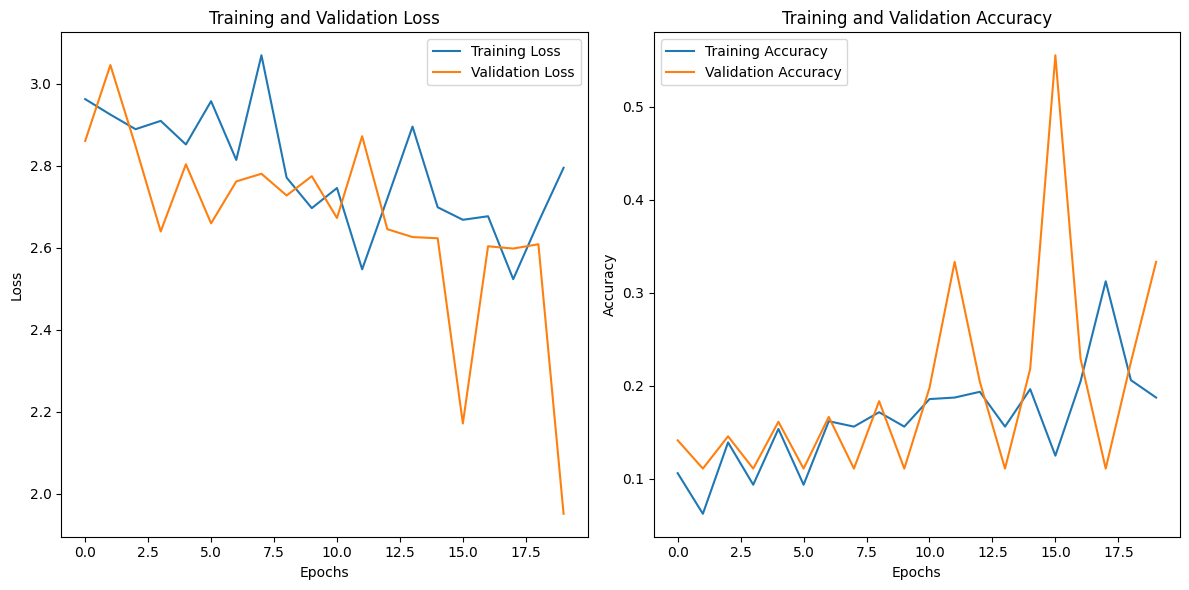

In [12]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Found 2327 images belonging to 23 classes.


2024-10-28 08:23:32.817591: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.74GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-28 08:23:33.350173: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-28 08:23:37.801484: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


72/73 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step

2024-10-28 08:24:22.914175: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 20 bytes spill stores, 20 bytes spill loads

2024-10-28 08:24:25.232886: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.75GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-28 08:24:28.328264: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


73/73 ━━━━━━━━━━━━━━━━━━━━ 64s 666ms/step


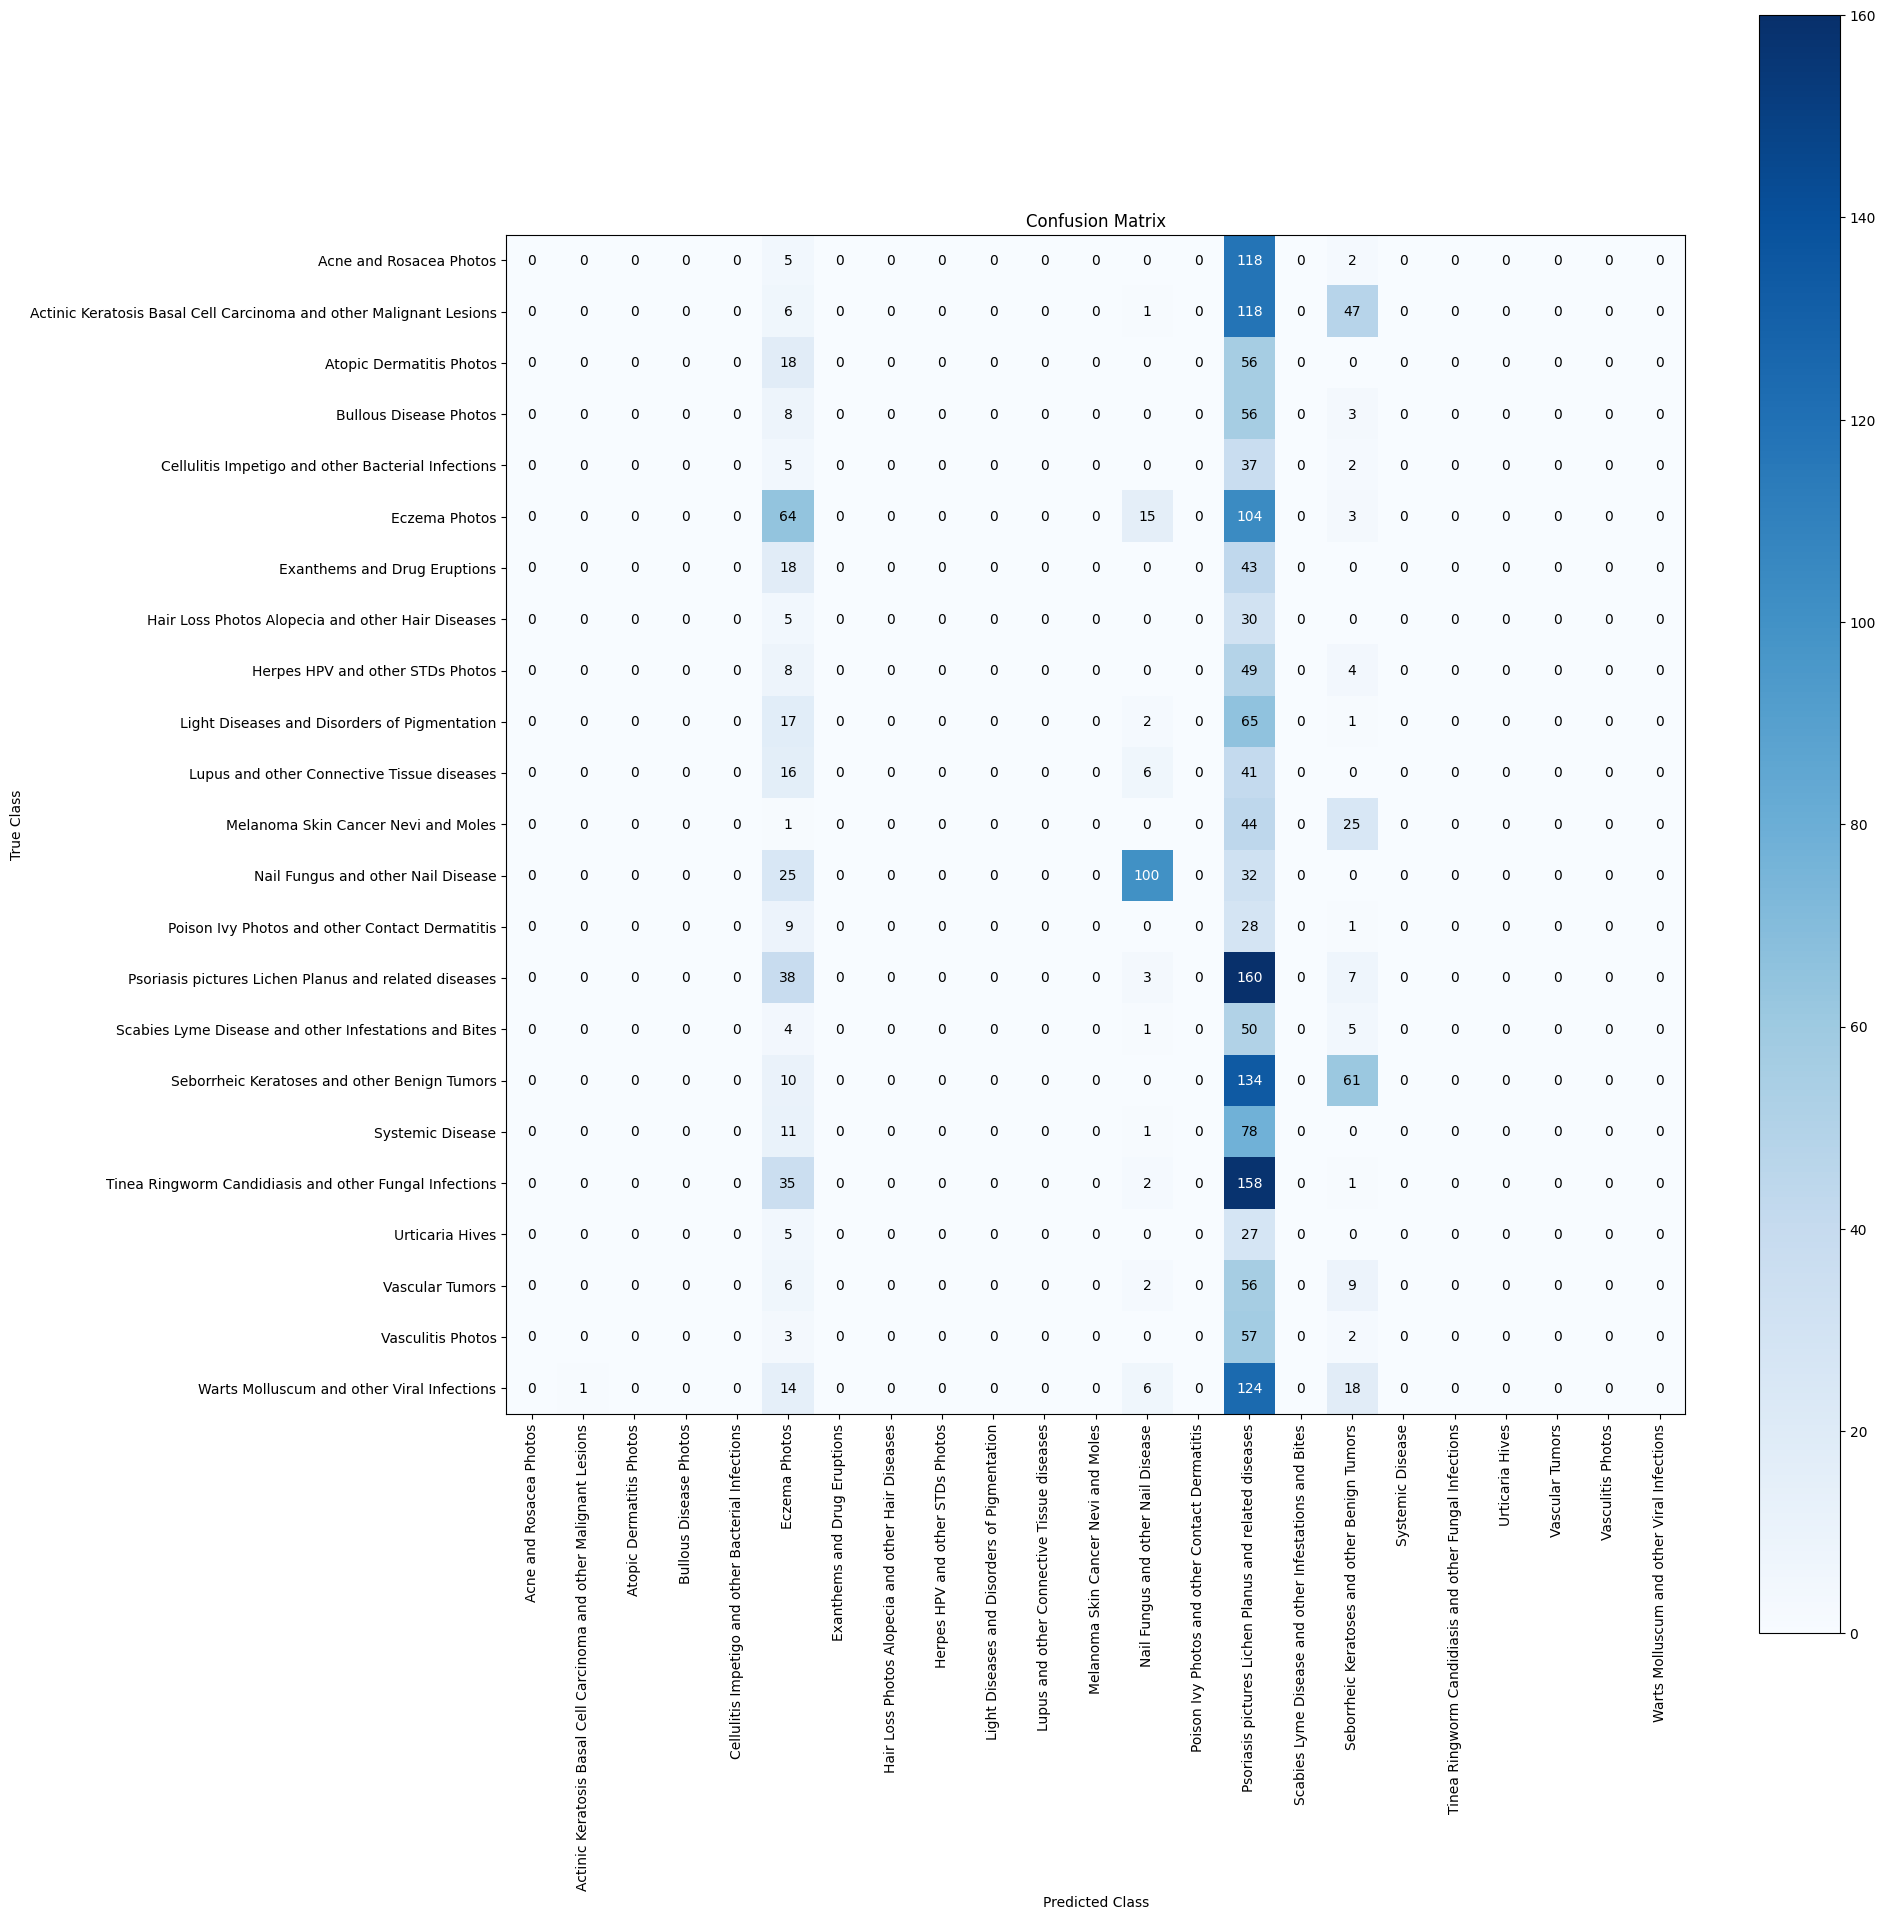

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       125
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       172
                                          Atopic Dermatitis Photos       0.00      0.00      0.00        74
                                            Bullous Disease Photos       0.00      0.00      0.00        67
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        44
                                                     Eczema Photos       0.19      0.34      0.25       186
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00        61
                 Hair Loss Photos Alopecia and other Hair Diseases       0.00      0.00      0.00        35
    

/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pragya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15/train'  # Path to updated training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15/validation'  # Path to updated validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet_70_15_15/test'  # Path to updated test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("dermnet_vgg19.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

In [14]:
from tensorflow.keras.models import load_model

model = load_model('dermnet_sequential_70_30.keras')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 23)             │        11,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,070,983 (110.90 MB)

 Trainable params: 9,690,327 (36.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,380,656 (73.93 MB)

In [15]:
from tensorflow.keras.models import load_model

model = load_model('dermnet_sequential.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 23)             │        11,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,070,983 (110.90 MB)

 Trainable params: 9,690,327 (36.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,380,656 (73.93 MB)

In [16]:
from tensorflow.keras.models import load_model

model = load_model('ringworm_sequential.keras')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,038,664 (110.77 MB)

 Trainable params: 9,679,554 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,359,110 (73.85 MB)

In [54]:
import os
import pandas as pd

# Set your dataset directory path
dataset_dir = '/mnt/c/Users/pragy/Downloads/Dataset_Ringworm'  

# Initialize a dictionary to hold class distributions
class_distribution = {
    'Class': [],
    'Number in Train': [],
    'Number in Valid': [],
    'Number in Test': []
}

# Iterate over the classes (assumed to be subdirectories)
classes = os.listdir(os.path.join(dataset_dir, 'train'))  # Assume classes are the same across train, valid, and test

for class_name in classes:
    # Count for training set
    train_count = len([f for f in os.listdir(os.path.join(dataset_dir, 'train', class_name)) if f.endswith(('.jpg', '.jpeg', '.png'))])
    
    # Count for validation set
    valid_count = len([f for f in os.listdir(os.path.join(dataset_dir, 'validation', class_name)) if f.endswith(('.jpg', '.jpeg', '.png'))])
    
    # Count for testing set
    test_count = len([f for f in os.listdir(os.path.join(dataset_dir, 'test', class_name)) if f.endswith(('.jpg', '.jpeg', '.png'))])
    
    # Append the results to the distribution dictionary
    class_distribution['Class'].append(class_name)
    class_distribution['Number in Train'].append(train_count)
    class_distribution['Number in Valid'].append(valid_count)
    class_distribution['Number in Test'].append(test_count)

# Create a DataFrame from the distribution dictionary
df_distribution = pd.DataFrame(class_distribution)

# Display the class distribution table
print(df_distribution)



          Class  Number in Train  Number in Valid  Number in Test
0  Regular Skin              163               54              56
1      Ringworm             1604              534             535


In [49]:
import numpy as np

# Get the number of batches
num_batches = train_generator.samples // train_generator.batch_size

# Initialize an empty list to store the labels
y_train = []

# Loop through the generator to extract labels
for i in range(num_batches):
    _, labels = train_generator.next()  # Get the next batch
    y_train.append(labels)  # Append the labels to the list

# Concatenate all labels into a single array
y_train = np.concatenate(y_train)

# If using categorical labels, convert them back to single integers if necessary
# For example, if you need class indices instead of one-hot encoding
y_train_classes = np.argmax(y_train, axis=1)  # Convert to class indices


In [51]:
# Assuming y_train is in one-hot encoded format (2D array)
y_train_classes = np.argmax(y_train, axis=1)  # Convert to class indices (1D array)


In [52]:


import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train is your training labels in one-hot encoded format
# Convert y_train to class indices if it is one-hot encoded
y_train_classes = np.argmax(y_train, axis=1)  # Convert to class indices (1D array)

# Compute class weights
class_labels = np.unique(y_train_classes)  # Get unique class labels
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train_classes)
class_weight_dict = dict(zip(class_labels, class_weights))

# Output the class weights
print("Class Weights:", class_weight_dict)




Class Weights: {0: 0.8069900068016533, 1: 0.5887697064549375, 2: 1.3713879256690673, 3: 1.520654638667061, 4: 2.336615664293289, 5: 0.5434430272708054, 6: 1.664041428417305, 7: 2.9030679465462073, 8: 1.6599225139905296, 9: 1.1848210170533109, 10: 1.6120401337792643, 11: 1.44839891069584, 12: 0.6448160535117057, 13: 2.6506272555421893, 14: 0.4855964486981708, 15: 1.6849464714878741, 16: 0.49237055481070036, 17: 1.1251823752553254, 18: 0.5158528428093645, 19: 3.1632485643970467, 20: 1.391304347826087, 21: 1.6356309650053023, 22: 0.6175034029946352}


In [6]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Constants
NUM_CLASSES_MOD = 23
EPOCHS = 50
IMAGE_SIZE = (224, 224)  # Adjust according to your image size
BATCH_SIZE = 32  # Adjust according to your batch size

# Build the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Replace Flatten with Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully connected layer
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES_MOD, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Assuming you have a way to extract y_train from your train_generator
# This is typically done by iterating over the generator to collect labels
y_train = np.concatenate([train_generator[i][1] for i in range(len(train_generator))])
y_train_classes = np.argmax(y_train, axis=1)  # Convert to class indices (1D array)

# Compute class weights
class_labels = np.unique(y_train_classes)  # Get unique class labels
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train_classes)
class_weight_dict = dict(zip(class_labels, class_weights))

# Train the model with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    class_weight=class_weight_dict,  # Pass the class weights here
    callbacks=[early_stopping]
)

# Save the model
model.save("dermnet_weight.keras")


2024-11-05 14:54:39.370880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-05 14:54:39.373568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-05 14:54:39.373640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-05 14:54:39.373664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your 

Epoch 1/50


2024-11-05 14:57:51.829627: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2024-11-05 14:57:54.743519: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


482/482 [==============================] - 153s 308ms/step - loss: 3.1442 - accuracy: 0.0846 - val_loss: 3.3399 - val_accuracy: 0.0433
Epoch 2/50
482/482 [==============================] - 180s 374ms/step - loss: 3.0163 - accuracy: 0.1081 - val_loss: 3.3844 - val_accuracy: 0.0697
Epoch 3/50
482/482 [==============================] - 147s 305ms/step - loss: 2.9566 - accuracy: 0.1187 - val_loss: 3.0081 - val_accuracy: 0.1019
Epoch 4/50
482/482 [==============================] - 152s 315ms/step - loss: 2.9272 - accuracy: 0.1341 - val_loss: 2.9520 - val_accuracy: 0.1222
Epoch 5/50
482/482 [==============================] - 147s 304ms/step - loss: 2.8943 - accuracy: 0.1450 - val_loss: 3.1696 - val_accuracy: 0.0782
Epoch 6/50
482/482 [==============================] - 145s 301ms/step - loss: 2.8776 - accuracy: 0.1504 - val_loss: 2.9498 - val_accuracy: 0.1232
Epoch 7/50
482/482 [==============================] - 148s 308ms/step - loss: 2.8411 - accuracy: 0.1572 - val_loss: 2.7504 - val_accura

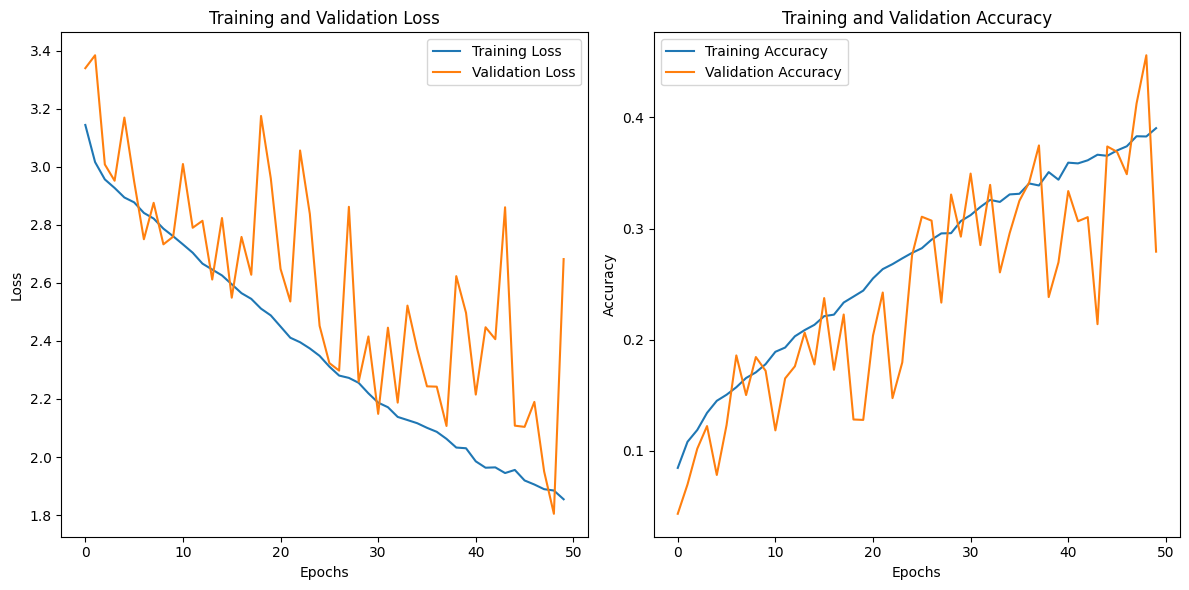

In [7]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image size and batch size
IMAGE_SIZE = (224, 224)  # Example size, adjust as needed
BATCH_SIZE = 32
seed_value = 42


# Define the paths to your directories
train_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/train'  # Path to training data directory
valid_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/validation'  # Path to validation data directory
test_dir = '/mnt/c/Users/pragy/Downloads/Dermnet/test'  # Path to test data directory

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define data augmentation for validation and test (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
NUM_CLASSES = 23
# Load the model
model = tf.keras.models.load_model("dermnet_weight.keras")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES_MOD)
plt.xticks(tick_marks, test_generator.class_indices, rotation=90)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

Found 3979 images belonging to 23 classes.
 69/125 [===============>..............] - ETA: 16s